# 时间序列分析大作业代码第一部分
由于我的Keras在另一个环境，因此我前面的时间序列模型部分写在了第一部分，神经网络模型写在了第二部分，同时也防止了过长。  
第一部分包括：一、数据探索与预处理至4.1.5 多维归一化  
第二部分包括：4.2 数据重塑与数据划分至最后

姓名：欧阳瑞志、班级：统计22、学号：220403102

## 目录
* [一、数据探索与预处理](#1)
    * [1.1 数据导入](#1.1)
    * [1.2 Box-Cox变换](#1.2)
    * [1.3 数据预处理](#1.3)
        * [1.3.1 异常值检验与处理](#1.3.1)
        * [1.3.2 缺失值检验与处理](#1.3.2)
    * [1.4 原始数据平稳性检验](#1.4)
    * [1.5 数据差分与平稳性检验](#1.5)
        * [1.5.1 一阶差分](#1.5.1)
        * [1.5.2 图检验](#1.5.2)
        * [1.5.3 PP检验](#1.5.3)
    * [1.6 纯随机性检验](#1.6)
* [二、一元线性时间序列模型实现K线预测](#2)
    * [2.1 开盘价预测](#2.1)
        * [2.1.1 模型识别](#2.1.1)
        * [2.1.2 模型拟合](#2.1.2)
        * [2.1.3 均值模型的整体效果检验](#2.1.3)
        * [2.1.4 残差的自相关检验](#2.1.4)
        * [2.1.5 Auto-Regressive模型](#2.1.5)
        * [2.1.6 残差的异方差性检验](#2.1.6)
        * [2.1.7 异方差模型的选择](#2.1.7)
        * [2.1.8 EGARCH模型](#2.1.8)
        * [2.1.9 残差模型的整体效果检验](#2.1.9)
        * [2.1.10 模型的预测](#2.1.10)
    * [2.2 收盘价预测](#2.2)
        * [2.2.1 模型识别](#2.2.1)
        * [2.2.2 模型拟合](#2.2.2)
        * [2.2.3 均值模型的整体效果检验](#2.2.3)
        * [2.2.4 残差的自相关检验](#2.2.4)
        * [2.2.5 Auto-Regressive模型](#2.2.5)
        * [2.2.6 残差的异方差性检验](#2.2.6)
        * [2.2.7 异方差模型的选择](#2.2.7)
        * [2.2.8 EGARCH模型](#2.2.8)
        * [2.2.9 残差模型的整体效果检验](#2.2.9)
        * [2.2.10 模型的预测](#2.2.10)
    * [2.3 最低价预测](#2.3)
        * [2.3.1 模型识别](#2.3.1)
        * [2.3.2 模型拟合](#2.3.2)
        * [2.3.3 均值模型的整体效果检验](#2.3.3)
        * [2.3.4 残差的自相关检验](#2.3.4)
        * [2.3.5 Auto-Regressive模型](#2.3.5)
        * [2.3.6 残差的异方差性检验](#2.3.6)
        * [2.3.7 异方差模型的选择](#2.3.7)
        * [2.3.8 EGARCH模型](#2.3.8)
        * [2.3.9 残差模型的整体效果检验](#2.3.9)
        * [2.3.10 模型的预测](#2.3.10)
    * [2.4 最低价预测](#2.4)
        * [2.4.1 模型识别](#2.4.1)
        * [2.4.2 模型拟合](#2.4.2)
        * [2.4.3 均值模型的整体效果检验](#2.4.3)
        * [2.4.4 残差的自相关检验](#2.4.4)
        * [2.4.5 Auto-Regressive模型](#2.4.5)
        * [2.4.6 残差的异方差性检验](#2.4.6)
        * [2.4.7 异方差模型的选择](#2.4.7)
        * [2.4.8 EGARCH模型](#2.4.8)
        * [2.4.9 残差模型的整体效果检验](#2.4.9)
        * [2.4.10 模型的预测](#2.4.10)
    * [2.5 K线预测结果](#2.5)
* [三、多元线性时间序列模型实现K线预测](#3)
    * [3.1 相关性检验](#3.1)
        * [3.1.1 Pearson相关系数检验](#3.1.1)
        * [3.1.2 Spearman相关系数检验](#3.1.2)
    * [3.2 模型识别](#3.2)
    * [3.3 模型拟合](#3.3)
    * [3.4 模型预测](#3.4)
        * [3.4.1 数据还原](#3.4.1)
        * [3.4.2 开盘价预测结果](#3.4.2)
        * [3.4.3 收盘价预测结果](#3.4.3)
        * [3.4.4 最低价预测结果](#3.4.4)
        * [3.4.5 最高价预测结果](#3.4.5)
        * [3.4.5 K线预测结果](#3.4.6)
* [四、多元非线性时间序列模型实现K线预测](#4)
    * [4.1 线性序列拓展至非线性序列](#4.1)
        * [4.1.1 数据导入](#4.1.1)
        * [4.1.2 Box-Cox变换](#4.1.2)
        * [4.1.3 异常值检测与处理](#4.1.3)
        * [4.1.4 缺失值检测与处理](#4.1.4)
        * [4.1.5 多维归一化](#4.1.5)
    * [4.2 数据重塑与数据划分](#4.2)
    * [4.3 模型训练](#4.3)
        * [4.3.1 LSTM模型](#4.3.1)
        * [4.3.2 BiLSTM模型](#4.3.2)
        * [4.3.3 CNN-LSTM模型](#4.3.3)
        * [4.3.4 CNN-BiLSTM模型](#4.3.4)
        * [4.3.5 CNN-LSTM-Attention模型](#4.3.5)
        * [4.3.6 CNN-BiLSTM-Attention模型](#4.3.6)
        * [4.3.7 GRU模型](#4.3.7)
        * [4.3.8 BiGRU模型](#4.3.8)
        * [4.3.9 CNN-GRU模型](#4.3.9)
        * [4.3.10 CNN-BiGRU模型](#4.3.10)
        * [4.3.11 CNN-GRU-Attention模型](#4.3.11)
        * [4.3.12 CNN-BiGRU-Attention模型](#4.3.12)
    * [4.4 基于熵权TOPSIS法的模型选择](#4.4)
    * [4.5 基于CNN-GRU的K线预测结果](#4.5)
* [五、模型的对比](#5)
* [六、模型的优化](#6)

## 一、数据探索与预处理<a id="1"></a>
### 1.1 数据导入<a id="1.1"></a>
__数据来源__:数据来自CEEX广州碳排放权交易中心  
__数据地址__:https://www.cnemission.com/article/hqxx/  
__数据内容__:自 2013-12-19 至今的广州碳排放权交易历史行情信息  
导入数据后并绘制K线图(K线图以Html格式输出)

In [2]:
import akshare as ak
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from arch.unitroot import PhillipsPerron
from statsmodels.stats.diagnostic import acorr_ljungbox
import statsmodels.api as sm
from pmdarima.arima import auto_arima
from statsmodels.tsa.api import ExponentialSmoothing, Holt, SimpleExpSmoothing, ETSModel
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_white
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.stats.diagnostic import acorr_lm
from arch.univariate import arch_model
import scipy.stats as st
from pyecharts import options as opts
from pyecharts.charts import Kline

warnings.filterwarnings("ignore")


### 1 整体

## 1.1 数据导入
energy_carbon_gz_df = ak.energy_carbon_gz()
df = energy_carbon_gz_df[[ '开盘价', '收盘价', '最低价', '最高价']].rename(columns={
    '开盘价': 'open',
    '收盘价': 'close',
    '最低价': 'lowest',
    '最高价': 'highest'
})

df = df.iloc[1300:1700]
df = df.reset_index(drop=True).dropna()

## 原始数据K线图
nergy_carbon_gz_df = ak.energy_carbon_gz()
K_df = energy_carbon_gz_df[['日期', '开盘价', '收盘价', '最低价', '最高价']].rename(columns={
    '日期': 'date',
    '开盘价': 'open',
    '收盘价': 'close',
    '最低价': 'lowest',
    '最高价': 'highest'
})

K_df.loc[:, 'open'] = K_df['open'].astype(float)
K_df.loc[:, 'close'] = K_df['close'].astype(float)
K_df.loc[:, 'lowest'] = K_df['lowest'].astype(float)
K_df.loc[:, 'highest'] = K_df['highest'].astype(float)

K_df.loc[:, 'date'] = pd.to_datetime(K_df['date'])
K_df.set_index('date', inplace=True)

K_df = K_df.iloc[1300:1700]

kline_data = K_df[['open', 'close', 'lowest', 'highest']].values.tolist()

c = (
    Kline(init_opts=opts.InitOpts(width="1600px", height="720px"))
   .add_xaxis(K_df.index.strftime('%Y-%m-%d').tolist())
   .add_yaxis("", kline_data)
   .set_global_opts(
        yaxis_opts=opts.AxisOpts(is_scale=True),
        xaxis_opts=opts.AxisOpts(is_scale=True),
        title_opts=opts.TitleOpts(title=""),
    )
   .render("原始数据K线图.html")
)

df

open  close  lowest  highest
0    27.47  27.49   27.48    28.00
1    27.49  27.33   27.30    27.60
2    27.33  27.33   27.75    27.75
3    27.33  27.32   27.28    27.99
4    27.32  27.55   26.38    28.05
..     ...    ...     ...      ...
395  60.61  62.63   54.55    63.80
396  62.63  64.34   60.00    65.00
397  64.34  67.03   63.50    70.00
398  67.03  68.61   67.66    70.88
399  68.61  69.15   65.00    70.00

[400 rows x 4 columns]

### 1.2 Box-Cox变换<a id="1.2"></a>
公式：
$$
y^{(\lambda)} = \left\{\begin{matrix} \frac{y^{\lambda}-1}{\lambda} &\lambda \neq 0 \\ ln(y) &\lambda = 0 \end{matrix}\right.
$$
变换需要满足：
$$
\frac{y_{max}}{y_{min}} > 2
$$
在此使用对数变换

In [3]:
data = np.log(df)

print('前五行数据：')
data.head()

前五行数据：


open     close    lowest   highest
0  3.313095  3.313822  3.313458  3.332205
1  3.313822  3.307985  3.306887  3.317816
2  3.307985  3.307985  3.323236  3.323236
3  3.307985  3.307619  3.306154  3.331847
4  3.307619  3.316003  3.272606  3.333989

### 1.3 数据预处理<a id="1.3"></a>
#### 1.3.1 异常值检验与处理<a id="1.3.1"></a>
##### 箱线图
通过观察箱线图，如果数据在1.5倍四分位差外，则认为是异常值  
$$IQR = Q_3-Q_1$$
其中，$IQR$为四分位差，$Q_3$为上四分位数，$Q_1$为下四分位  
$Data > Q_1-1.5IQR$或者$Data < Q_3+1.5IQR$均认为该数据点为异常值

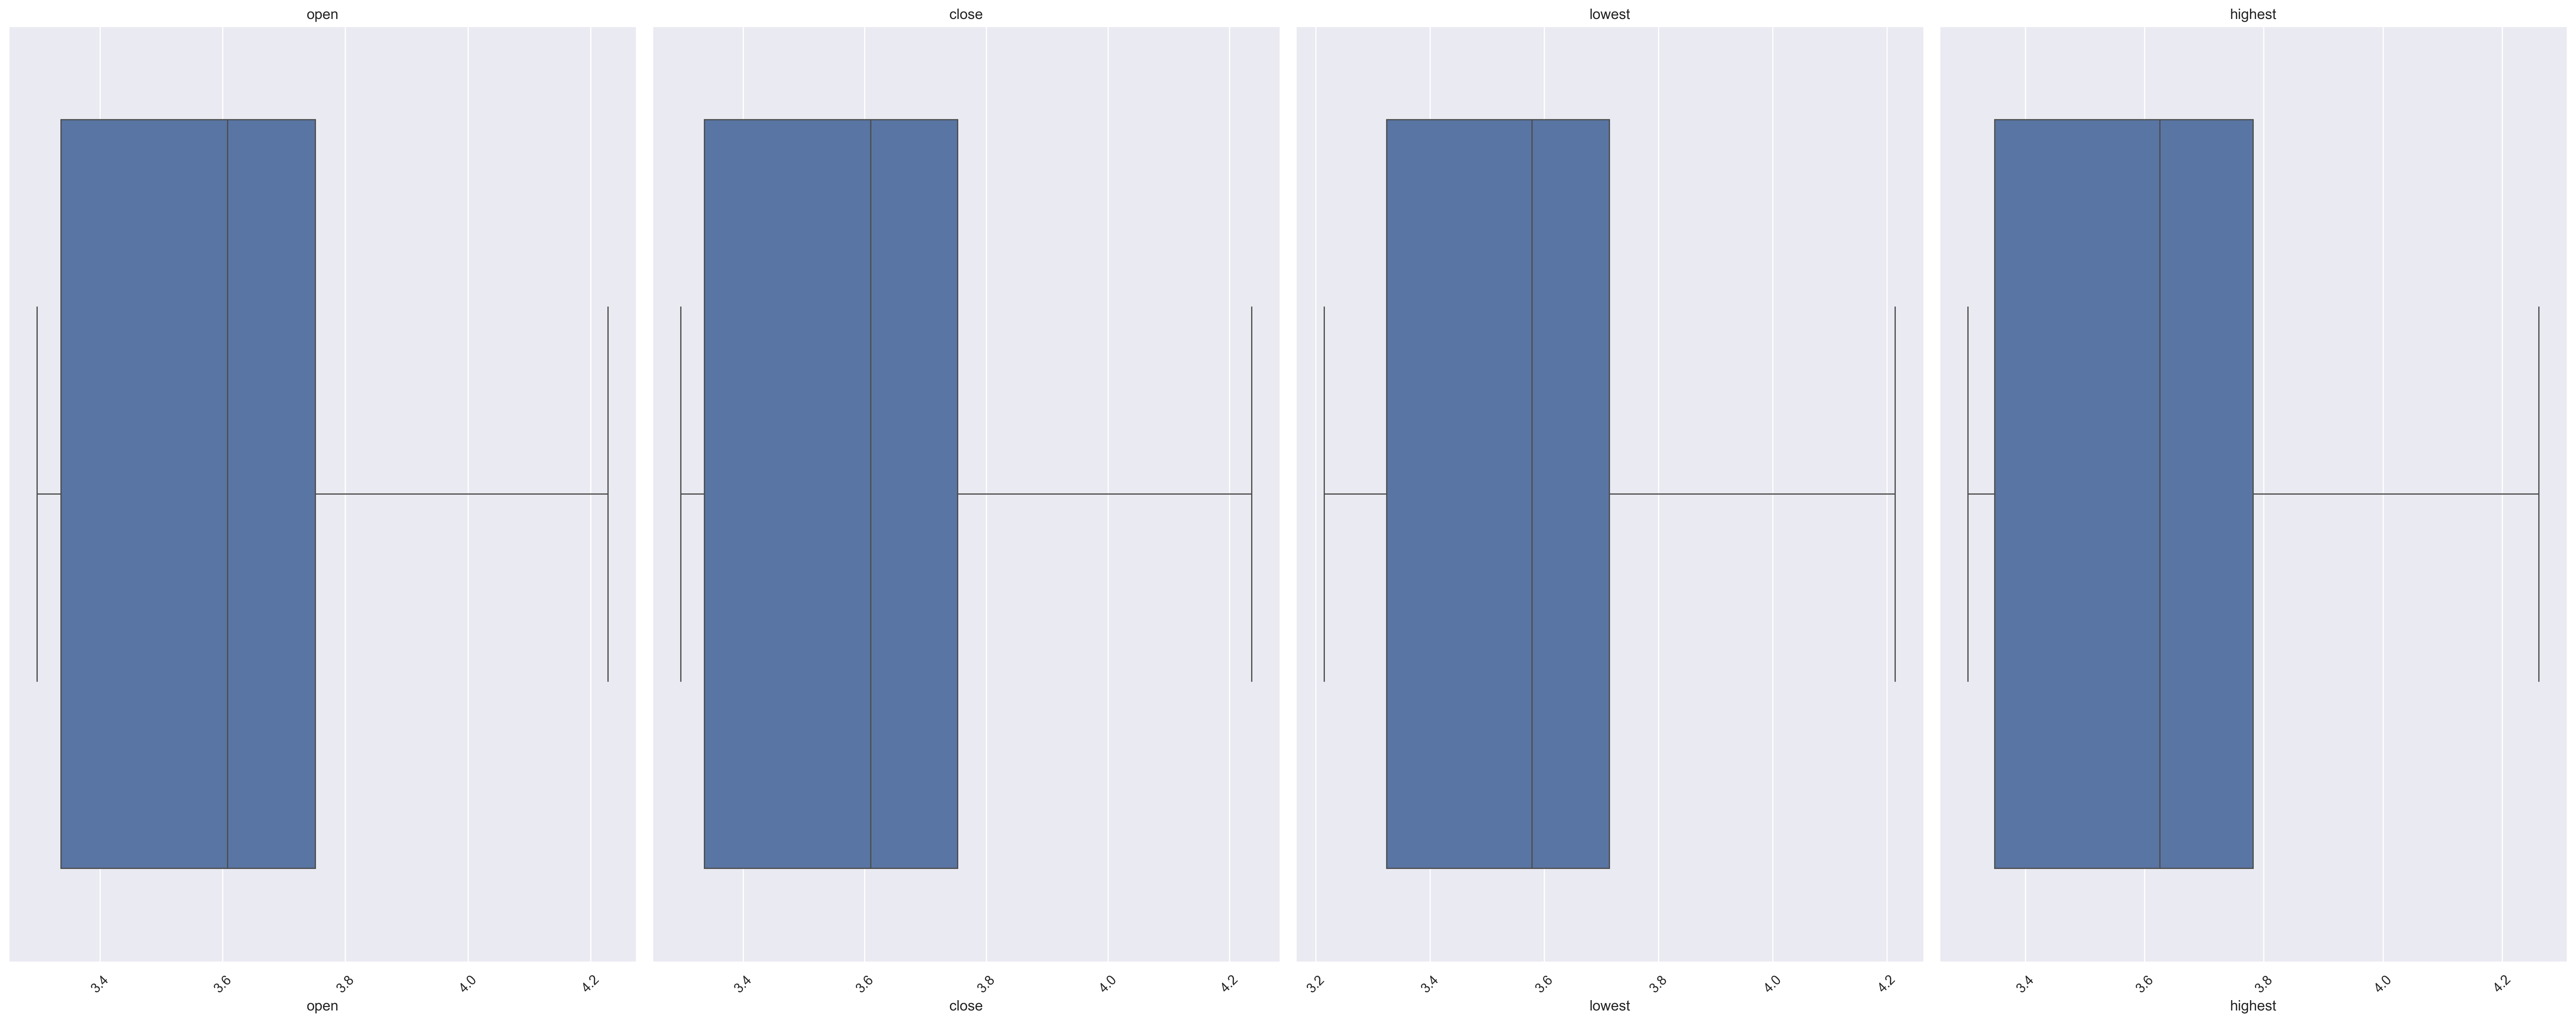

In [4]:
# 箱线图
sns.set_theme(font_scale=1)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 12), dpi = 300)
axes = axes.flatten()

# 循环绘制每个子图
for i, column in enumerate(data.columns):
    g_previous_box = sns.boxplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(column)

    locator = axes[i].get_xticks()
    axes[i].xaxis.set_major_locator(plt.FixedLocator(locator))
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.savefig(fname="箱线图.png")

##### 3$\sigma$法则
通过计算均值$\mu$和标准差$\sigma$来判断有无异常值  
$ Data > \mu + 3\sigma$或者$ Data < \mu - 3\sigma$均认为该数据点为异常值

In [5]:
# 3sigma法则
for column in data.columns:
    mean_value = data[column].mean()
    std_value = data[column].std()
    lower_bound = mean_value - 3 * std_value
    upper_bound = mean_value + 3 * std_value
    outlier_count = data[(data[column] < lower_bound) | (data[column] > upper_bound)].shape[0]
    print(f"{column}列3sigma外离群值个数为: {outlier_count}")
    # 3sigma法则处理异常值，将3sigma外的数据替换为nan
    data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = np.nan
    outlier_count = data[(data[column] < lower_bound) | (data[column] > upper_bound)].shape[0]
    print(f"处理后{column}列3sigma外离群值个数为: {outlier_count}")

open列3sigma外离群值个数为: 0
处理后open列3sigma外离群值个数为: 0
close列3sigma外离群值个数为: 0
处理后close列3sigma外离群值个数为: 0
lowest列3sigma外离群值个数为: 0
处理后lowest列3sigma外离群值个数为: 0
highest列3sigma外离群值个数为: 0
处理后highest列3sigma外离群值个数为: 0


__结果表明__：不论是IQR检验还是3$\sigma$法则，数据中都不存在异常值

#### 1.3.2 缺失值检验与处理<a id="1.3.2"></a>
##### 缺失情况及比例

In [6]:
## 缺失值检测与处理
print('缺失值情况及比例：')
total_rows = data.shape[0]
missing_value_sums = data.isnull().sum()
missing_value_proportions = (missing_value_sums / total_rows) * 100

for column, missing_count in missing_value_sums.items():
    proportion = missing_value_proportions[column]
    print(f"{column}: 缺失值数量为 {missing_count}，缺失值比例为 {proportion:.2f}%")

缺失值情况及比例：
open: 缺失值数量为 0，缺失值比例为 0.00%
close: 缺失值数量为 0，缺失值比例为 0.00%
lowest: 缺失值数量为 0，缺失值比例为 0.00%
highest: 缺失值数量为 0，缺失值比例为 0.00%


### 1.4 原始数据平稳性检验<a id="1.4"></a>
通过 __图检验__ 即可直接判断数据不平稳，存在趋势

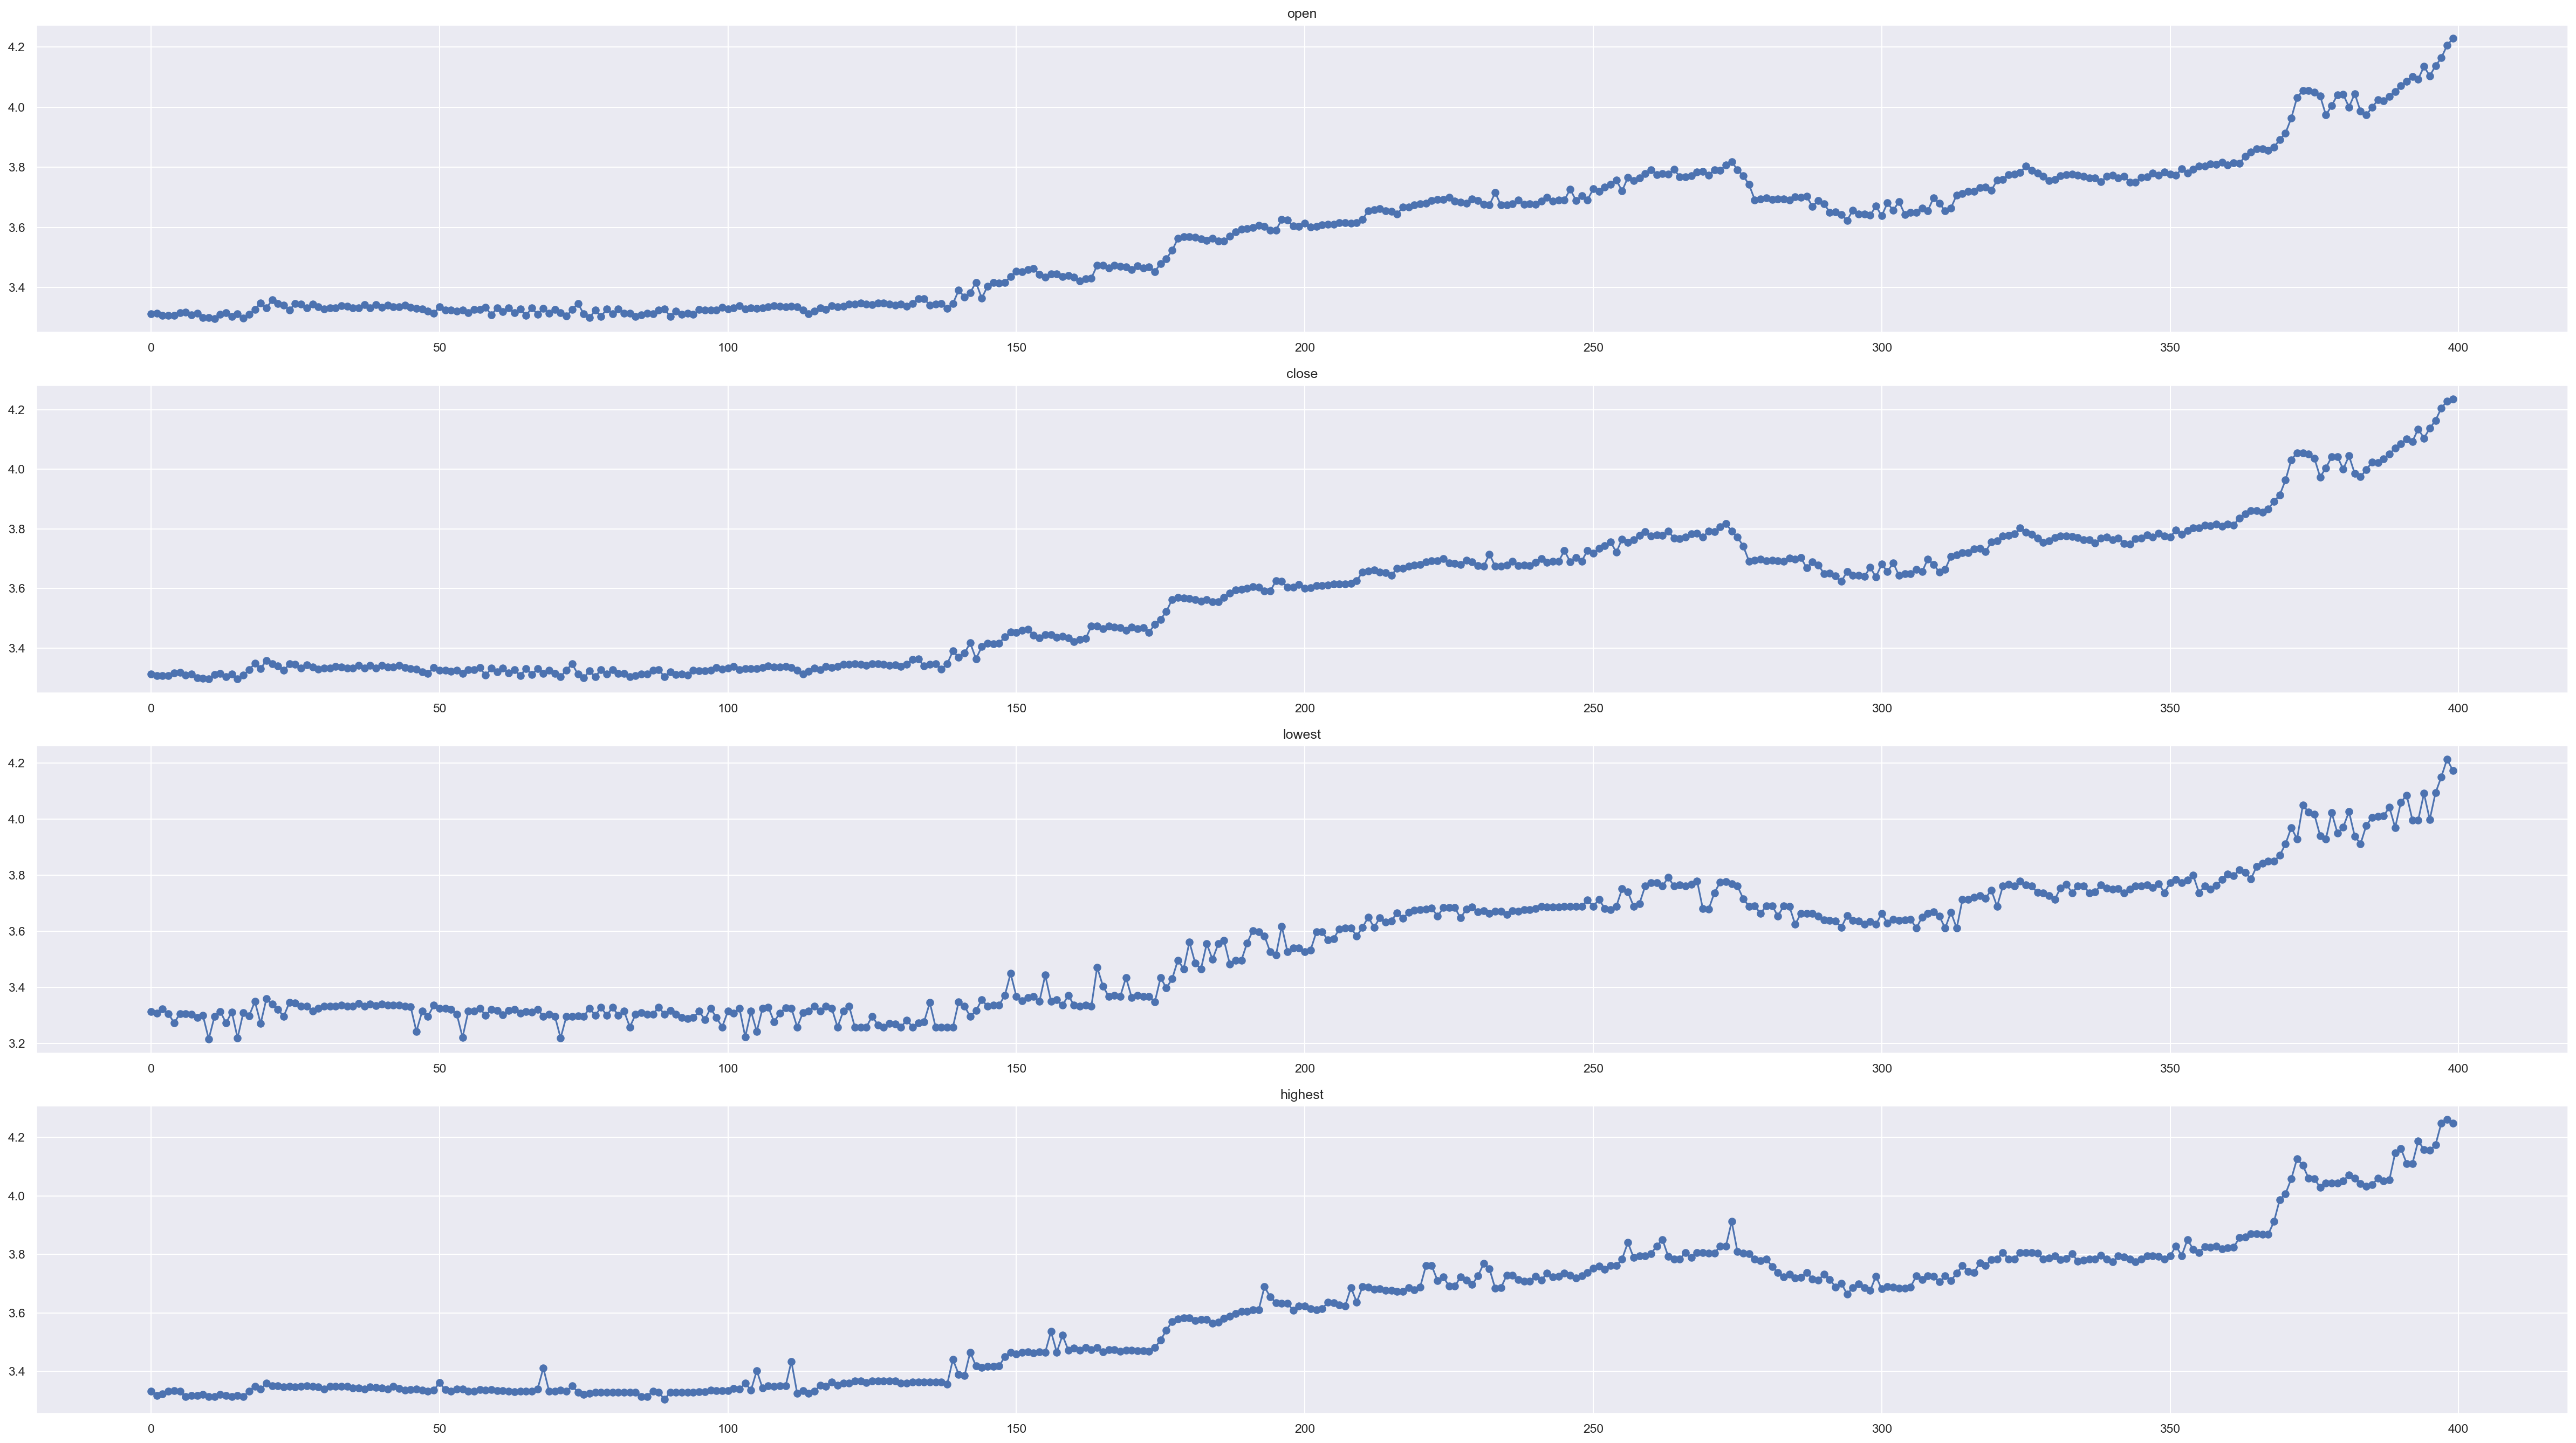

In [7]:
## 处理后的序列
plt.figure(figsize=(32, 18), dpi=150)

for i, column in enumerate(data.columns):
    plt.subplot(4, 1, i + 1)
    plt.plot(data[column], linestyle='-', color='b', marker='o', markerfacecolor='b')
    plt.title(column)

plt.tight_layout()
plt.savefig(fname='数据概览.png')

### 1.5 数据差分与平稳性检验<a id="1.5"></a>
#### 1.5.1 一阶差分<a id="1.5.1"></a>

In [8]:
## 1.4 差分
data_diff = data.diff()
data_diff = data_diff.reset_index(drop=True).dropna()
data_diff

open     close    lowest   highest
1    0.000728 -0.005837 -0.006572 -0.014389
2   -0.005837  0.000000  0.016349  0.005420
3    0.000000 -0.000366 -0.017082  0.008611
4   -0.000366  0.008384 -0.033548  0.002141
5    0.008384  0.001813  0.032814 -0.002499
..        ...       ...       ...       ...
395 -0.030867  0.032785 -0.093225 -0.003130
396  0.032785  0.026937  0.095227  0.018634
397  0.026937  0.040959  0.056695  0.074108
398  0.040959  0.023298  0.063455  0.012493
399  0.023298  0.007840 -0.040108 -0.012493

[399 rows x 4 columns]

#### 1.5.2 图检验<a id="1.5.2"></a>

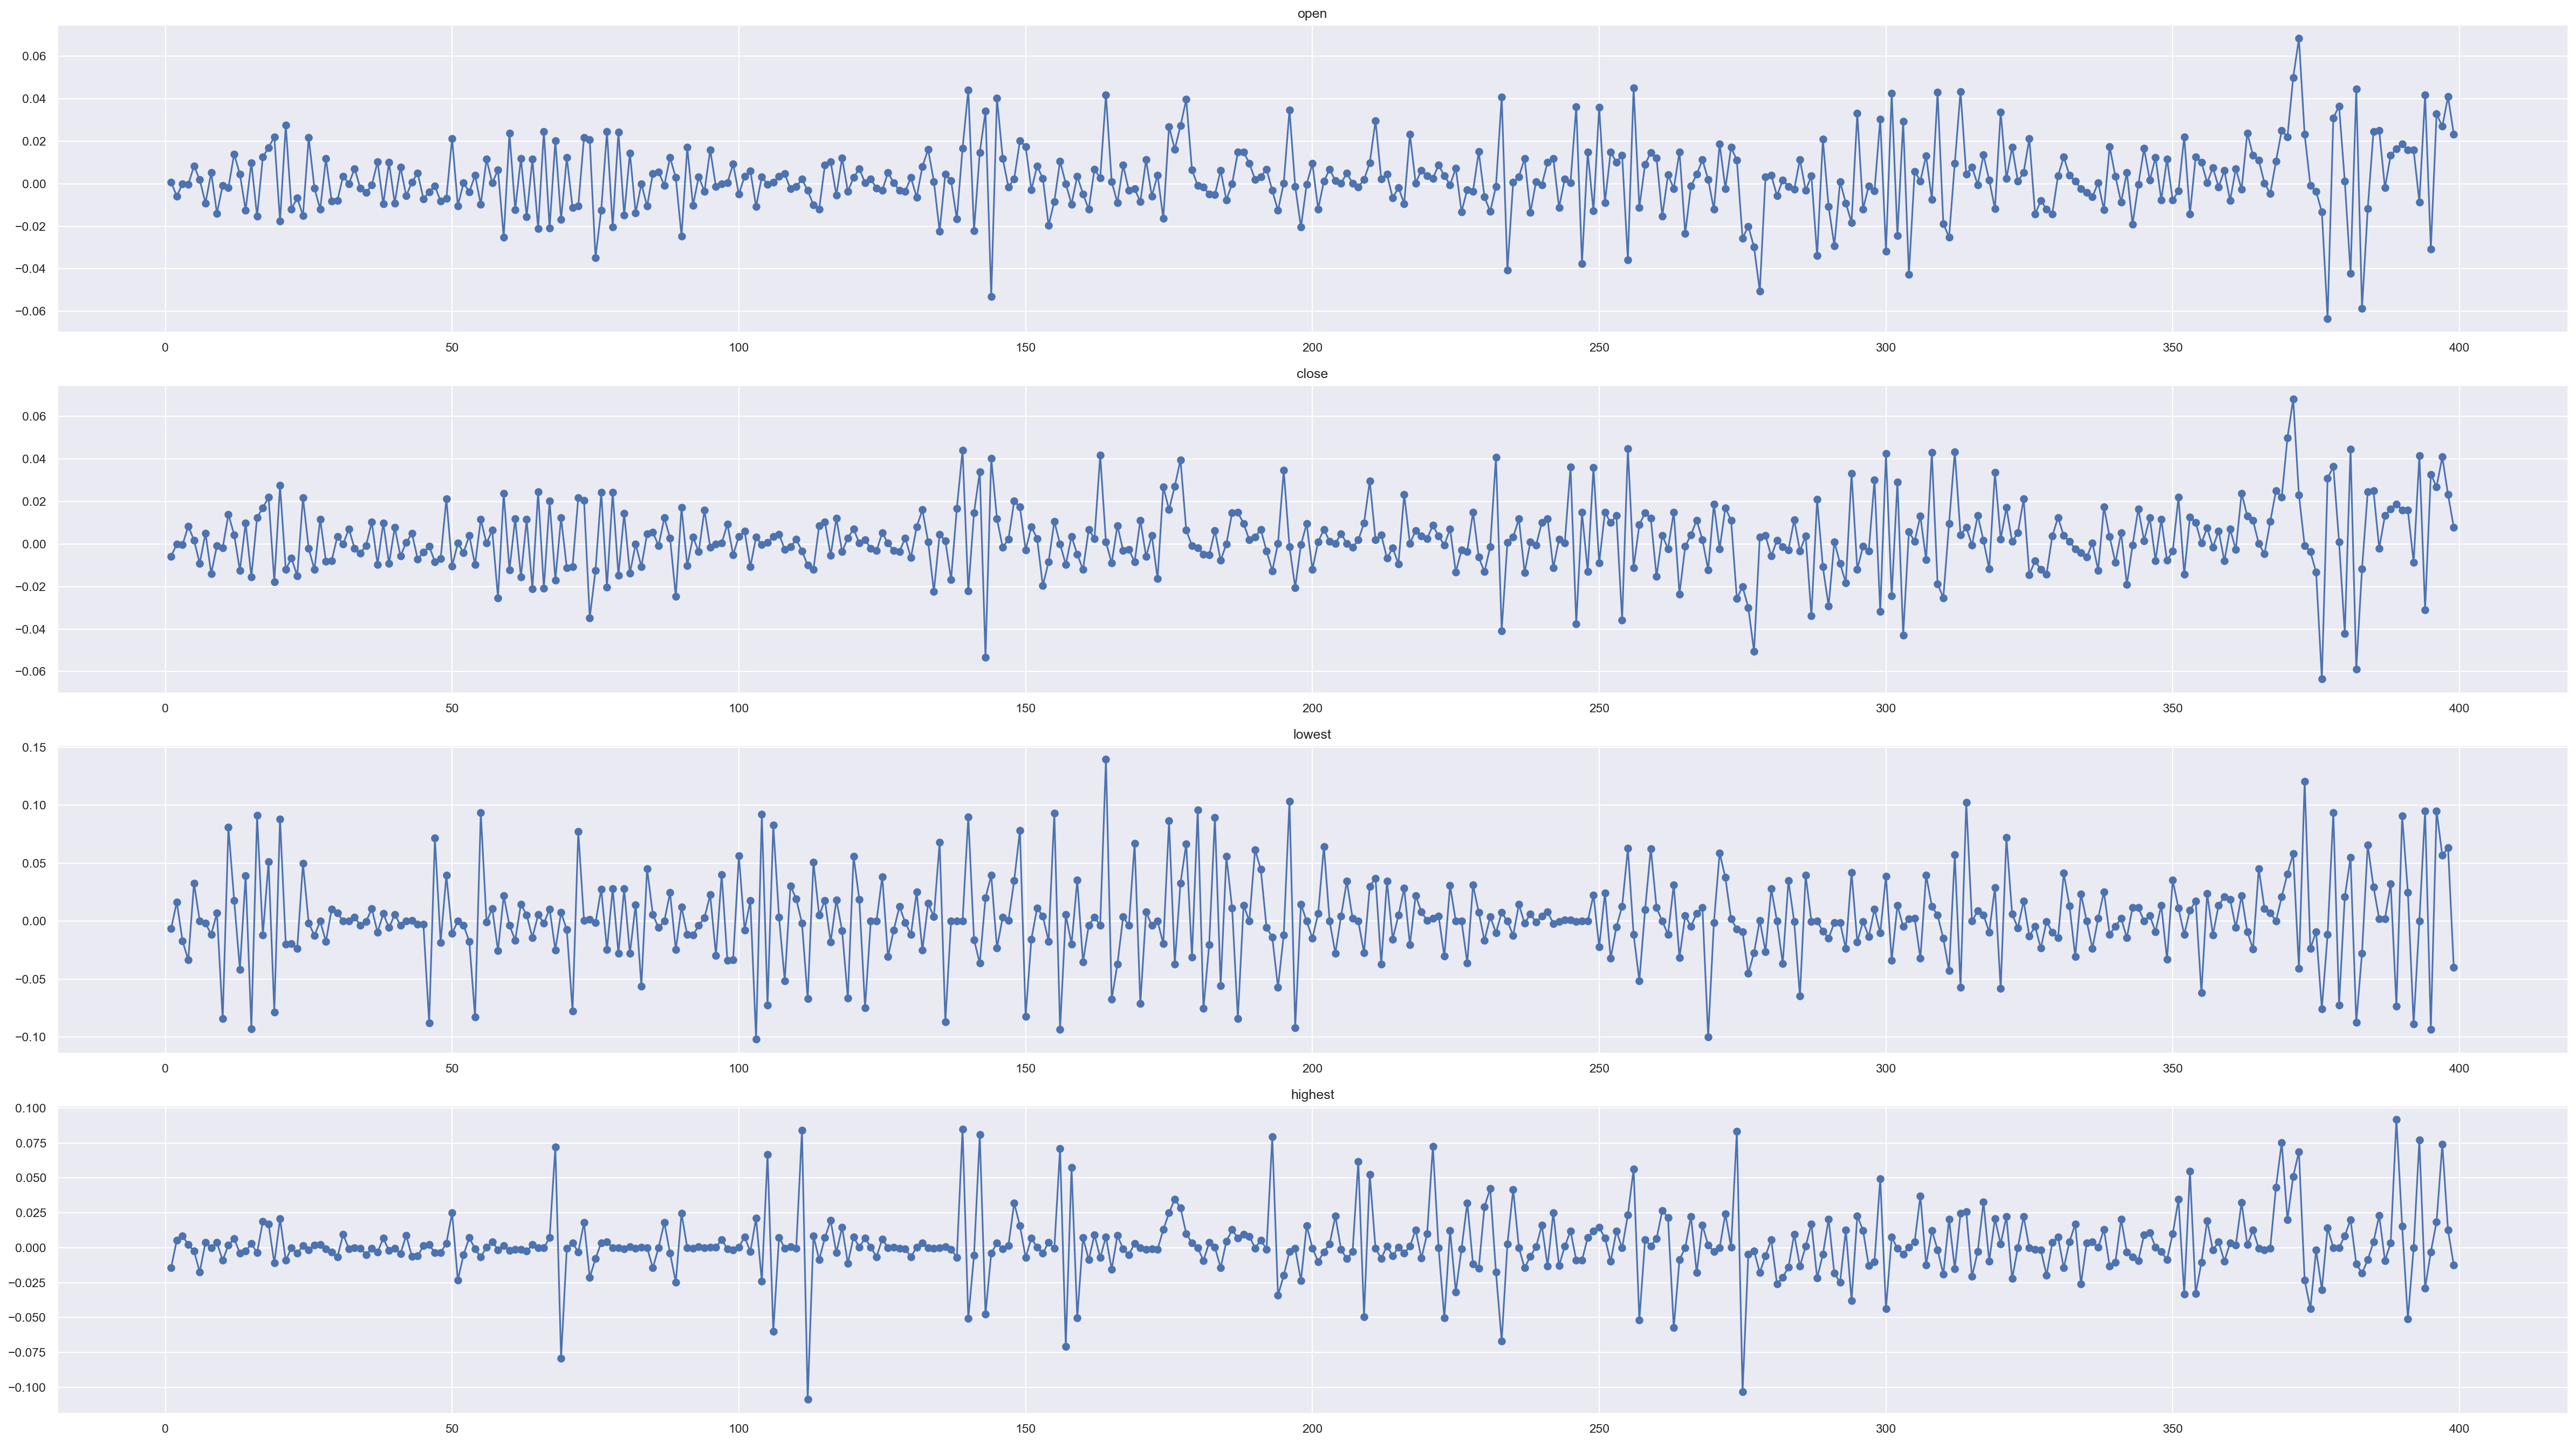

In [9]:
# 差分后的序列
plt.figure(figsize=(32, 18), dpi=150)

for i, column in enumerate(data_diff.columns):
    plt.subplot(4, 1, i + 1)
    plt.plot(data_diff[column], linestyle='-', color='b', marker='o', markerfacecolor='b')
    plt.title(column)

plt.tight_layout()
plt.savefig(fname='差分数据概览.png')

__图检验结果表明__：在图检验下，数据为平稳序列，但可能存在异方差性，需要进一步做PP检验

#### 1.5.3 PP检验<a id="1.5.3"></a>
原假设：时间序列包含单位根，即非平稳
$$H_0:\rho = 1$$
备择假设：时间序列为弱平稳
$$H_1:\rho < 1$$
检验统计量：
$$Z_{\rho} = \frac{\hat{\rho}-1}{s.e.{(\hat{\rho})}}$$
其中，$s.e.{(\hat{\rho})}$为$\hat{\rho}$的标准误

In [10]:
# PP检验
for col in data_diff.columns:
    pp = PhillipsPerron(data_diff[col])
    print(f'{col}列的PP检验结果：')
    print(pp.summary().as_text())

    p_value = pp.pvalue

    if p_value < 0.05:
        print(f"拒绝原假设，PP检验下{col}列的数据是平稳数据。")
    else:
        print(f"不拒绝原假设，PP检验下{col}列的数据是非平稳数据。")

open列的PP检验结果：
     Phillips-Perron Test (Z-tau)    
Test Statistic                -23.862
P-value                         0.000
Lags                               17
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
拒绝原假设，PP检验下open列的数据是平稳数据。
close列的PP检验结果：
     Phillips-Perron Test (Z-tau)    
Test Statistic                -23.858
P-value                         0.000
Lags                               17
-------------------------------------

Trend: Constant
Critical Values: -3.45 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.
拒绝原假设，PP检验下close列的数据是平稳数据。
lowest列的PP检验结果：
     Phillips-Perron Test (Z-tau)    
Test Statistic                -37.324
P-value                         0.000
Lags                               17
------------

__PP检验结果表明__：p值小于0.05，拒绝拒绝原假设，在PP检验下，认为一阶差分后的数据为平稳序列

### 1.6 纯随机性检验<a id="1.6"></a>
已经判断一阶差分后的序列为平稳性数据，进一步判断是否为白噪声数据，采用LB检验。  
原假设：$$H_0: \rho_1=\rho_2=\cdots=\rho_m=0, \forall m \geq 1$$  
备择假设：$$H_1: \rho_k \neq 0,  \forall m \geq 1, k \leq m$$  
LB统计量：$$LB=n(n+2) \sum_{k=1}^m\left(\frac{\hat{\rho}_k^2}{n-k}\right) \sim \chi^2(m)$$

In [11]:
## 纯随机性检验
for col in data_diff.columns:
    LB = acorr_ljungbox(data_diff[col], lags=[5,10,15,20,25,50,75,100], boxpierce=True, return_df=True)
    print(f"{col}列的纯随机性检验结果：")
    print(LB)

open列的纯随机性检验结果：
        lb_stat     lb_pvalue     bp_stat     bp_pvalue
5     52.858616  3.595815e-10   52.144391  5.039158e-10
10    76.800319  2.120982e-12   75.521576  3.765731e-12
15    80.868553  4.843702e-11   79.441789  8.833789e-11
20    83.999134  8.140780e-10   82.407739  1.526181e-09
25    87.141790  8.328169e-09   85.346485  1.619816e-08
50   130.848900  3.668027e-09  124.655819  2.604074e-08
75   164.115494  1.328845e-08  152.439821  3.268704e-07
100  214.318479  2.559744e-10  191.283816  1.081002e-07
close列的纯随机性检验结果：
        lb_stat     lb_pvalue     bp_stat     bp_pvalue
5     53.320135  2.890905e-10   52.597817  4.067493e-10
10    77.535705  1.523891e-12   76.243098  2.724163e-12
15    81.603570  3.551490e-11   80.162712  6.522110e-11
20    84.597468  6.422476e-10   82.998887  1.208857e-09
25    87.617954  6.975658e-09   85.823172  1.358160e-08
50   131.278363  3.195673e-09  125.093387  2.271325e-08
75   164.344649  1.245606e-08  152.710759  3.041176e-07
100  214.428393

__纯碎机性检验结果表明__：p值小于0.05，拒绝拒绝原假设，在LB检验下，认为一阶差分后的数据不是白噪声

## 二、一元线性时间序列模型实现K线预测<a id="2"></a>
通过对K线的四个关键指标：开盘价、收盘价、最低价、最高价分别建立一元线性时间序列模型实现预测
### 2.1 开盘价预测<a id="2.1"></a>
#### 2.1.1 模型识别<a id="2.1.1"></a>
##### 相关图判断

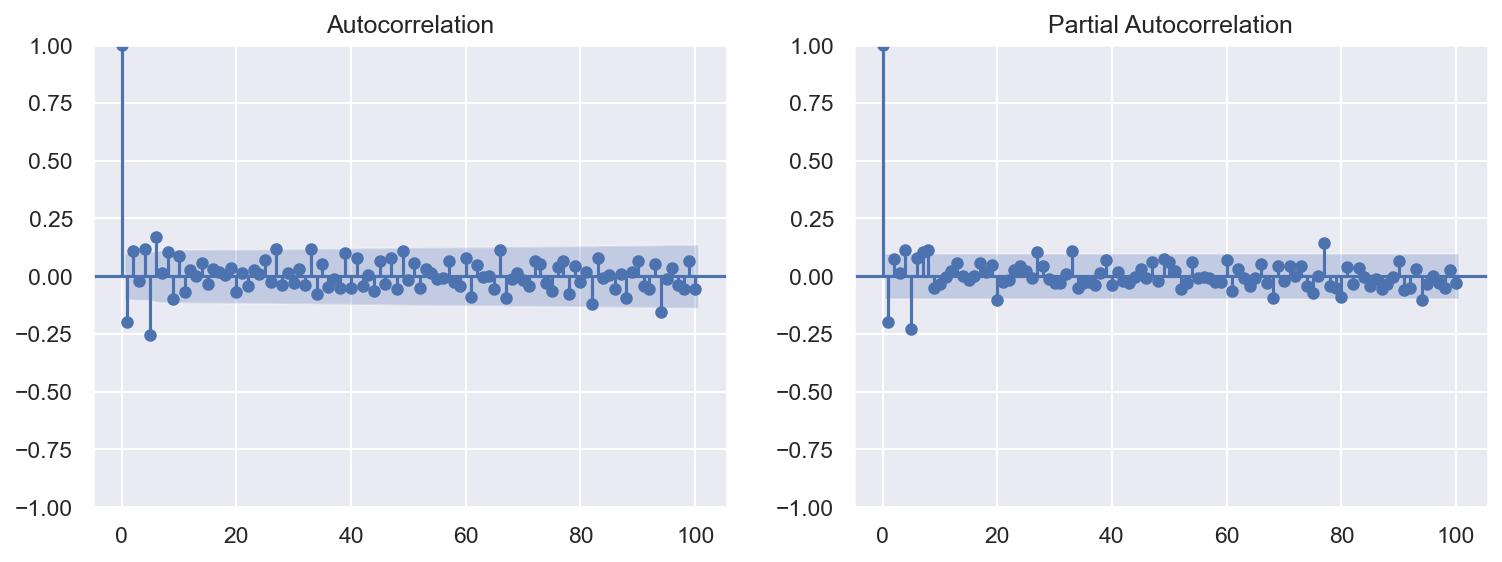

In [12]:
### 2 open
## 2.1 模型拟合
## 2.1.1 相关图
fig = plt.figure(figsize=(12, 4), dpi=150)
ax1 = fig.add_subplot(121)
sm.graphics.tsa.plot_acf(data_diff['open'], lags=100, ax=ax1)
ax2 = fig.add_subplot(122)
sm.graphics.tsa.plot_pacf(data_diff['open'], lags=100, ax=ax2)
plt.savefig(fname='open相关图.png')

__结果表明__：如果建立$ARIMA$模型，认为自相关系数与偏自相关系数均是拖尾的情况

##### 信息准则AIC判断
$$AIC = 2k - 2Ln(L)$$
其中，$k$是模型中待估计参数的数量，$L$是模型的似然函数值

In [13]:
## 2.2 自动拟合
series = pd.Series(data['open'])
model = auto_arima(series, seasonal= False, trace=True)
print(f"自动识别的阶数：(p, d, q) = {model.order}")

# 指数平滑
simple_model = SimpleExpSmoothing(data['open']).fit()
print("Simple Exponential Smoothing AIC:", simple_model.aic)

holt_model = Holt(data['open']).fit()
print("Holt's Exponential Smoothing AIC:", holt_model.aic)

exp_smooth_model = ExponentialSmoothing(data['open'], trend="add", seasonal=None, damped_trend=False).fit()
print("ExponentialSmoothing AIC:", exp_smooth_model.aic)

ets_model = ETSModel(data['open']).fit(disp=False)
print("ETSModel AIC:", ets_model.aic)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.52 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-1768.976, Time=0.04 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-1968.788, Time=0.03 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-2110.523, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1770.975, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-2128.599, Time=0.20 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-2126.404, Time=0.15 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-2134.351, Time=0.19 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-2126.212, Time=0.28 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-2129.720, Time=0.28 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-2121.725, Time=0.10 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=-2122.859, Time=0.25 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-2134.937, Time=0.11 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-2127.009, Time=0.17 sec
 ARIMA(1,2,1)(0,0,0)[0]  

__模型AIC表明__：即使指数平滑模型有更小的AIC，但综合考虑模型的可解释性，选择$ARIMA(1,2,2)$建模

#### 2.1.2 模型拟合<a id="2.1.2"></a>

In [14]:
## 拟合模型
mod = sm.tsa.statespace.SARIMAX(data['open'], order=(1,2,2))
res = mod.fit(disp=False) 
res.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

__参数估计检验__：p值小于0.05，参数估计检验通过

#### 2.1.3 均值模型的整体效果检验<a id="2.1.3"></a>
原假设：$$H_0: \rho_1=\rho_2=\cdots=\rho_m=0, \forall m \geq 1$$  
备择假设：$$H_1: \rho_k \neq 0,  \forall m \geq 1, k \leq m$$  
LB统计量：$$LB=n(n+2) \sum_{k=1}^m\left(\frac{\hat{\rho}_k^2}{n-k}\right) \sim \chi^2(m)$$

In [15]:
## 均值模型整体效果检验
# 计算残差序列
residuals = res.resid

LB = acorr_ljungbox(residuals, lags=[5,10,15,20,25,50,75,100], boxpierce=True, return_df=True)  
LB

lb_stat     lb_pvalue    bp_stat     bp_pvalue
5    63.304578  2.517509e-12  62.832146  3.153775e-12
10   63.318014  8.491950e-10  62.845254  1.044924e-09
15   63.342215  6.657315e-08  62.868507  8.049067e-08
20   63.396502  2.096349e-06  62.919978  2.492418e-06
25   63.428183  3.466807e-05  62.949713  4.051907e-05
50   63.509887  9.495563e-02  63.023227  1.021805e-01
75   63.722547  8.202445e-01  63.199484  8.324869e-01
100  63.935383  9.981035e-01  63.368107  9.984079e-01

__结果表明__：p值小于0.05，拒绝原假设，模型残差依然不是白噪声，残差中仍有信息

#### 2.1.4 残差的自相关检验<a id="2.1.4"></a>
##### DW检验
原假设：残差项不存在一阶序列相关
$$ H_0：P = 0$$
备择假设：残差项存在一阶序列相关
$$ H_1：P ≠ 0$$
检验统计量：$$DW=\sum_{t = 2}^{n}\frac{(e_{t}-e_{t - 1})^{2}}{\sum_{t = 2}^{n}e_{t}^{2}}$$
判断$$DW < d_l：拒绝H0，存在正相关性$$
$$d_l < DW < d_u：无法做出确切判断$$
$$d_u < DW < 4 - d_u：接受H0，不存在自相关性$$
$$4 - d_u < DW < 4 - d_l：无法做出确切判断$$
$$DW > 4 - d_l：拒绝H0，存在负相关性$$
其中$d_l$为DW检验统计量的下临界值，$d_u$为DW检验统计量的上临界值。

In [16]:
# DW检验
dw_stat = durbin_watson(residuals)
print("DW统计量:", dw_stat)
if dw_stat < 1:
    print("DW检验下可能存在正自相关")
elif dw_stat > 3:
    print("DW检验下可能存在负自相关")
else:
    print("DW检验无法判断")

DW统计量: 1.9990076187262447
DW检验无法判断


##### Durbin h检验
检验统计量$$Dh=DW\frac{n}{1-n\sigma^2_\beta}$$

In [17]:
# Durbin-h检验
# 首先获取滞后因变量系数估计量的方差
n = len(residuals)
var_beta_1 = np.var(residuals) 
h = dw_stat * (n / (1 - n * var_beta_1))
print("Dh统计量:", h)
z_alpha_2 = 1.96
if np.abs(h) > z_alpha_2:
    print("Dh检验下拒绝原假设，残差存在自相关性")
else:
    print("Dh检验下不拒绝原假设，残差不存在自相关性")

Dh统计量: -62.39764463673956
Dh检验下拒绝原假设，残差存在自相关性


__结果表明__：p值小于0.05，拒绝原假设，残差存在自相关性

#### 2.1.5 Auto-Regressive模型<a id="2.1.5"></a>

In [18]:
## 2.5.2 残差自相关性的解决 Auto-Regressive
rsd = pd.Series(residuals)
res = AutoReg(rsd, lags=1, trend='n').fit()
res.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

__参数估计检验__：p值小于0.05，参数估计检验通过，可以建立残差$AR(1)$模型

#### 2.1.6 残差的异方差性检验<a id="2.1.6"></a>

##### Portmanteau Q检验
原假设
$$H_0:\rho_1 = \rho_2 = \cdots = \rho_q = 0$$
备择假设
$$H_1:\rho_1,\rho_2,\cdots,\rho_q不全为0$$
检验统计量
$$ Q(q) = n(n+2)\sum_{i=1}^{q}\frac{\rho^2_i}{n-i} \sim \chi^2(q-1)$$

In [19]:
vt = res.resid
Q = acorr_ljungbox(vt**2, lags=[1,2,3,4,5,8,10], boxpierce = True, return_df = True )
Q

lb_stat     lb_pvalue    bp_stat     bp_pvalue
1   24.215879  8.611930e-07  24.034713  9.461444e-07
2   24.216007  5.515195e-06  24.034840  6.038108e-06
3   24.216111  2.251471e-05  24.034942  2.456387e-05
4   24.216216  7.228622e-05  24.035046  7.859311e-05
5   24.216275  1.972892e-04  24.035103  2.137664e-04
8   24.216699  2.107654e-03  24.035519  2.260574e-03
10  24.217001  7.044773e-03  24.035812  7.505901e-03

__结果表明__：p值小于0.05，拒绝原假设，在Q检验下，认为残差存在异方差性

##### 拉格朗日乘子(LM)检验
原假设
$$H_0:\rho_1 = \rho_2 = \cdots = \rho_q = 0$$
备择假设
$$H_1:\rho_1,\rho_2,\cdots,\rho_q不全为0$$
检验统计量
$$LM(q)=W^TW，W=(\frac{\rho^2_1}{\hat{\sigma}^2},\frac{\rho^2_2}{\hat{\sigma}^2},\cdots,\frac{\rho^2_q}{\hat{\sigma}^2})$$

In [20]:
# LM检验
for n in [1,2,3,4,5,8,10]:
    alm = acorr_lm(vt, nlags = n)[0:2]
    print(alm)
# （T值，p值）p值小于0.05拒绝原假设，存在异方差性

(70.94410109067303, 3.674908425631016e-17)
(9.284202901026395, 0.00963742376362388)
(30.25863766861483, 1.2175469890064308e-06)
(37.37602033482137, 1.5069614113760293e-07)
(44.53575759589696, 1.802929703124659e-08)
(62.17971615143202, 1.7381527234250898e-10)
(63.644659101754, 7.357281311623706e-10)


__结果表明__：p值小于0.05，拒绝原假设，在LM检验下，认为残差存在异方差性

#### 2.1.7 异方差模型的选择<a id="2.1.7"></a>
以信息准则AIC为标准选择模型

In [21]:
## 2.5.4 模型选择
# EGARCH
vt_model = arch_model(vt, mean='Zero', vol='EGARCH',p=1 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='EGARCH',p=2 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='EGARCH',p=1 ,q=2).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='EGARCH',p=2 ,q=2).fit(disp="off")  
print(vt_model.aic)

# APARCH
vt_model = arch_model(vt, mean='Zero', vol='APARCH',p=1 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='APARCH',p=2 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='APARCH',p=1 ,q=2).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='APARCH',p=2 ,q=2).fit(disp="off")  
print(vt_model.aic)

# ARCH
vt_model = arch_model(vt, mean='Zero', vol='ARCH',p=1 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='ARCH',p=2 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='ARCH',p=1 ,q=2).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='ARCH',p=2 ,q=2).fit(disp="off")  
print(vt_model.aic)

# FIGARCH
vt_model = arch_model(vt, mean='Zero', vol='FIGARCH',p=1 ,q=1).fit(disp="off")  
print(vt_model.aic)

# GARCH
vt_model = arch_model(vt, mean='Zero', vol='GARCH',p=1 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='GARCH',p=2 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='GARCH',p=1 ,q=2).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='GARCH',p=2 ,q=2).fit(disp="off")  
print(vt_model.aic)

# HARCH
vt_model = arch_model(vt, mean='Zero', vol='HARCH',p=1 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='HARCH',p=2 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='HARCH',p=1 ,q=2).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='HARCH',p=2 ,q=2).fit(disp="off")  
print(vt_model.aic)

-2165.0281834735215
-2163.9849464526633
-2163.5736716676797
-2161.984947572481
-2164.2160941071925
-2164.551517838392
-2162.216091805549
-2162.551518665849
-2137.580947661022
-2147.8204130039167
-2137.580947661022
-2147.8204130039167
-2017.9187026869076
-2083.6693342214976
-2070.275850554757
-2046.7861725014272
-2034.8586902058141
-2137.580947661022
-2150.0021581443416
-2137.580947661022
-2150.0021581443416


__结果表明__：$EGARCH(1,1)$模型的AIC最小，选择该模型

#### 2.1.8 EGARCH模型<a id="2.1.8"></a>

In [22]:
## 2.5.5 残差异方差性的解决 EGARCH 模型
vt_model = arch_model(vt, mean='Zero', vol='EGARCH',p=1 ,q=1).fit(disp="off")  
vt_model.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

__参数估计检验__：p值小于0.05，参数估计检验通过，可以建立残差$EGARCH(1,1)$模型

#### 2.1.9 残差模型的整体效果检验<a id="2.1.9"></a>
##### LB检验
原假设：$$H_0: \rho_1=\rho_2=\cdots=\rho_m=0, \forall m \geq 1$$  
备择假设：$$H_1: \rho_k \neq 0,  \forall m \geq 1, k \leq m$$  
LB统计量：$$LB=n(n+2) \sum_{k=1}^m\left(\frac{\hat{\rho}_k^2}{n-k}\right) \sim \chi^2(m)$$

In [23]:
## 2.5.6 残差模型整体效果检验纯随机检验
h_t = vt_model.conditional_volatility  
e_t = vt/(np.sqrt(h_t))  
LB = acorr_ljungbox(e_t, lags=[250,260,270,280,290,300], boxpierce=True, return_df=True)  
LB

lb_stat  lb_pvalue     bp_stat  bp_pvalue
250  249.549774   0.496139  169.133455   0.999977
260  255.780857   0.562280  171.373953   0.999995
270  264.286974   0.586621  174.224483   0.999999
280  294.015625   0.270690  183.395703   0.999998
290  303.462736   0.281576  186.019120   1.000000
300  313.827320   0.279890  188.716197   1.000000

__结果表明__：p值大于0.05，接受原假设，在LB检验下，认为残差为白噪声，模型的整体效果较好

因此最终模型为：
$$ARIMA(1,2,2)-AR(1)-EGARCH(1,1)$$
具体而言是：
$$\begin{cases}
X_t=-0.9040X_{t-1}-0.1883\epsilon_t-0.7706\epsilon_{t-1} \\
\epsilon_t=-0.3965\epsilon_{t-1}+v_t \\
v_t = \sqrt{h_t}e_t  \\ 
ln(h_t) = -1.4988 + 0.7109(\vert e_{t-1} \vert - \sqrt{\frac{2}{\pi}} ) + 0.8144ln(h_{t-1})
\end{cases}$$

#### 2.1.10 模型的预测<a id="2.1.10"></a>
预测未来30个数据

未来30个数据的均值预测值：400    69.476843
401    69.671356
402    70.485563
403    70.742773
404    71.514739
405    71.825389
406    72.563762
407    72.920196
408    73.632167
409    74.028058
410    74.719619
411    75.149738
412    75.825878
413    76.285914
414    76.950797
415    77.437194
416    78.094295
417    78.604127
418    79.256354
419    79.787218
420    80.437006
421    80.986932
422    81.636324
423    82.203704
424    82.854420
425    83.437941
426    84.091433
427    84.690034
428    85.347530
429    85.960355
Name: predicted_mean, dtype: float64
95%置信区间下区间下限：[67.47597151142665, 67.67048530810618, 68.48469194374925, 68.74190166361916, 69.51386833885283, 69.82451825200462, 70.56289051490296, 70.91932493949179, 71.6312964830017, 72.02718712879833, 72.71874749126609, 73.14886735467577, 73.8250074418241, 74.28504329557622, 74.9499259002722, 75.43632278427638, 76.09342406154086, 76.6032563100187, 77.2554831522231, 77.78634742692907, 78.43613484325435, 78.9860614169565, 79.6354533229

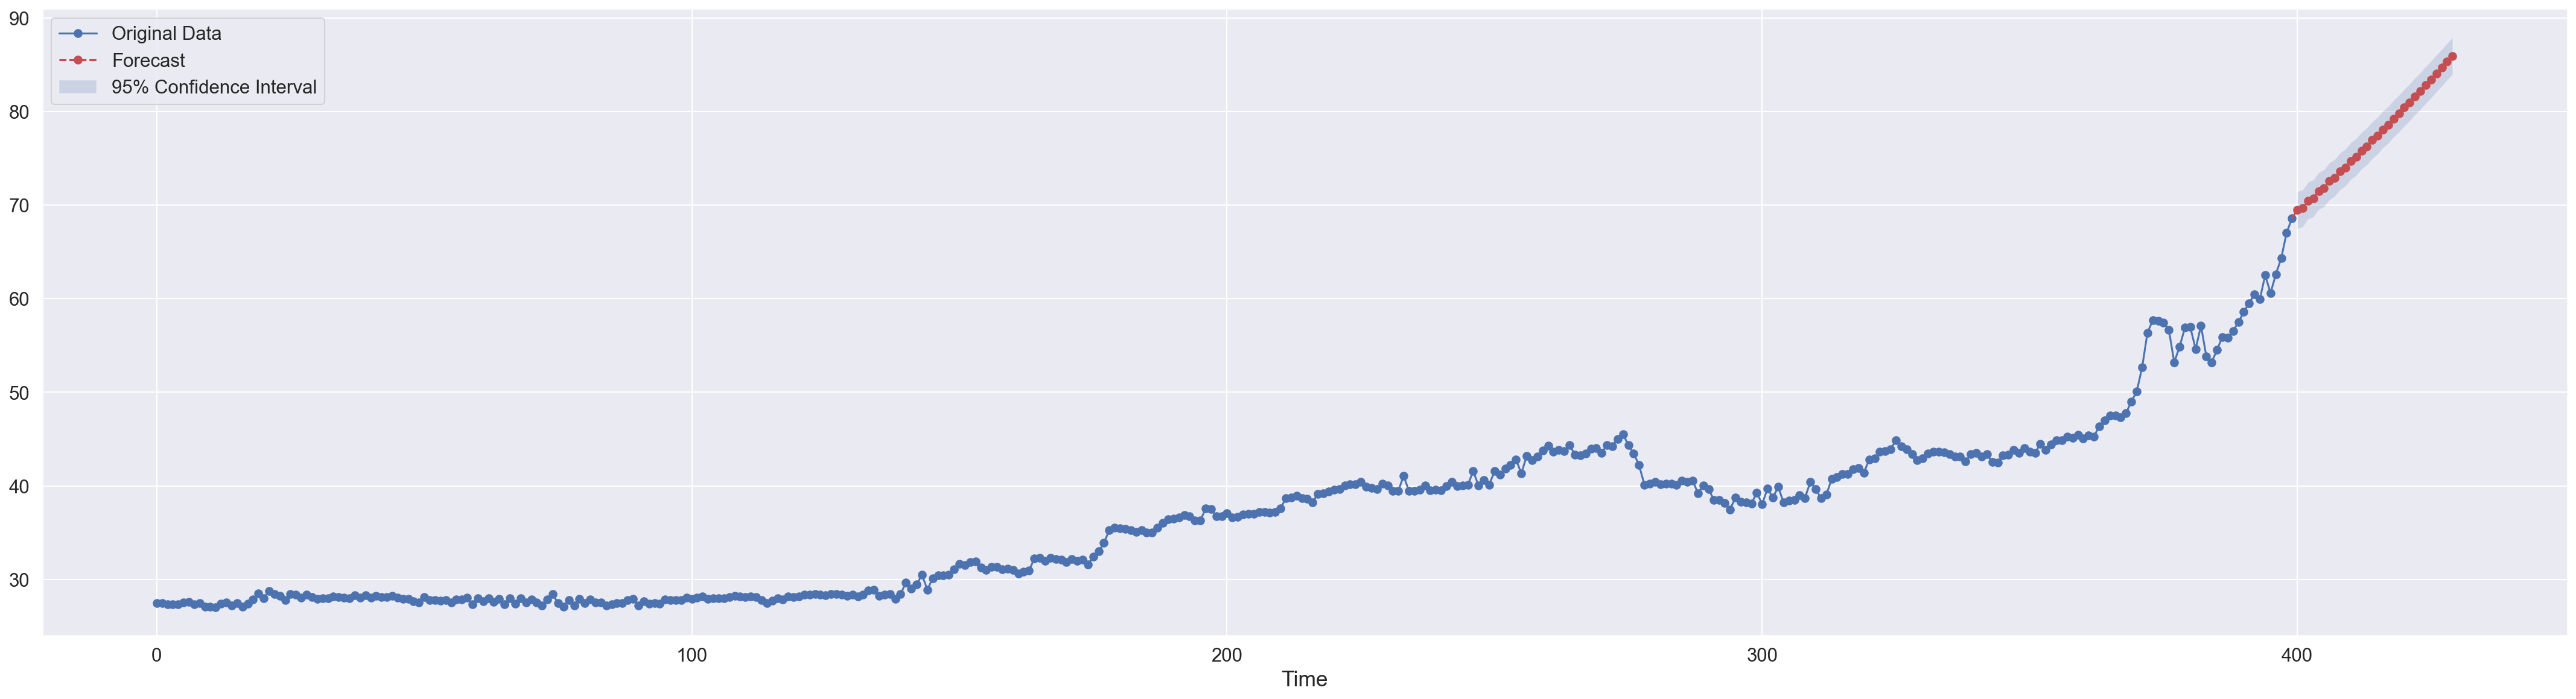

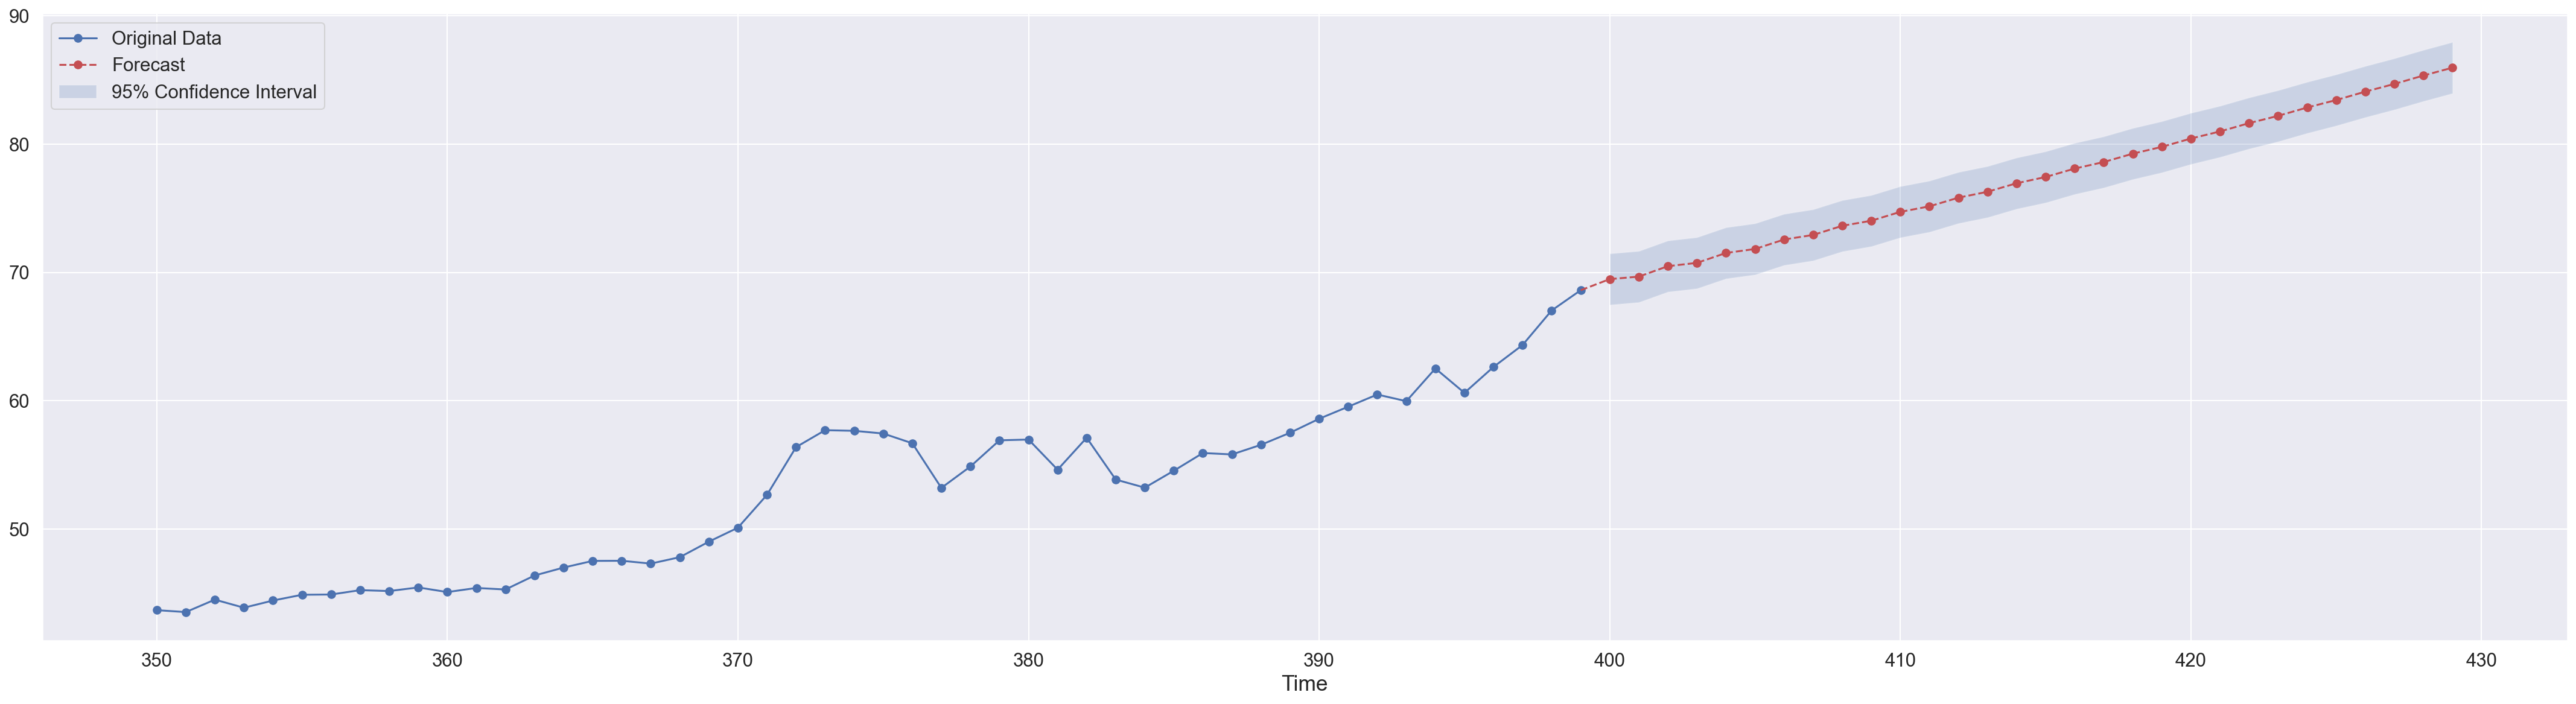

In [24]:
## 2.6 模型的预测
# 预测未来30个数据
last_index = len(data['open'],) - 1
forecast_index = np.arange(last_index + 1, last_index + 31)
mod = sm.tsa.statespace.SARIMAX(data['open'], order=(1,2,2))
res = mod.fit(disp=False) 
arima_forecast = res.predict(start=last_index + 1, end=last_index + 30)
arima_mean_forecast = arima_forecast

# 还原数据
mean_forecast = np.exp(arima_mean_forecast)
print(f"未来30个数据的均值预测值：{mean_forecast}")

# 计算置信区间
var_original = np.var(h_t)
var = np.exp(var_original)
lower = [1*(value - 2 * var) for value in mean_forecast]
upper = [1*(value + 2 * var) for value in mean_forecast]
print(f"95%置信区间下区间下限：{lower}")
print(f"95%置信区间下区间上限：{upper}")

# 绘图
plt.figure(figsize=(36, 9), dpi=150)
plt.plot(range(len(data['open'],)), df['open'], linestyle='-', color='b', marker='o', markerfacecolor='b', label='Original Data')
plt.plot(range(len(data['open'],), len(data['open'],) + len(mean_forecast)), mean_forecast, linestyle='--', color='r', marker='o', markerfacecolor='r', label='Forecast')
plt.fill_between(range(len(data['open'],), len(data['open'],) + len(mean_forecast)), lower, upper, alpha=0.2, label='95% Confidence Interval')
last_data_index = len(data['open']) - 1
last_pred_index = len(data['open'])
plt.plot([last_data_index, last_pred_index], [df['open'][last_data_index], mean_forecast[last_pred_index]], linestyle='--', color='r')
plt.xlabel('Time', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig(fname='open预测结果.png')

# 局部
original_data_length = len(data['open'])
last_50_index = range(original_data_length - 50, original_data_length)
plt.figure(figsize=(36, 9), dpi=150)
plt.plot(last_50_index, [df['open'][i] for i in last_50_index], linestyle='-', color='b', marker='o', markerfacecolor='b', label='Original Data')
plt.plot(range(original_data_length, original_data_length + len(mean_forecast)), mean_forecast, linestyle='--', color='r', marker='o', markerfacecolor='r', label='Forecast')
plt.fill_between(range(original_data_length, original_data_length + len(mean_forecast)), lower, upper, alpha=0.2, label='95% Confidence Interval')
last_data_index = len(data['open']) - 1
last_pred_index = len(data['open'])
plt.plot([last_data_index, last_pred_index], [df['open'][last_data_index], mean_forecast[last_pred_index]], linestyle='--', color='r')
plt.xlabel('Time', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig(fname='open预测结果放大图.png')

# 2.7 保存结果
open_mean_forecast = mean_forecast

### 2.2 收盘价预测<a id="2.2"></a>
#### 2.2.1 模型识别<a id="2.2.1"></a>
##### 相关图判断

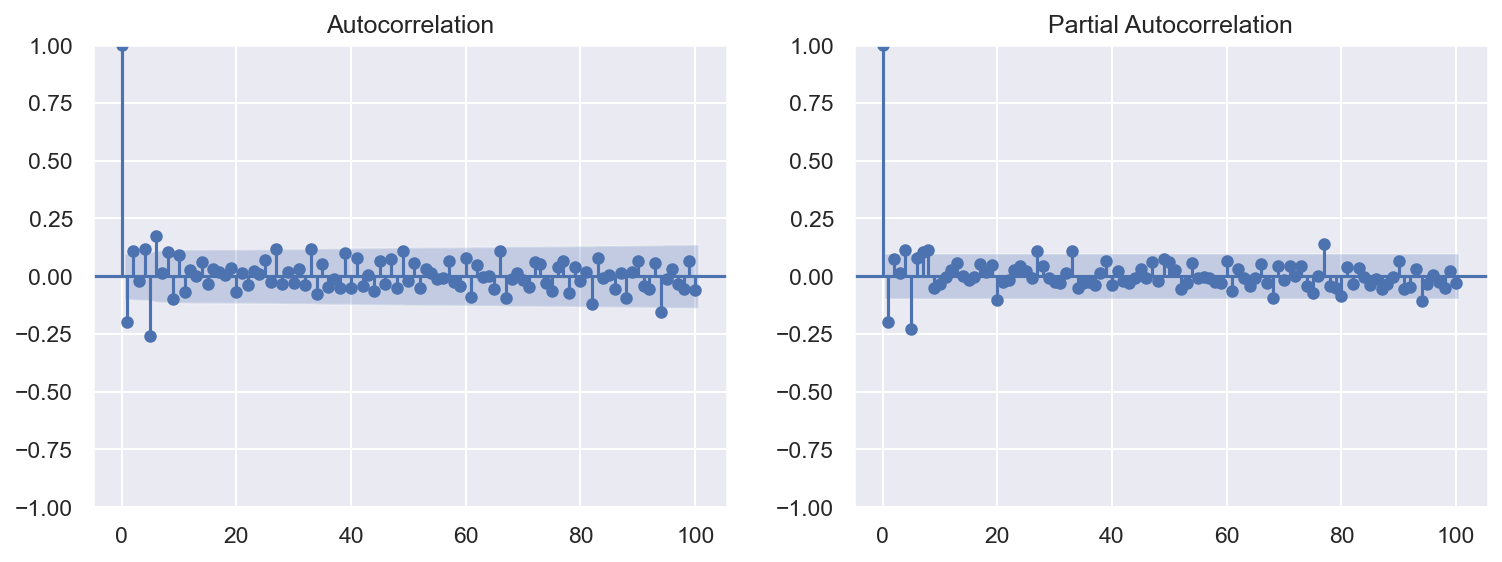

In [25]:
## 相关图
fig = plt.figure(figsize=(12, 4), dpi=150)
ax1 = fig.add_subplot(121)
sm.graphics.tsa.plot_acf(data_diff['close'], lags=100, ax=ax1)
ax2 = fig.add_subplot(122)
sm.graphics.tsa.plot_pacf(data_diff['close'], lags=100, ax=ax2)
plt.savefig(fname='close相关图.png')

__结果表明__：如果建立$ARIMA$模型，认为自相关系数与偏自相关系数均是拖尾的情况

##### 信息准则AIC判断
$$AIC = 2k - 2Ln(L)$$
其中，$k$是模型中待估计参数的数量，$L$是模型的似然函数值

In [26]:
## 3.2 自动拟合
series = pd.Series(data['close'])
model = auto_arima(series, seasonal= False, trace=True)
print(f"自动识别的阶数：(p, d, q) = {model.order}")

# 指数平滑
simple_model = SimpleExpSmoothing(data['close']).fit()
print("Simple Exponential Smoothing AIC:", simple_model.aic)

holt_model = Holt(data['close']).fit()
print("Holt's Exponential Smoothing AIC:", holt_model.aic)

exp_smooth_model = ExponentialSmoothing(data['close'], trend="add", seasonal=None, damped_trend=False).fit()
print("ExponentialSmoothing AIC:", exp_smooth_model.aic)

ets_model = ETSModel(data['close']).fit(disp=False)
print("ETSModel AIC:", ets_model.aic)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.45 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-1768.688, Time=0.02 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-1967.076, Time=0.08 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=-2103.944, Time=0.06 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-1770.687, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=-2128.558, Time=0.15 sec
 ARIMA(2,2,1)(0,0,0)[0] intercept   : AIC=-2126.231, Time=0.15 sec
 ARIMA(1,2,2)(0,0,0)[0] intercept   : AIC=-2134.246, Time=0.18 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=-2126.145, Time=0.17 sec
 ARIMA(1,2,3)(0,0,0)[0] intercept   : AIC=-2127.934, Time=0.25 sec
 ARIMA(0,2,3)(0,0,0)[0] intercept   : AIC=-2121.939, Time=0.09 sec
 ARIMA(2,2,3)(0,0,0)[0] intercept   : AIC=inf, Time=0.39 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=-2134.845, Time=0.12 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=-2126.967, Time=0.08 sec
 ARIMA(1,2,1)(0,0,0)[0]        

__模型AIC表明__：即使指数平滑模型有更小的AIC，但综合考虑模型的可解释性，选择$ARIMA(1,2,2)$建模

#### 2.2.2 模型拟合<a id="2.2.2"></a>

In [27]:
## 拟合模型
mod = sm.tsa.statespace.SARIMAX(data['close'], order=(1,2,2))
res = mod.fit(disp=False) 
res.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

__参数估计检验__：p值小于0.05，参数估计检验通过

#### 2.2.3 均值模型的整体效果检验<a id="2.2.3"></a>
原假设：$$H_0: \rho_1=\rho_2=\cdots=\rho_m=0, \forall m \geq 1$$  
备择假设：$$H_1: \rho_k \neq 0,  \forall m \geq 1, k \leq m$$  
LB统计量：$$LB=n(n+2) \sum_{k=1}^m\left(\frac{\hat{\rho}_k^2}{n-k}\right) \sim \chi^2(m)$$

In [28]:
## 3.4 均值模型整体效果检验
# 计算残差序列
residuals = res.resid

LB = acorr_ljungbox(residuals, lags=[5,10,15,20,25,50,75,100], boxpierce=True, return_df=True)  
LB

lb_stat     lb_pvalue    bp_stat     bp_pvalue
5    64.092228  1.728788e-12  63.613917  2.172081e-12
10   64.105925  6.007353e-10  63.627301  7.413590e-10
15   64.138759  4.834344e-08  63.658859  5.862834e-08
20   64.190710  1.569479e-06  63.708127  1.871566e-06
25   64.213290  2.680661e-05  63.729277  3.141790e-05
50   64.304967  8.404184e-02  63.811878  9.068284e-02
75   64.546911  7.999910e-01  64.011772  8.132704e-01
100  64.720697  9.975988e-01  64.149392  9.979761e-01

__结果表明__：p值小于0.05，拒绝原假设，模型残差依然不是白噪声，残差中仍有信息

#### 2.2.4 残差的自相关检验<a id="2.2.4"></a>
##### DW检验
原假设：残差项不存在一阶序列相关
$$ H_0：P = 0$$
备择假设：残差项存在一阶序列相关
$$ H_1：P ≠ 0$$
检验统计量：$$DW=\sum_{t = 2}^{n}\frac{(e_{t}-e_{t - 1})^{2}}{\sum_{t = 2}^{n}e_{t}^{2}}$$
判断$$DW < d_l：拒绝H0，存在正相关性$$
$$d_l < DW < d_u：无法做出确切判断$$
$$d_u < DW < 4 - d_u：接受H0，不存在自相关性$$
$$4 - d_u < DW < 4 - d_l：无法做出确切判断$$
$$DW > 4 - d_l：拒绝H0，存在负相关性$$
其中$d_l$为DW检验统计量的下临界值，$d_u$为DW检验统计量的上临界值。

In [29]:
# DW检验
dw_stat = durbin_watson(residuals)
print("DW统计量:", dw_stat)
if dw_stat < 1:
    print("DW检验下可能存在正自相关")
elif dw_stat > 3:
    print("DW检验下可能存在负自相关")
else:
    print("DW检验无法判断")

DW统计量: 2.005198725323032
DW检验无法判断


##### Durbin h检验
检验统计量$$Dh=DW\frac{n}{1-n\sigma^2_\beta}$$

In [30]:
# Durbin-h检验
# 首先获取滞后因变量系数估计量的方差
n = len(residuals)
var_beta_1 = np.var(residuals)
h = dw_stat * (n / (1 - n * var_beta_1))
print("Dh统计量:", h)
z_alpha_2 = 1.96
if np.abs(h) > z_alpha_2:
    print("Dh检验下拒绝原假设，残差存在自相关性")
else:
    print("Dh检验下不拒绝原假设，残差不存在自相关性")

Dh统计量: -62.45521973889517
Dh检验下拒绝原假设，残差存在自相关性


__结果表明__：p值小于0.05，拒绝原假设，残差存在自相关性

#### 2.2.5 Auto-Regressive模型<a id="2.2.5"></a>

In [31]:
## 3.5.2 残差自相关性的解决 Auto-Regressive
rsd = pd.Series(residuals)
res = AutoReg(rsd, lags=1, trend='n').fit()
res.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

__参数估计检验__：p值小于0.05，参数估计检验通过，可以建立残差$AR(1)$模型

#### 2.2.6 残差的异方差性检验<a id="2.2.6"></a>
##### Portmanteau Q检验
原假设
$$H_0:\rho_1 = \rho_2 = \cdots = \rho_q = 0$$
备择假设
$$H_1:\rho_1,\rho_2,\cdots,\rho_q不全为0$$
检验统计量
$$ Q(q) = n(n+2)\sum_{i=1}^{q}\frac{\rho^2_i}{n-i} \sim \chi^2(q-1)$$

In [32]:
# Portmanteau Q检验
vt = res.resid
Q = acorr_ljungbox(vt**2, lags=[1,2,3,4,5,8,10], boxpierce = True, return_df = True )
Q
# p值小于0.05拒绝原假设，存在异方差性

lb_stat     lb_pvalue    bp_stat     bp_pvalue
1   24.598687  7.059981e-07  24.414657  7.767546e-07
2   24.598728  4.554640e-06  24.414697  4.993624e-06
3   24.598870  1.872868e-05  24.414837  2.046245e-05
4   24.598942  6.056782e-05  24.414909  6.594609e-05
5   24.599066  1.664939e-04  24.415031  1.806552e-04
8   24.599535  1.816882e-03  24.415488  1.951437e-03
10  24.599631  6.158328e-03  24.415581  6.570504e-03

__结果表明__：p值小于0.05，拒绝原假设，在Q检验下，认为残差存在异方差性

##### 拉格朗日乘子(LM)检验
原假设
$$H_0:\rho_1 = \rho_2 = \cdots = \rho_q = 0$$
备择假设
$$H_1:\rho_1,\rho_2,\cdots,\rho_q不全为0$$
检验统计量
$$LM(q)=W^TW，W=(\frac{\rho^2_1}{\hat{\sigma}^2},\frac{\rho^2_2}{\hat{\sigma}^2},\cdots,\frac{\rho^2_q}{\hat{\sigma}^2})$$

In [33]:
# LM检验
for n in [1,2,3,4,5,8,10]:
    alm = acorr_lm(vt, nlags = n)[0:2]
    print(alm)
# （T值，p值）p值小于0.05拒绝原假设，存在异方差性

(68.84278903974185, 1.0663378378716542e-16)
(9.41501965078091, 0.009027228993301882)
(32.04322083505904, 5.124841803822683e-07)
(36.14530957585074, 2.701200991417783e-07)
(43.72103207590684, 2.638752406692265e-08)
(60.56899930963724, 3.6041491816064893e-10)
(64.45995282042384, 5.141131924336109e-10)


__结果表明__：p值小于0.05，拒绝原假设，在LM检验下，认为残差存在异方差性
#### 2.2.7 异方差模型的选择<a id="2.2.7"></a>
以信息准则AIC为标准选择模型

In [34]:
## 3.5.4 模型选择
# EGARCH
vt_model = arch_model(vt, mean='Zero', vol='EGARCH',p=1 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='EGARCH',p=2 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='EGARCH',p=1 ,q=2).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='EGARCH',p=2 ,q=2).fit(disp="off")  
print(vt_model.aic)

# APARCH
vt_model = arch_model(vt, mean='Zero', vol='APARCH',p=1 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='APARCH',p=2 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='APARCH',p=1 ,q=2).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='APARCH',p=2 ,q=2).fit(disp="off")  
print(vt_model.aic)

# ARCH
vt_model = arch_model(vt, mean='Zero', vol='ARCH',p=1 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='ARCH',p=2 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='ARCH',p=1 ,q=2).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='ARCH',p=2 ,q=2).fit(disp="off")  
print(vt_model.aic)

# FIGARCH
vt_model = arch_model(vt, mean='Zero', vol='FIGARCH',p=1 ,q=1).fit(disp="off")  
print(vt_model.aic)

# GARCH
vt_model = arch_model(vt, mean='Zero', vol='GARCH',p=1 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='GARCH',p=2 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='GARCH',p=1 ,q=2).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='GARCH',p=2 ,q=2).fit(disp="off")  
print(vt_model.aic)

# HARCH
vt_model = arch_model(vt, mean='Zero', vol='HARCH',p=1 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='HARCH',p=2 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='HARCH',p=1 ,q=2).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='HARCH',p=2 ,q=2).fit(disp="off")  
print(vt_model.aic)

-2163.498927337358
-2162.599009686152
-2162.115453402061
-2160.5990093145056
-2162.6713335431696
-2162.7309179923923
-2160.67132992522
-2160.7309151185373
-2135.570796014181
-2146.6420276982235
-2135.570796014181
-2146.6420276982235
-2018.5093005020121
-2083.9989096849704
-2070.5687945322193
-2113.7662418063883
-2158.0245033951155
-2135.570796014181
-2148.909979405048
-2135.570796014181
-2148.909979405048


__结果表明__：$EGARCH(1,1)$模型的AIC最小，选择该模型

#### 2.2.8 EGARCH模型<a id="2.2.8"></a>

In [35]:
## 3.5.5 残差异方差性的解决 EGARCH 模型
vt_model = arch_model(vt, mean='Zero', vol='EGARCH',p=1 ,q=1).fit(disp="off")  
vt_model.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

__参数估计检验__：p值小于0.05，参数估计检验通过，可以建立残差$EGARCH(1,1)$模型

#### 2.2.9 残差模型的整体效果检验<a id="2.2.9"></a>
##### LB检验
原假设：$$H_0: \rho_1=\rho_2=\cdots=\rho_m=0, \forall m \geq 1$$  
备择假设：$$H_1: \rho_k \neq 0,  \forall m \geq 1, k \leq m$$  
LB统计量：$$LB=n(n+2) \sum_{k=1}^m\left(\frac{\hat{\rho}_k^2}{n-k}\right) \sim \chi^2(m)$$

In [36]:
## 残差模型整体效果检验纯随机检验
h_t = vt_model.conditional_volatility  
e_t = vt/(np.sqrt(h_t))  
LB = acorr_ljungbox(e_t, lags=[250,260,270,280,290,300], boxpierce=True, return_df=True)  
LB

lb_stat  lb_pvalue     bp_stat  bp_pvalue
250  232.562096   0.778981  161.590386   0.999997
260  239.476618   0.814715  164.107677   0.999999
270  247.055766   0.838400  166.646918   1.000000
280  271.919465   0.624212  174.361075   1.000000
290  280.365739   0.646837  176.736187   1.000000
300  293.266277   0.598596  180.107990   1.000000

__结果表明__：p值大于0.05，接受原假设，在LB检验下，认为残差为白噪声，模型的整体效果较好

因此最终模型为：
$$ARIMA(1,2,2)-AR(1)-EGARCH(1,1)$$
具体而言是：
$$\begin{cases}
X_t=-0.9065X_{t-1}-0.1844\epsilon_t-0.7751\epsilon_{t-1} \\
\epsilon_t=-0.3990\epsilon_{t-1}+v_t \\
v_t = \sqrt{h_t}e_t  \\ 
ln(h_t) = -1.4895 + 0.7031\vert e_{t-1} \vert - \sqrt{\frac{2}{\pi}} ) + 0.8157ln(h_{t-1})
\end{cases}$$

#### 2.2.10 模型的预测<a id="2.2.10"></a>
预测未来30个数据

未来30个数据的均值预测值：400    69.363268
401    70.133045
402    70.401725
403    71.135017
404    71.451219
405    72.155432
406    72.512599
407    73.193924
408    73.586609
409    74.250231
410    74.673913
411    75.324172
412    75.775103
413    76.415638
414    76.890714
415    77.524582
416    78.021235
417    78.651002
418    79.167115
419    79.794944
420    80.328770
421    80.956487
422    81.506593
423    82.135739
424    82.700953
425    83.332838
426    83.912205
427    84.547941
428    85.140688
429    85.781227
Name: predicted_mean, dtype: float64
95%置信区间下区间下限：[67.3624150738273, 68.13219223210326, 68.40087174354078, 69.13416445888285, 69.45036627997553, 70.154579020245, 70.51174578587639, 71.19307141675937, 71.58575634257384, 72.24937781687827, 72.67306018542061, 73.32331872519383, 73.77425009373486, 74.41478542787824, 74.88986143894641, 75.52372873696707, 76.02038226703657, 76.65014963993445, 77.16626173305612, 77.79409153004907, 78.3279171555708, 78.95563374942002, 79.50573991

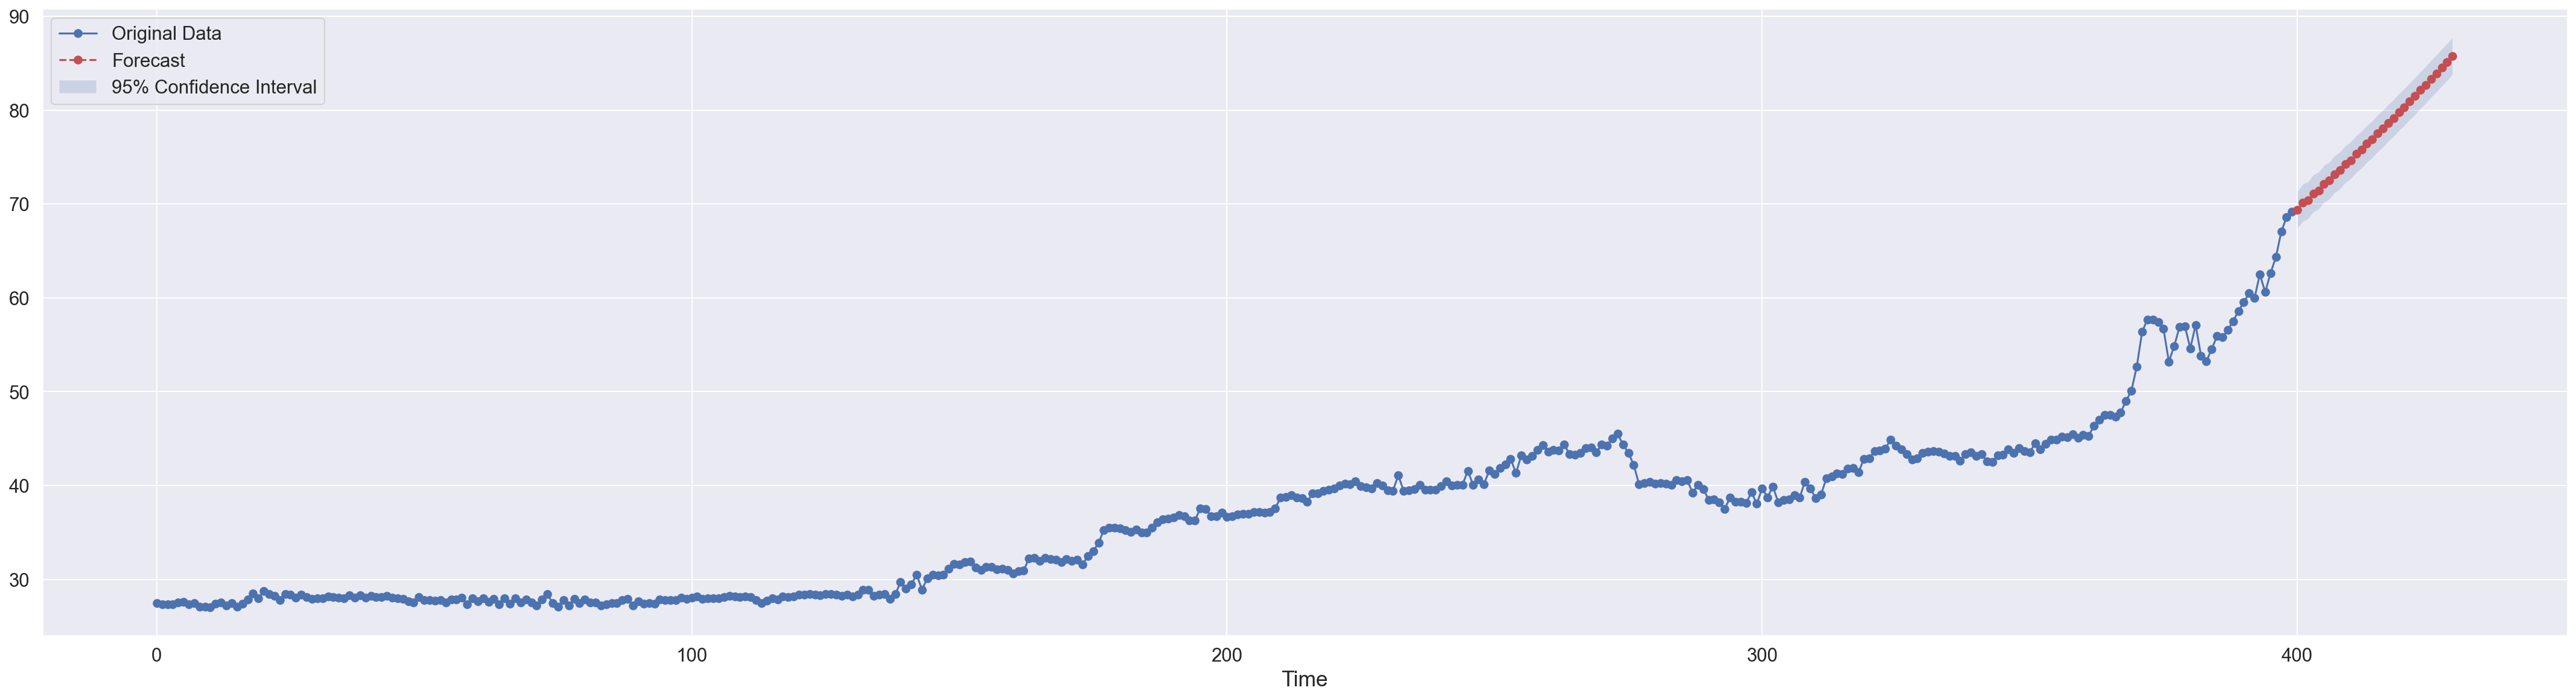

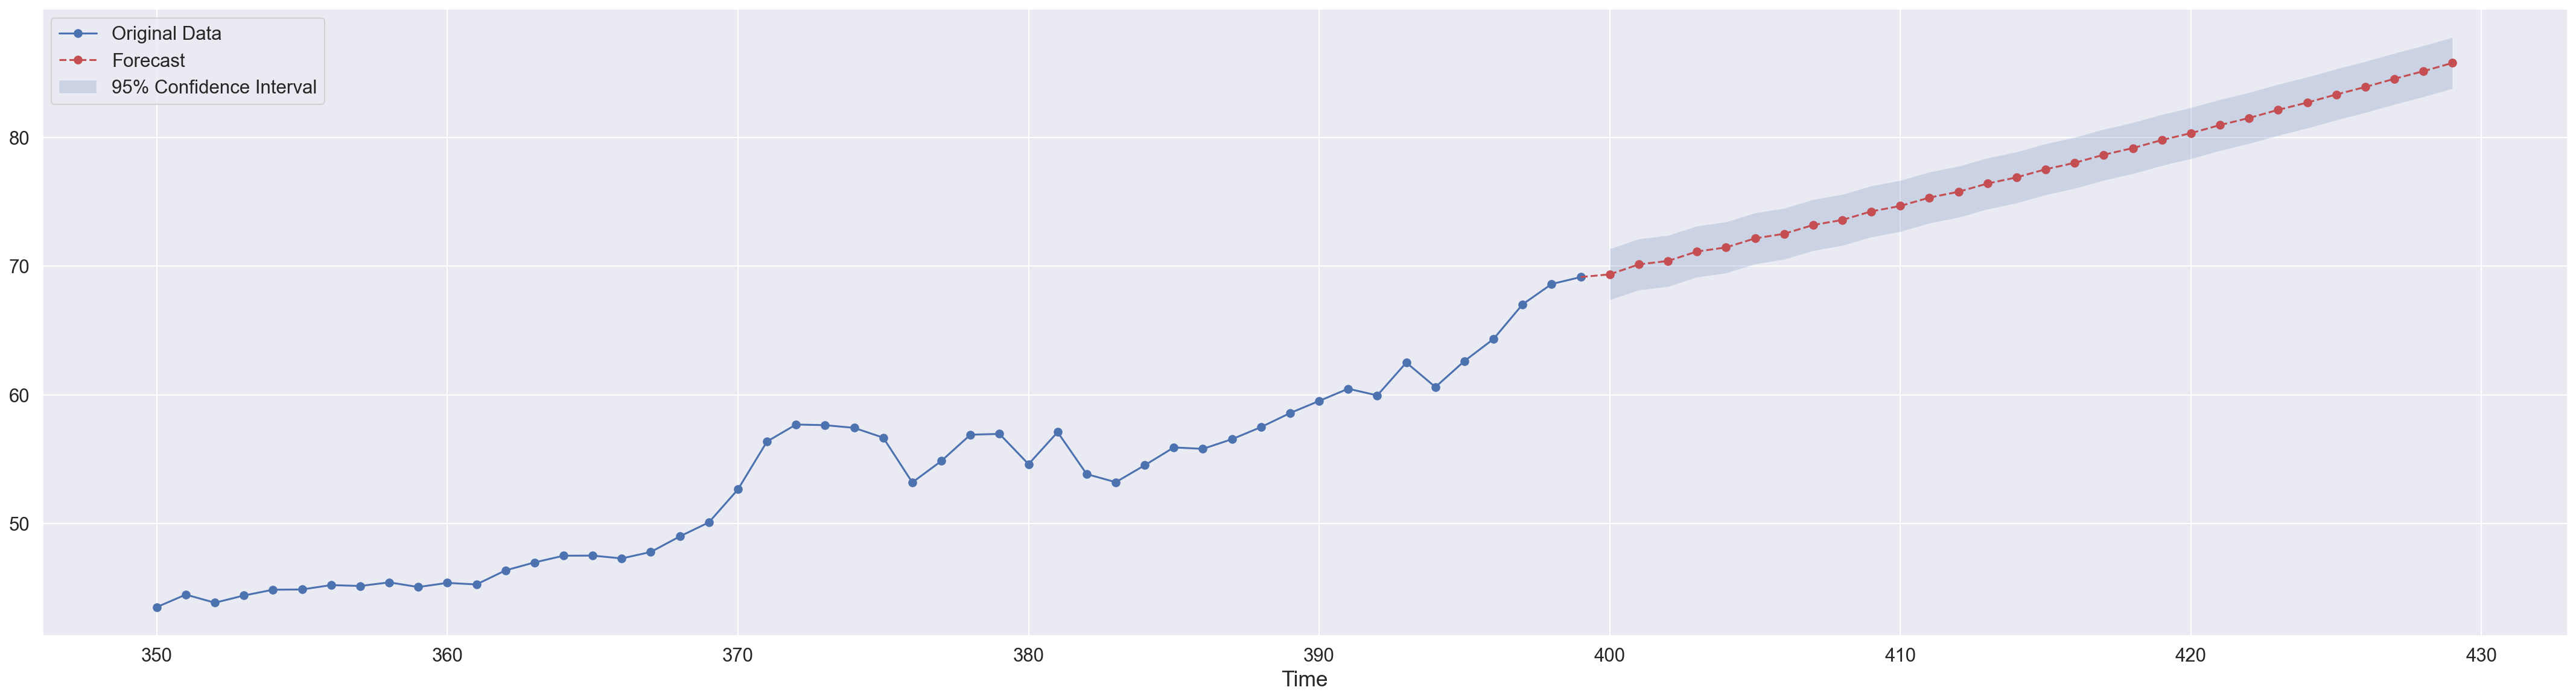

In [37]:
## 3.6 模型的预测
# 预测未来30个数据
last_index = len(data['close'],) - 1
forecast_index = np.arange(last_index + 1, last_index + 31)
mod = sm.tsa.statespace.SARIMAX(data['close'], order=(1,2,2))
res = mod.fit(disp=False) 
arima_forecast = res.predict(start=last_index + 1, end=last_index + 30)
arima_mean_forecast = arima_forecast

# 还原数据
mean_forecast = np.exp(arima_mean_forecast)
print(f"未来30个数据的均值预测值：{mean_forecast}")

# 计算置信区间
var_original = np.var(h_t)
var = np.exp(var_original)
lower = [1*(value - 2 * var) for value in mean_forecast]
upper = [1*(value + 2 * var) for value in mean_forecast]
print(f"95%置信区间下区间下限：{lower}")
print(f"95%置信区间下区间上限：{upper}")

# 绘图
plt.figure(figsize=(36, 9), dpi=150)
plt.plot(range(len(data['close'],)), df['close'], linestyle='-', color='b', marker='o', markerfacecolor='b', label='Original Data')
plt.plot(range(len(data['close'],), len(data['close'],) + len(mean_forecast)), mean_forecast, linestyle='--', color='r', marker='o', markerfacecolor='r', label='Forecast')
plt.fill_between(range(len(data['close'],), len(data['close'],) + len(mean_forecast)), lower, upper, alpha=0.2, label='95% Confidence Interval')
last_data_index = len(data['close']) - 1
last_pred_index = len(data['close'])
plt.plot([last_data_index, last_pred_index], [df['close'][last_data_index], mean_forecast[last_pred_index]], linestyle='--', color='r')
plt.xlabel('Time', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig(fname='close预测结果.png')

# 局部
original_data_length = len(data['close'])
last_50_index = range(original_data_length - 50, original_data_length)
plt.figure(figsize=(36, 9), dpi=150)
plt.plot(last_50_index, [df['close'][i] for i in last_50_index], linestyle='-', color='b', marker='o', markerfacecolor='b', label='Original Data')
plt.plot(range(original_data_length, original_data_length + len(mean_forecast)), mean_forecast, linestyle='--', color='r', marker='o', markerfacecolor='r', label='Forecast')
plt.fill_between(range(original_data_length, original_data_length + len(mean_forecast)), lower, upper, alpha=0.2, label='95% Confidence Interval')
last_data_index = len(data['close']) - 1
last_pred_index = len(data['close'])
plt.plot([last_data_index, last_pred_index], [df['close'][last_data_index], mean_forecast[last_pred_index]], linestyle='--', color='r')
plt.xlabel('Time', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig(fname='close预测结果放大图.png')

# 3.7 保存结果
close_mean_forecast = mean_forecast

### 2.3 最低价价预测<a id="2.3"></a>
#### 2.3.1 模型识别<a id="2.3.1"></a>
##### 相关图判断

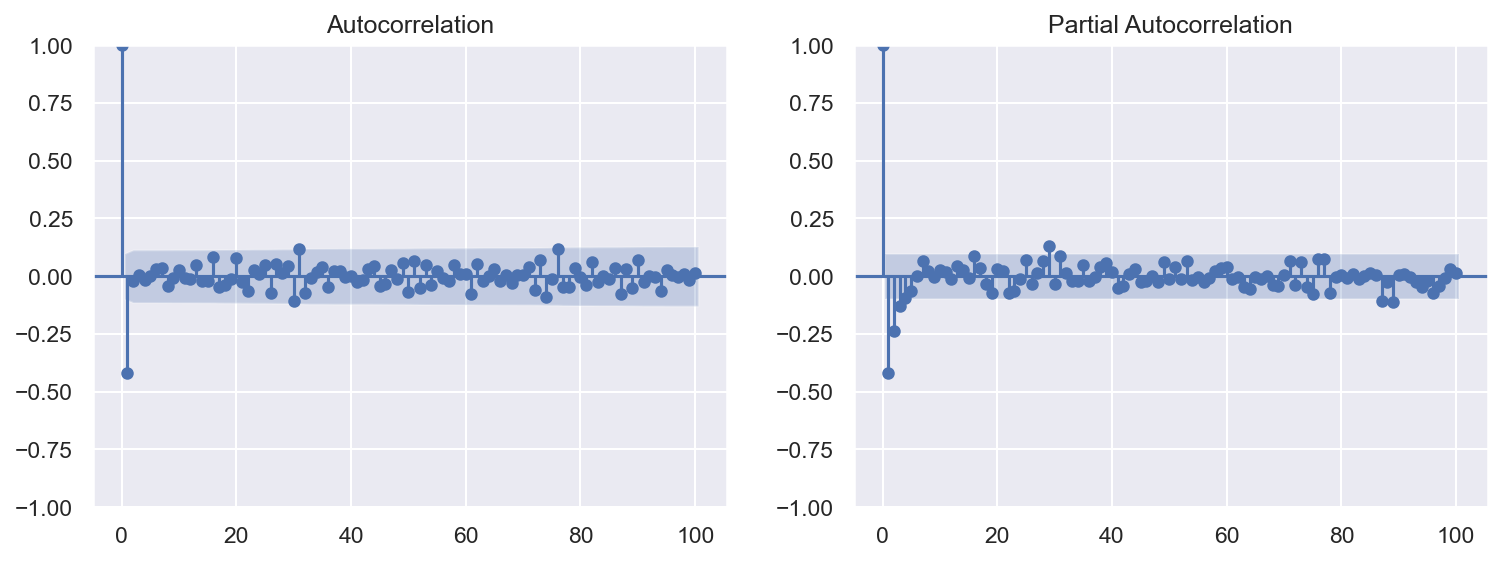

In [38]:
## 4.1.1 相关图
fig = plt.figure(figsize=(12, 4), dpi=150)
ax1 = fig.add_subplot(121)
sm.graphics.tsa.plot_acf(data_diff['lowest'], lags=100, ax=ax1)
ax2 = fig.add_subplot(122)
sm.graphics.tsa.plot_pacf(data_diff['lowest'], lags=100, ax=ax2)
plt.savefig(fname='lowest相关图.png')

__结果表明__：如果建立$ARIMA$模型，认为自相关系数一阶截尾，偏自相关系数脱尾

##### 信息准则AIC判断
$$AIC = 2k - 2Ln(L)$$
其中，$k$是模型中待估计参数的数量，$L$是模型的似然函数值

In [39]:
## 4.2 自动拟合
# ARIMA
series = pd.Series(data['lowest'])
model = auto_arima(series, seasonal= False, trace=True)
print(f"自动识别的阶数：(p, d, q) = {model.order}")

# 指数平滑
simple_model = SimpleExpSmoothing(data['lowest']).fit()
print("Simple Exponential Smoothing AIC:", simple_model.aic)

holt_model = Holt(data['lowest']).fit()
print("Holt's Exponential Smoothing AIC:", holt_model.aic)

exp_smooth_model = ExponentialSmoothing(data['lowest'], trend="add", seasonal=None, damped_trend=False).fit()
print("ExponentialSmoothing AIC:", exp_smooth_model.aic)

ets_model = ETSModel(data['lowest']).fit(disp=False)
print("ETSModel AIC:", ets_model.aic)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1560.933, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1458.814, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1533.847, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1566.681, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1459.576, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1564.728, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1564.732, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1562.710, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1560.639, Time=0.03 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.678 seconds
自动识别的阶数：(p, d, q) = (0, 1, 1)
Simple Exponential Smoothing AIC: -2701.0504018252236
Holt's Exponential Smoothing AIC: -2702.8850972151304
ExponentialSmoothing AIC: -2706.40404357186
ETSModel AIC: -1563.9107344186075


__模型AIC表明__：ARIMA家族模型中，$ARIMA(0,1,1)$建模为最优模型，但是只与环境变量有关，不符合实际，因此选择指数平滑预测

#### 2.3.2 模型拟合<a id="2.3.2"></a>

In [40]:
## 4.3 拟合模型
mod = ExponentialSmoothing(data['lowest'], trend="add", seasonal=None, damped_trend=False)
res = mod.fit() 
res.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

#### 2.3.3 均值模型的整体效果检验<a id="2.3.3"></a>
原假设：$$H_0: \rho_1=\rho_2=\cdots=\rho_m=0, \forall m \geq 1$$  
备择假设：$$H_1: \rho_k \neq 0,  \forall m \geq 1, k \leq m$$  
LB统计量：$$LB=n(n+2) \sum_{k=1}^m\left(\frac{\hat{\rho}_k^2}{n-k}\right) \sim \chi^2(m)$$

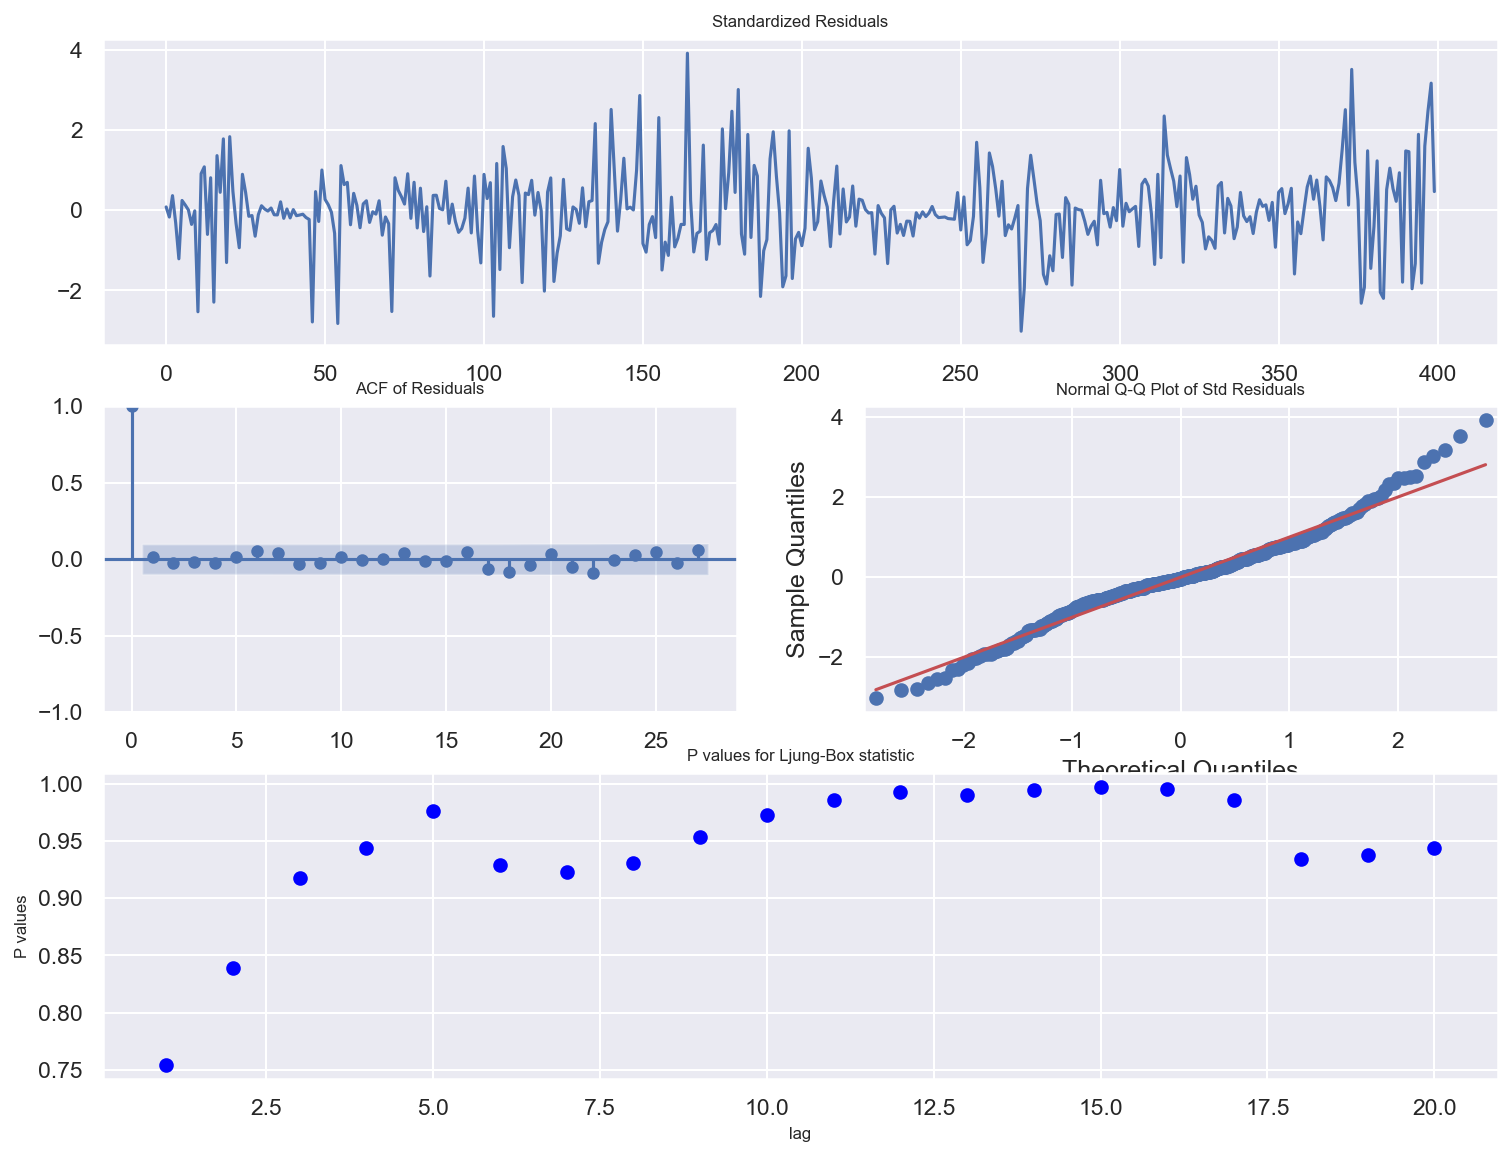

In [41]:
from statsmodels.graphics.tsaplots import plot_acf
# 计算残差序列
residuals = res.resid

# 检验残差序列为白噪声
LB = acorr_ljungbox(residuals, lags=range(1, 21), boxpierce=True, return_df=True)
LB

resid_sd = (residuals-np.mean(residuals))/np.std(residuals)
fig = plt.figure(figsize=(12,9),dpi=150)  
ax1 = fig.add_subplot(311)  
ax1.plot(resid_sd);plt.title('Standardized Residuals', fontsize=8)  

ax2 = fig.add_subplot(323)  
plot_acf(residuals, ax=ax2)
plt.title('ACF of Residuals', fontsize=8)  

ax3 = fig.add_subplot(324)  
sm.qqplot(resid_sd, fit=True, line="s",ax=ax3)  
plt.title('Normal Q-Q Plot of Std Residuals', fontsize=8)  

lags = np.arange(1,21)
LB_p = LB.lb_pvalue
ax4 = fig.add_subplot(313)  
ax4.scatter(lags,LB_p,color="blue")
plt.xlabel(xlabel="lag", fontsize=8)  
plt.ylabel(ylabel="P values", fontsize=8)  
plt.title('P values for Ljung-Box statistic', fontsize=8)   
plt.savefig(fname='lowest整体效果检验.png')

__结果表明__：p值大于0.05，不拒绝原假设，模型残差是白噪声，均值模型整体效果好，但根据残差图判断可能存在异方差性，需要进一步做诊断检验

#### 2.3.4 残差的自相关检验<a id="2.3.4"></a>
##### DW检验
原假设：残差项不存在一阶序列相关
$$ H_0：P = 0$$
备择假设：残差项存在一阶序列相关
$$ H_1：P ≠ 0$$
检验统计量：$$DW=\sum_{t = 2}^{n}\frac{(e_{t}-e_{t - 1})^{2}}{\sum_{t = 2}^{n}e_{t}^{2}}$$
判断$$DW < d_l：拒绝H0，存在正相关性$$
$$d_l < DW < d_u：无法做出确切判断$$
$$d_u < DW < 4 - d_u：接受H0，不存在自相关性$$
$$4 - d_u < DW < 4 - d_l：无法做出确切判断$$
$$DW > 4 - d_l：拒绝H0，存在负相关性$$
其中$d_l$为DW检验统计量的下临界值，$d_u$为DW检验统计量的上临界值。

In [42]:
# DW检验
dw_stat = durbin_watson(residuals)
print("DW统计量:", dw_stat)
if dw_stat < 1:
    print("DW检验下可能存在正自相关")
elif dw_stat > 3:
    print("DW检验下可能存在负自相关")
else:
    print("DW检验下不存在一阶自相关")

DW统计量: 1.9632628101776024
DW检验下不存在一阶自相关


##### Durbin h检验
检验统计量$$Dh=DW\frac{n}{1-n\sigma^2_\beta}$$

In [43]:
# Durbin-h检验
# 首先获取滞后因变量系数估计量的方差
n = len(residuals)
var_beta_1 = np.var(residuals)
h = dw_stat * (n / (1 - n * var_beta_1))
print("Dh统计量:", h)
z_alpha_2 = 1.96
if np.abs(h) >= z_alpha_2:
    print("Dh检验下拒绝原假设，残差存在自相关性")
else:
    print("Dh检验下不拒绝原假设，残差不存在自相关性")

Dh统计量: 1429.5058409068388
Dh检验下拒绝原假设，残差存在自相关性


#### 2.3.5 Auto-Regressive模型<a id="2.3.5"></a>

In [44]:
# 残差自相关性的解决 Auto-Regressive
rsd = pd.Series(residuals)
res = AutoReg(rsd, lags=4, trend='n').fit()
res.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

__参数估计检验__：从1阶升到4阶，所有参数p值大于0.05，参数估计检验未通过，无法建模

#### 2.3.6 残差的异方差性检验<a id="2.3.6"></a>
##### Portmanteau Q检验
原假设
$$H_0:\rho_1 = \rho_2 = \cdots = \rho_q = 0$$
备择假设
$$H_1:\rho_1,\rho_2,\cdots,\rho_q不全为0$$
检验统计量
$$ Q(q) = n(n+2)\sum_{i=1}^{q}\frac{\rho^2_i}{n-i} \sim \chi^2(q-1)$$

In [45]:
# Portmanteau Q检验
vt = res.resid
Q = acorr_ljungbox(vt**2, lags=[1,2,3,4,5,8,10], boxpierce = True, return_df = True )
Q
# p值小于0.05拒绝原假设，存在异方差性

lb_stat  lb_pvalue    bp_stat  bp_pvalue
1    4.759332   0.029140   4.723458   0.029754
2    9.557449   0.008407   9.473353   0.008768
3   16.752200   0.000795  16.577718   0.000863
4   17.332935   0.001665  17.149697   0.001808
5   26.302709   0.000078  25.961712   0.000091
8   35.632913   0.000020  35.081686   0.000026
10  44.589169   0.000003  43.790238   0.000004

__结果表明__：p值小于0.05，拒绝原假设，在Q检验下，认为残差存在异方差性

##### 拉格朗日乘子(LM)检验
原假设
$$H_0:\rho_1 = \rho_2 = \cdots = \rho_q = 0$$
备择假设
$$H_1:\rho_1,\rho_2,\cdots,\rho_q不全为0$$
检验统计量
$$LM(q)=W^TW，W=(\frac{\rho^2_1}{\hat{\sigma}^2},\frac{\rho^2_2}{\hat{\sigma}^2},\cdots,\frac{\rho^2_q}{\hat{\sigma}^2})$$

In [46]:
# LM检验
for n in [1,2,3,4,5,8,10]:
    alm = acorr_lm(vt, nlags = n)[0:2]
    print(alm)
# （T值，p值）p值小于0.05拒绝原假设，存在异方差性

(0.004078559857919051, 0.9490788332546923)
(0.0025183825993582154, 0.9987416011490358)
(0.002853660970073113, 0.9999594910859063)
(0.002925290509409706, 0.9999989313768851)
(0.047899342924565214, 0.9999737427697835)
(1.8069291821568787, 0.9863694423852686)
(1.9856782034977405, 0.9964487433150949)


__结果表明__：p值小于0.05，拒绝原假设，在LM检验下，认为残差存在异方差性

#### 2.3.7 异方差模型的选择<a id="2.3.7"></a>
以信息准则AIC为标准选择模型

In [47]:
## 4.4.3 模型选择
# EGARCH
vt_model = arch_model(vt, mean='Zero', vol='EGARCH',p=1 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='EGARCH',p=2 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='EGARCH',p=1 ,q=2).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='EGARCH',p=2 ,q=2).fit(disp="off")  
print(vt_model.aic)

# # APARCH（不收敛）
# vt_model = arch_model(vt, mean='Zero', vol='APARCH',p=1 ,q=1).fit(disp="off")  
# print(vt_model.aic)

# vt_model = arch_model(vt, mean='Zero', vol='APARCH',p=2 ,q=1).fit(disp="off")  
# print(vt_model.aic)

# vt_model = arch_model(vt, mean='Zero', vol='APARCH',p=1 ,q=2).fit(disp="off")  
# print(vt_model.aic)

# vt_model = arch_model(vt, mean='Zero', vol='APARCH',p=2 ,q=2).fit(disp="off")  
# print(vt_model.aic)

# ARCH
vt_model = arch_model(vt, mean='Zero', vol='ARCH',p=1 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='ARCH',p=2 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='ARCH',p=1 ,q=2).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='ARCH',p=2 ,q=2).fit(disp="off")  
print(vt_model.aic)

# FIGARCH
vt_model = arch_model(vt, mean='Zero', vol='FIGARCH',p=1 ,q=1).fit(disp="off")  
print(vt_model.aic)

# GARCH
vt_model = arch_model(vt, mean='Zero', vol='GARCH',p=1 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='GARCH',p=2 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='GARCH',p=1 ,q=2).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='GARCH',p=2 ,q=2).fit(disp="off")  
print(vt_model.aic)

# HARCH
vt_model = arch_model(vt, mean='Zero', vol='HARCH',p=1 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='HARCH',p=2 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='HARCH',p=1 ,q=2).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='HARCH',p=2 ,q=2).fit(disp="off")  
print(vt_model.aic)

-1592.2386110546058
-1590.3385145437132
-1591.6521923659477
-1589.8428502010195
-1568.7120287464124
-1573.8014731503272
-1568.7120287464124
-1573.8014731503272
-1587.156621451989
-1591.3536709997745
-1591.239343025952
-1588.2397920347253
-1589.8850652598871
-1568.7120287193584
-1225.098996238743
-1568.7120287193584
-1225.098996238743


__结果表明__：$EGARCH(1,1)$模型的AIC最小，选择该模型

#### 2.3.8 EGARCH模型<a id="2.3.8"></a>

In [48]:
## 4.4.4 残差异方差性的解决 EGARCH 模型
vt_model = arch_model(vt, mean='Zero', vol='EGARCH',p=1 ,q=1).fit(disp="off")  
vt_model.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

__参数估计检验__：p值小于0.05，参数估计检验通过，可以建立残差$EGARCH(1,1)$模型

#### 2.3.9 残差模型的整体效果检验<a id="2.3.9"></a>
##### LB检验
原假设：$$H_0: \rho_1=\rho_2=\cdots=\rho_m=0, \forall m \geq 1$$  
备择假设：$$H_1: \rho_k \neq 0,  \forall m \geq 1, k \leq m$$  
LB统计量：$$LB=n(n+2) \sum_{k=1}^m\left(\frac{\hat{\rho}_k^2}{n-k}\right) \sim \chi^2(m)$$

In [49]:
## 4.4.5 残差模型整体效果检验纯随机检验
h_t = vt_model.conditional_volatility  
e_t = vt/(np.sqrt(h_t))  
LB = acorr_ljungbox(e_t, lags=[250,260,270,280,290,300], boxpierce=True, return_df=True)  
LB

lb_stat  lb_pvalue     bp_stat  bp_pvalue
250  195.576388   0.995428  129.952352        1.0
260  205.349658   0.994749  133.404136        1.0
270  215.352065   0.993842  136.683239        1.0
280  221.676166   0.995749  138.584337        1.0
290  229.199848   0.996514  140.699808        1.0
300  236.471073   0.997244  142.518232        1.0

__结果表明__：p值大于0.05，接受原假设，在LB检验下，认为残差为白噪声，模型的整体效果较好

因此最终均值模型为：__指数平滑__  
水平成分：$$l_t = 0.4035741X_t + 0.5964259(l_{t-1}+b_{t-1})$$
趋势成分：$$b_t = 0.0263455(l_t-l_{t-1}) + 0.9736545b_{t-1}$$
残差：$$e_t = y_t - \hat{y_t}$$
残差模型是：$EGARCH(1,1)$
$$\begin{cases}
v_t = \sqrt{h_t}e_t  \\ 
ln(h_t) = -0.7019 + 0.2098(\vert e_{t-1} \vert - \sqrt{\frac{2}{\pi}} ) + 0.8953ln(h_{t-1})
\end{cases}$$

#### 2.3.10 模型的预测<a id="2.3.10"></a>
预测未来30个数据

未来30个数据的均值预测值：400    64.792722
401    65.260560
402    65.731776
403    66.206395
404    66.684440
405    67.165938
406    67.650912
407    68.139388
408    68.631391
409    69.126946
410    69.626080
411    70.128818
412    70.635185
413    71.145209
414    71.658916
415    72.176332
416    72.697483
417    73.222398
418    73.751103
419    74.283626
420    74.819993
421    75.360234
422    75.904375
423    76.452446
424    77.004473
425    77.560487
426    78.120515
427    78.684587
428    79.252732
429    79.824979
dtype: float64
95%置信区间下区间下限：[62.79262832851239, 63.26046653893282, 63.73168279221866, 64.2063014796516, 64.68434716863153, 65.16584460394807, 65.6508187090617, 66.13929458739344, 66.6312975236245, 67.12685298500524, 67.62598662267305, 68.12872427298026, 68.63509195883175, 69.14511589103154, 69.65882246963974, 70.17623828533905, 70.69739012081132, 71.22230495212355, 71.75100995012441, 72.28353248185087, 72.8199001119444, 73.36014060407798, 73.90428192239337, 74.45235223294

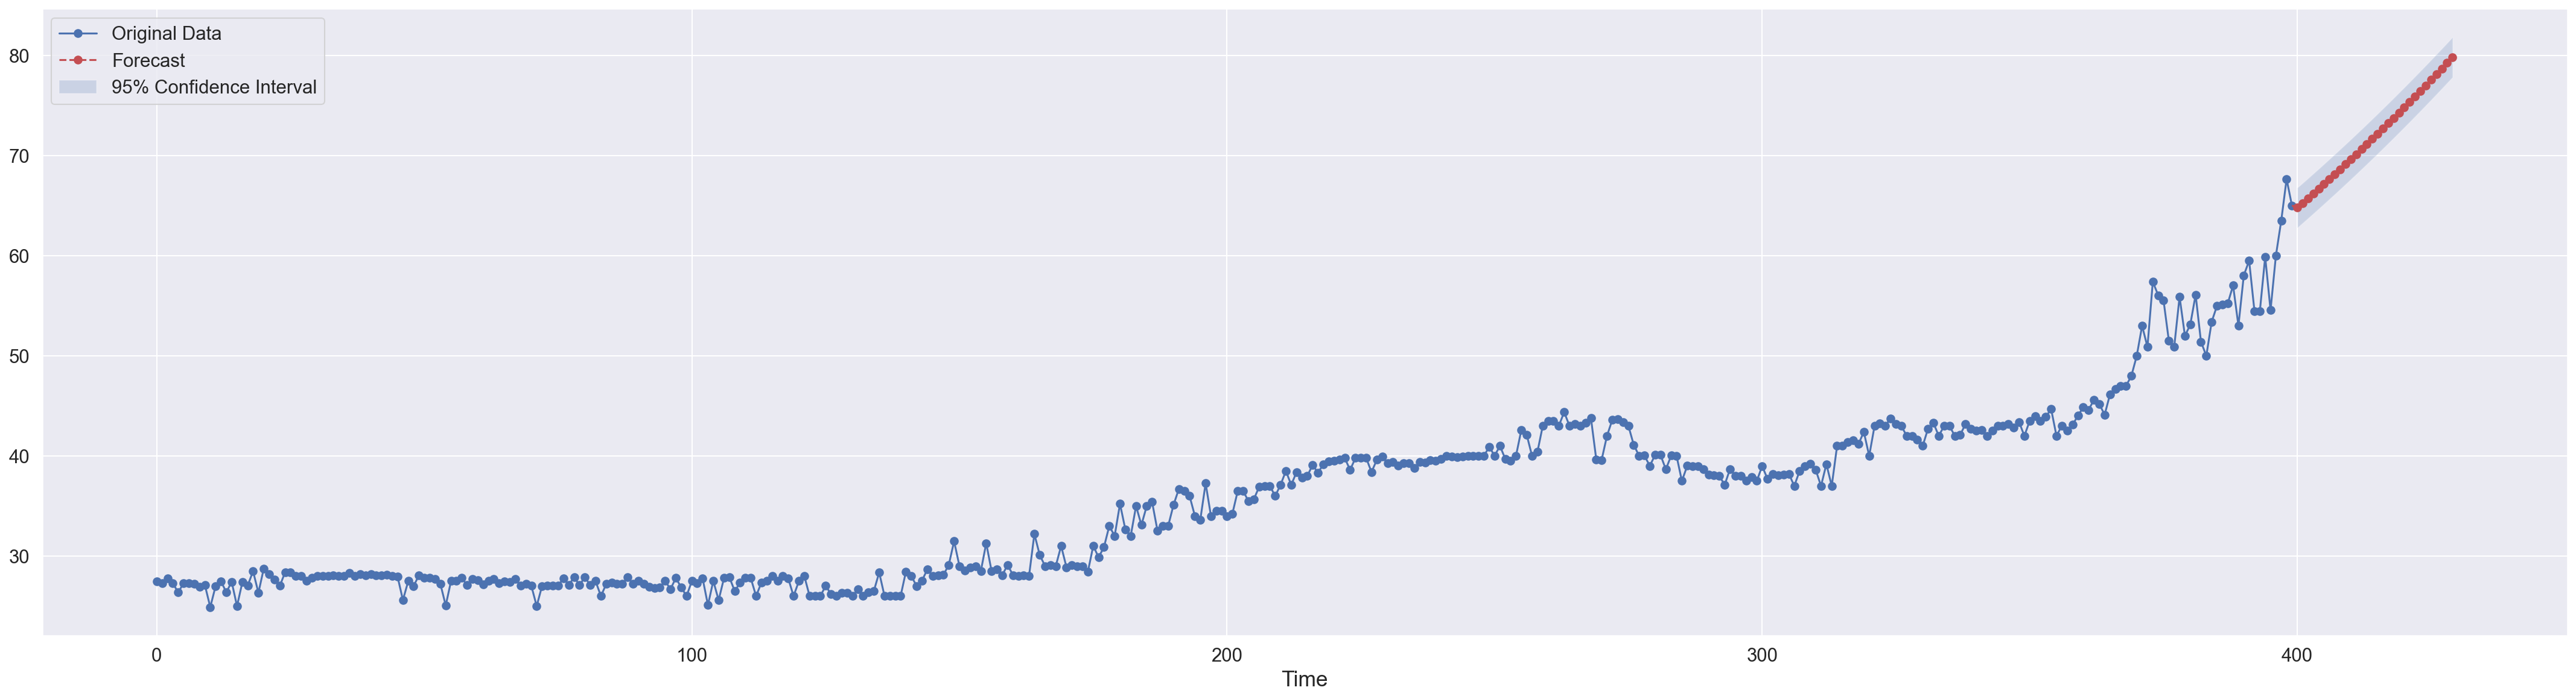

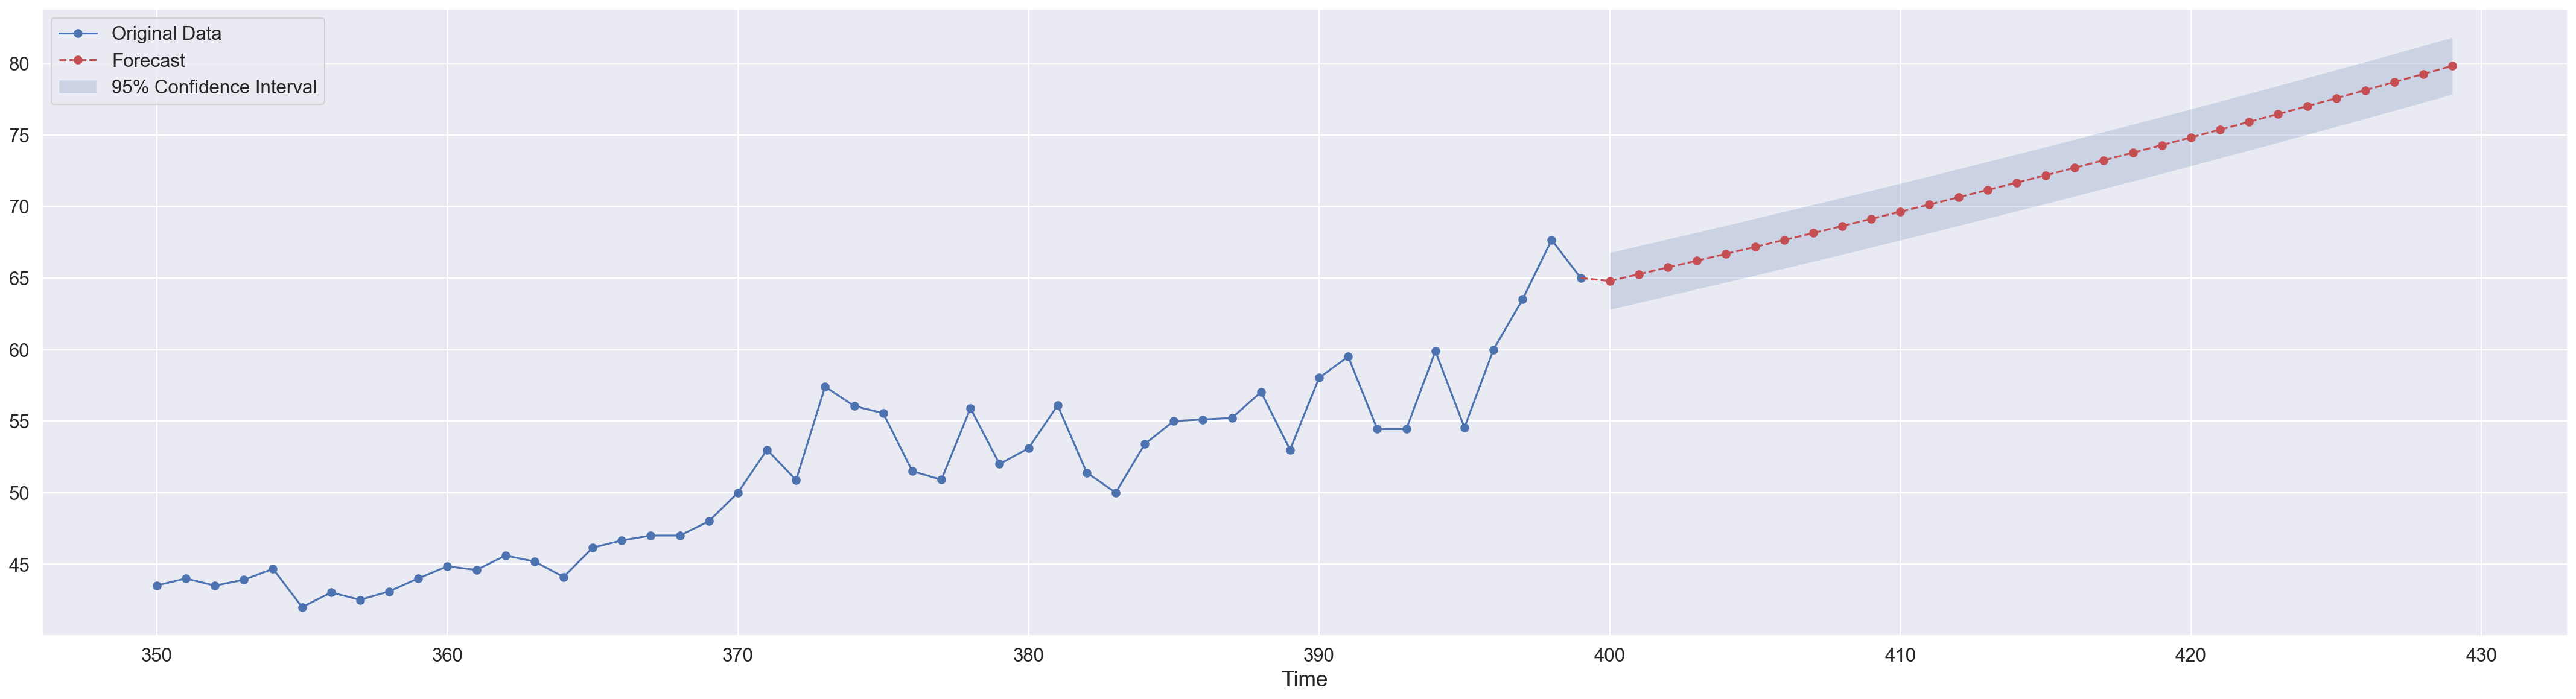

In [50]:
## 4.5 模型的预测
# 预测未来30个数据
last_index = len(data['lowest'],) - 1
forecast_index = np.arange(last_index + 1, last_index + 31)
mod = ExponentialSmoothing(data['lowest'], trend="add", seasonal=None, damped_trend=False)
res = mod.fit()
arima_forecast = res.predict(start=last_index + 1, end=last_index + 30)
arima_mean_forecast = arima_forecast

# 还原数据
mean_forecast = np.exp(arima_mean_forecast)
print(f"未来30个数据的均值预测值：{mean_forecast}")

# 计算置信区间
var_original = np.var(h_t)
var = np.exp(var_original)
lower = [1*(value - 2 * var) for value in mean_forecast]
upper = [1*(value + 2 * var) for value in mean_forecast]
print(f"95%置信区间下区间下限：{lower}")
print(f"95%置信区间下区间上限：{upper}")

# 绘图
plt.figure(figsize=(36, 9), dpi=150)
plt.plot(range(len(data['lowest'],)), df['lowest'], linestyle='-', color='b', marker='o', markerfacecolor='b', label='Original Data')
plt.plot(range(len(data['lowest'],), len(data['lowest'],) + len(mean_forecast)), mean_forecast, linestyle='--', color='r', marker='o', markerfacecolor='r', label='Forecast')
plt.fill_between(range(len(data['lowest'],), len(data['lowest'],) + len(mean_forecast)), lower, upper, alpha=0.2, label='95% Confidence Interval')
last_data_index = len(data['lowest']) - 1
last_pred_index = len(data['lowest'])
plt.plot([last_data_index, last_pred_index], [df['lowest'][last_data_index], mean_forecast[last_pred_index]], linestyle='--', color='r')
plt.xlabel('Time', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig(fname='lowest预测结果.png')

# 局部
original_data_length = len(data['lowest'])
last_50_index = range(original_data_length - 50, original_data_length)
plt.figure(figsize=(36, 9), dpi=150)
plt.plot(last_50_index, [df['lowest'][i] for i in last_50_index], linestyle='-', color='b', marker='o', markerfacecolor='b', label='Original Data')
plt.plot(range(original_data_length, original_data_length + len(mean_forecast)), mean_forecast, linestyle='--', color='r', marker='o', markerfacecolor='r', label='Forecast')
plt.fill_between(range(original_data_length, original_data_length + len(mean_forecast)), lower, upper, alpha=0.2, label='95% Confidence Interval')
last_data_index = len(data['lowest']) - 1
last_pred_index = len(data['lowest'])
plt.plot([last_data_index, last_pred_index], [df['lowest'][last_data_index], mean_forecast[last_pred_index]], linestyle='--', color='r')
plt.xlabel('Time', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig(fname='lowest预测结果放大图.png')

# 4.6 保存结果
lowest_mean_forecast = mean_forecast

### 2.4 最低价价预测<a id="2.4"></a>
#### 2.4.1 模型识别<a id="2.4.1"></a>
##### 相关图判断

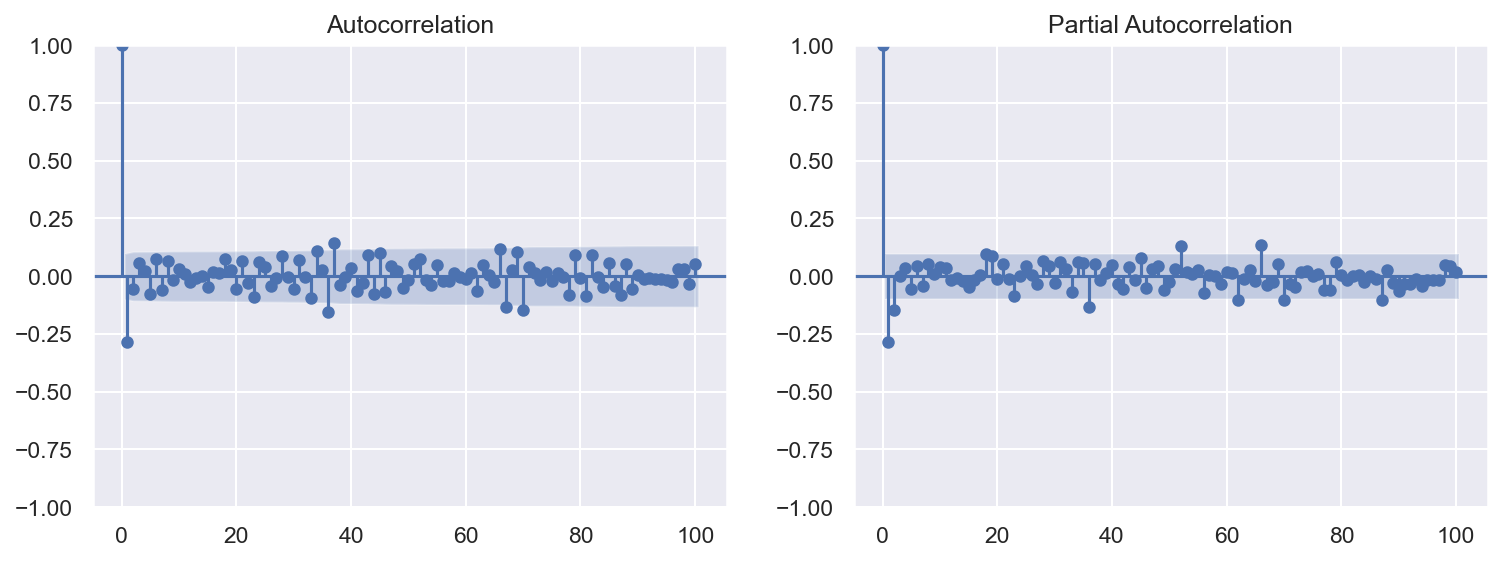

In [51]:
## 5.1.1 相关图
fig = plt.figure(figsize=(12, 4), dpi=150)
ax1 = fig.add_subplot(121)
sm.graphics.tsa.plot_acf(data_diff['highest'], lags=100, ax=ax1)
ax2 = fig.add_subplot(122)
sm.graphics.tsa.plot_pacf(data_diff['highest'], lags=100, ax=ax2)
plt.savefig(fname='highest相关图.png')

__结果表明__：如果建立$ARIMA$模型，认为自相关系数一阶截尾，偏自相关系数脱尾

##### 信息准则AIC判断
$$AIC = 2k - 2Ln(L)$$
其中，$k$是模型中待估计参数的数量，$L$是模型的似然函数值

In [52]:
## 5.2 自动拟合
# ARIMA
series = pd.Series(data['highest'])
model = auto_arima(series, seasonal= False, trace=True)
print(f"自动识别的阶数：(p, d, q) = {model.order}")

# 指数平滑
simple_model = SimpleExpSmoothing(data['highest']).fit()
print("Simple Exponential Smoothing AIC:", simple_model.aic)

holt_model = Holt(data['highest']).fit()
print("Holt's Exponential Smoothing AIC:", holt_model.aic)

exp_smooth_model = ExponentialSmoothing(data['highest'], trend="add", seasonal=None, damped_trend=False).fit()
print("ExponentialSmoothing AIC:", exp_smooth_model.aic)

ets_model = ETSModel(data['highest']).fit(disp=False)
print("ETSModel AIC:", ets_model.aic)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-1872.676, Time=0.28 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1837.573, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1869.652, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1876.675, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1835.958, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1874.752, Time=0.14 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1874.784, Time=0.09 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1872.969, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1869.959, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.829 seconds
自动识别的阶数：(p, d, q) = (0, 1, 1)
Simple Exponential Smoothing AIC: -3010.8791609614204
Holt's Exponential Smoothing AIC: -3003.173547439128
ExponentialSmoothing AIC: -3015.9038961915794
ETSModel AIC: -1873.756123171425


__模型AIC表明__：ARIMA家族模型中，$ARIMA(0,1,1)$建模为最优模型，但是只与环境变量有关，不符合实际，因此选择指数平滑预测

#### 2.4.2 模型拟合<a id="2.4.2"></a>

In [53]:
mod = ExponentialSmoothing(data['highest'], trend="add", seasonal=None, damped_trend=False)
res = mod.fit() 
res.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

#### 2.4.3 均值模型的整体效果检验<a id="2.4.3"></a>
原假设：$$H_0: \rho_1=\rho_2=\cdots=\rho_m=0, \forall m \geq 1$$  
备择假设：$$H_1: \rho_k \neq 0,  \forall m \geq 1, k \leq m$$  
LB统计量：$$LB=n(n+2) \sum_{k=1}^m\left(\frac{\hat{\rho}_k^2}{n-k}\right) \sim \chi^2(m)$$

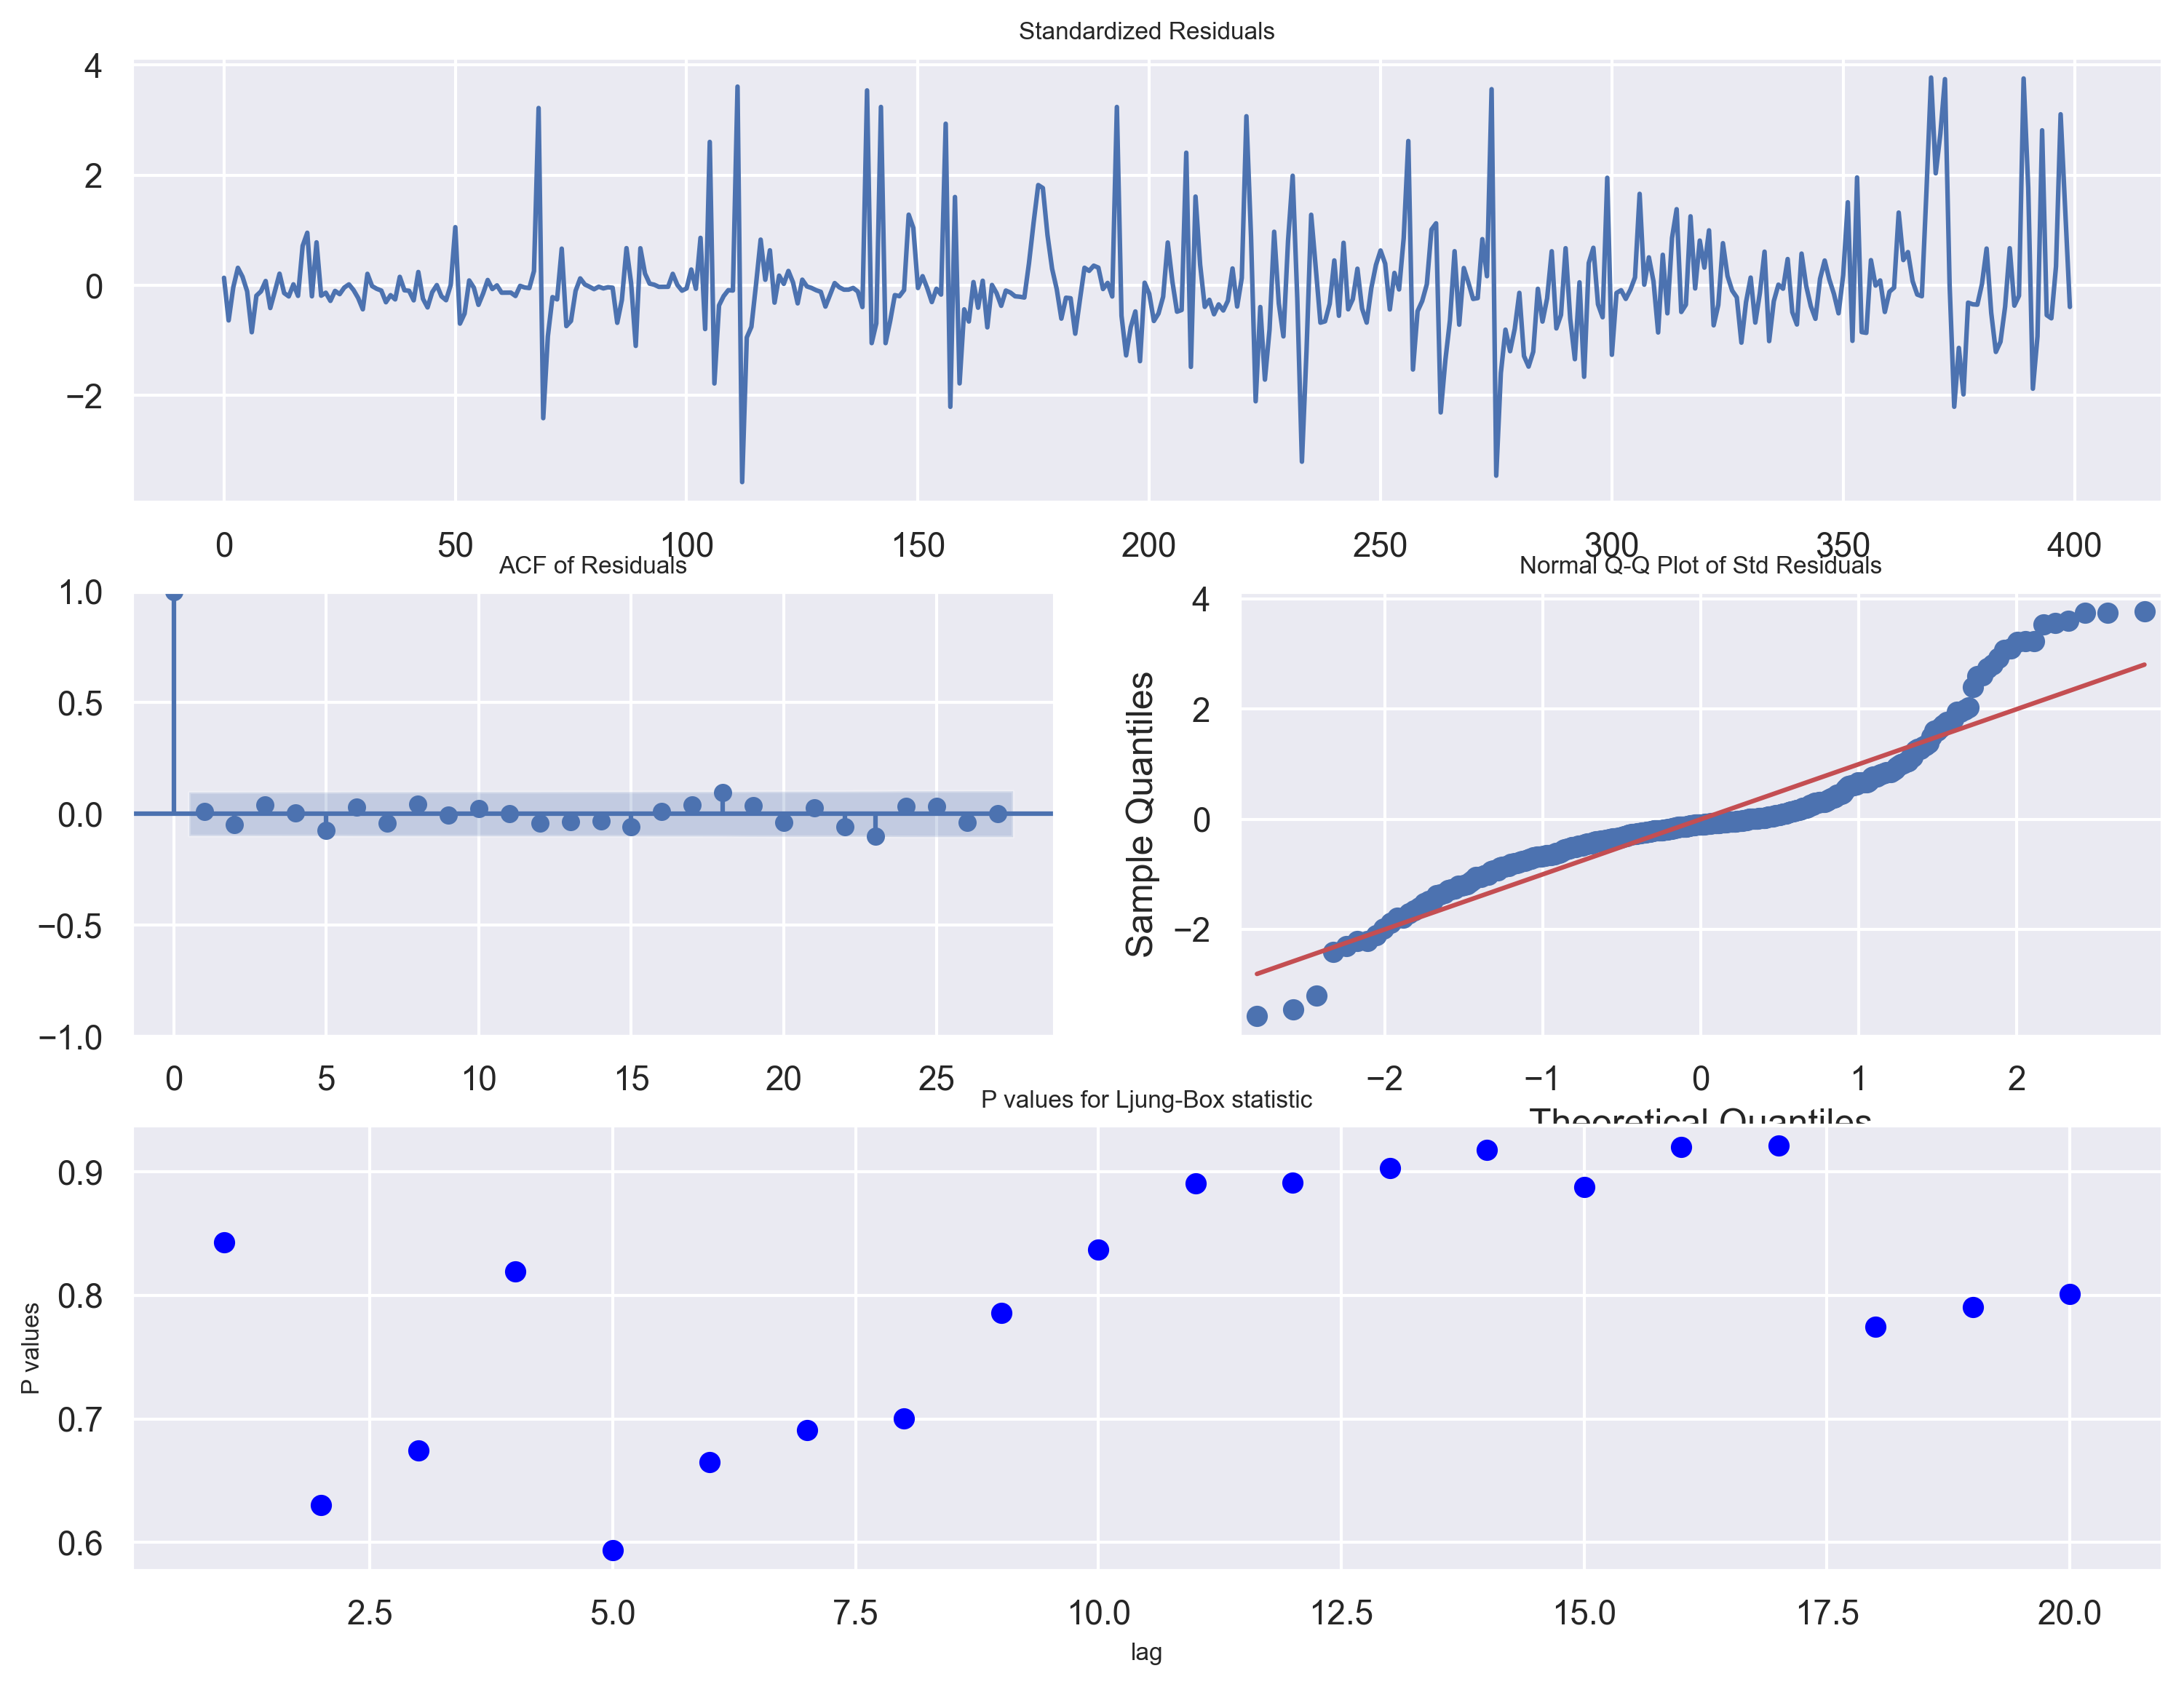

In [54]:
# 计算残差序列
residuals = res.resid

# 检验残差序列为白噪声
LB = acorr_ljungbox(residuals, lags=range(1, 21), boxpierce=True, return_df=True)
LB

resid_sd = (residuals-np.mean(residuals))/np.std(residuals)
fig = plt.figure(figsize=(12,9),dpi=300)  
ax1 = fig.add_subplot(311)  
ax1.plot(resid_sd);plt.title('Standardized Residuals', fontsize=8)  

ax2 = fig.add_subplot(323)  
plot_acf(residuals, ax=ax2)
plt.title('ACF of Residuals', fontsize=8)  

ax3 = fig.add_subplot(324)  
sm.qqplot(resid_sd, fit=True, line="s",ax=ax3)  
plt.title('Normal Q-Q Plot of Std Residuals', fontsize=8)  

lags = np.arange(1,21)
LB_p = LB.lb_pvalue
ax4 = fig.add_subplot(313)  
ax4.scatter(lags,LB_p,color="blue")
plt.xlabel(xlabel="lag", fontsize=8)  
plt.ylabel(ylabel="P values", fontsize=8)  
plt.title('P values for Ljung-Box statistic', fontsize=8)   
plt.savefig(fname='highest整体效果检验.png')

__结果表明__：p值大于0.05，不拒绝原假设，模型残差是白噪声，均值模型整体效果好，但根据残差图判断可能存在异方差性，需要进一步做诊断检验

#### 2.4.4 残差的自相关检验<a id="2.4.4"></a>
##### DW检验
原假设：残差项不存在一阶序列相关
$$ H_0：P = 0$$
备择假设：残差项存在一阶序列相关
$$ H_1：P ≠ 0$$
检验统计量：$$DW=\sum_{t = 2}^{n}\frac{(e_{t}-e_{t - 1})^{2}}{\sum_{t = 2}^{n}e_{t}^{2}}$$
判断$$DW < d_l：拒绝H0，存在正相关性$$
$$d_l < DW < d_u：无法做出确切判断$$
$$d_u < DW < 4 - d_u：接受H0，不存在自相关性$$
$$4 - d_u < DW < 4 - d_l：无法做出确切判断$$
$$DW > 4 - d_l：拒绝H0，存在负相关性$$
其中$d_l$为DW检验统计量的下临界值，$d_u$为DW检验统计量的上临界值。

In [55]:
# DW检验
dw_stat = durbin_watson(residuals)
print("DW统计量:", dw_stat)
if dw_stat < 1:
    print("DW检验下可能存在正自相关")
elif dw_stat > 3:
    print("DW检验下可能存在负自相关")
else:
    print("DW检验无法判断")

DW统计量: 1.9743964570462158
DW检验无法判断


##### Durbin h检验
检验统计量$$Dh=DW\frac{n}{1-n\sigma^2_\beta}$$

In [56]:
# Durbin-h检验
# 首先获取滞后因变量系数估计量的方差
n = len(residuals)
var_beta_1 = np.var(residuals)
h = dw_stat * (n / (1 - n * var_beta_1))
print("Dh统计量:", h)
z_alpha_2 = 1.96
if np.abs(h) > z_alpha_2:
    print("Dh检验下拒绝原假设，残差存在自相关性")
else:
    print("Dh检验下不拒绝原假设，残差不存在自相关性")

Dh统计量: 996.953709085236
Dh检验下拒绝原假设，残差存在自相关性


#### 2.4.5 Auto-Regressive模型<a id="2.4.5"></a>

In [57]:
# 残差自相关性的解决 Auto-Regressive
rsd = pd.Series(residuals)
res = AutoReg(rsd, lags=4, trend='n').fit()
res.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

__参数估计检验__：从1阶升到4阶，所有参数p值大于0.05，参数估计检验未通过，无法建模

#### 2.4.6 残差的异方差性检验<a id="2.4.6"></a>
##### Portmanteau Q检验
原假设
$$H_0:\rho_1 = \rho_2 = \cdots = \rho_q = 0$$
备择假设
$$H_1:\rho_1,\rho_2,\cdots,\rho_q不全为0$$
检验统计量
$$ Q(q) = n(n+2)\sum_{i=1}^{q}\frac{\rho^2_i}{n-i} \sim \chi^2(q-1)$$

In [72]:
# Portmanteau Q检验
vt = res.resid
Q = acorr_ljungbox(vt**2, lags=[1,2,3,4,5,8,10], boxpierce = True, return_df = True )
Q
# p值小于0.05拒绝原假设，存在异方差性

lb_stat     lb_pvalue    bp_stat     bp_pvalue
1   28.885970  7.676694e-08  28.670403  8.580514e-08
2   36.088599  1.457003e-08  35.801364  1.682025e-08
3   39.794755  1.177770e-08  39.461424  1.385804e-08
4   40.638094  3.193875e-08  40.292175  3.766131e-08
5   40.887260  9.887907e-08  40.537003  1.163658e-07
8   41.403925  1.751619e-06  41.042009  2.047236e-06
10  43.626950  3.840292e-06  43.201938  4.576137e-06

__结果表明__：p值小于0.05，拒绝原假设，在Q检验下，认为残差存在异方差性

##### 拉格朗日乘子(LM)检验
原假设
$$H_0:\rho_1 = \rho_2 = \cdots = \rho_q = 0$$
备择假设
$$H_1:\rho_1,\rho_2,\cdots,\rho_q不全为0$$
检验统计量
$$LM(q)=W^TW，W=(\frac{\rho^2_1}{\hat{\sigma}^2},\frac{\rho^2_2}{\hat{\sigma}^2},\cdots,\frac{\rho^2_q}{\hat{\sigma}^2})$$

In [73]:
# LM检验
for n in [1,2,3,4,5,8,10]:
    alm = acorr_lm(vt, nlags = n)[0:2]
    print(alm)
# （T值，p值）p值小于0.05拒绝原假设，存在异方差性

(0.03887667677964801, 0.843693180967704)
(0.9212141119129855, 0.6309005373055077)
(1.552498970419889, 0.670207658066603)
(1.5289579668747284, 0.8214998450278348)
(3.495275273474066, 0.6241026594515117)
(6.028567763241863, 0.6440317383110514)
(6.333477397431645, 0.7865111225142047)


__结果表明__：p值小于0.05，拒绝原假设，在LM检验下，认为残差存在异方差性

#### 2.4.7 异方差模型的选择<a id="2.4.7"></a>
以信息准则AIC为标准选择模型

In [74]:
## 5.4.3 模型选择
# EGARCH
vt_model = arch_model(vt, mean='Zero', vol='EGARCH',p=1 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='EGARCH',p=2 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='EGARCH',p=1 ,q=2).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='EGARCH',p=2 ,q=2).fit(disp="off")  
print(vt_model.aic)

# # APARCH（不收敛）
# vt_model = arch_model(vt, mean='Zero', vol='APARCH',p=1 ,q=1).fit(disp="off")  
# print(vt_model.aic)

# vt_model = arch_model(vt, mean='Zero', vol='APARCH',p=2 ,q=1).fit(disp="off")  
# print(vt_model.aic)

# vt_model = arch_model(vt, mean='Zero', vol='APARCH',p=1 ,q=2).fit(disp="off")  
# print(vt_model.aic)

# vt_model = arch_model(vt, mean='Zero', vol='APARCH',p=2 ,q=2).fit(disp="off")  
# print(vt_model.aic)

# ARCH
vt_model = arch_model(vt, mean='Zero', vol='ARCH',p=1 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='ARCH',p=2 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='ARCH',p=1 ,q=2).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='ARCH',p=2 ,q=2).fit(disp="off")  
print(vt_model.aic)

# FIGARCH
vt_model = arch_model(vt, mean='Zero', vol='FIGARCH',p=1 ,q=1).fit(disp="off")  
print(vt_model.aic)

# GARCH
vt_model = arch_model(vt, mean='Zero', vol='GARCH',p=1 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='GARCH',p=2 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='GARCH',p=1 ,q=2).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='GARCH',p=2 ,q=2).fit(disp="off")  
print(vt_model.aic)

# HARCH
vt_model = arch_model(vt, mean='Zero', vol='HARCH',p=1 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='HARCH',p=2 ,q=1).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='HARCH',p=1 ,q=2).fit(disp="off")  
print(vt_model.aic)

vt_model = arch_model(vt, mean='Zero', vol='HARCH',p=2 ,q=2).fit(disp="off")  
print(vt_model.aic)

-1937.0604903205299
-2001.1154901155926
-1935.060498888518
2359.172553746839
-1929.209797070194
-1937.2473005815
-1929.209797070194
-1937.2473005815
-1945.2846978956377
-1937.1570745124766
-1927.9620971309803
-1932.3837523311952
-1926.0880621603128
-1243.0683825065607
-1465.0153947413623
-1243.0683825065607
-1465.0153947413623


__结果表明__：$EGARCH(2,2)$模型的AIC最小，选择该模型

#### 2.4.8 EGARCH模型<a id="2.4.8"></a>

In [75]:
## 5.4.4 残差异方差性的解决 EGARCH 模型
vt_model = arch_model(vt, mean='Zero', vol='EGARCH',p=2 ,q=1).fit(disp="off")  
vt_model.summary().tables[1]

<class 'statsmodels.iolib.table.SimpleTable'>

__参数估计检验__：p值小于0.05，参数估计检验通过，可以建立残差$EGARCH(2,1)$模型

#### 2.4.9 残差模型的整体效果检验<a id="2.4.9"></a>
##### LB检验
原假设：$$H_0: \rho_1=\rho_2=\cdots=\rho_m=0, \forall m \geq 1$$  
备择假设：$$H_1: \rho_k \neq 0,  \forall m \geq 1, k \leq m$$  
LB统计量：$$LB=n(n+2) \sum_{k=1}^m\left(\frac{\hat{\rho}_k^2}{n-k}\right) \sim \chi^2(m)$$

In [76]:
## 4.4.5 残差模型整体效果检验纯随机检验
h_t = vt_model.conditional_volatility  
e_t = vt/(np.sqrt(h_t))  
LB = acorr_ljungbox(e_t, lags=[250,260,270,280,290,300], boxpierce=True, return_df=True)  
LB

lb_stat  lb_pvalue     bp_stat  bp_pvalue
250  289.133861   0.044964  199.124014   0.992253
260  297.301931   0.055644  202.112770   0.996796
270  301.655309   0.089996  203.557326   0.999049
280  308.696102   0.114786  205.704680   0.999711
290  314.345276   0.155912  207.321169   0.999927
300  316.371828   0.247085  207.842056   0.999987

__结果表明__：p值大于0.05，接受原假设，在LB检验下，认为残差为白噪声，模型的整体效果较好

因此最终均值模型为：__指数平滑__  
水平成分：$$l_t = 0.6433443X_t + 0.3566557(l_{t-1}+b_{t-1})$$
趋势成分：$$b_t = 0.0199126(l_t-l_{t-1}) + 0.9800874b_{t-1}$$
残差：$$e_t = y_t - \hat{y_t}$$
残差模型是：$EGARCH(2,1)$
$$\begin{cases}
v_t = \sqrt{h_t}e_t  \\ 
ln(h_t) = -0.0616 +0.4794(\vert e_{t-1} \vert - \sqrt{\frac{2}{\pi}} ) -0.5317(\vert e_{t-2} \vert - \sqrt{\frac{2}{\pi}} )+ 0.9927ln(h_{t-1})
\end{cases}$$

#### 2.4.10 模型的预测<a id="2.4.10"></a>
预测未来30个数据

未来30个数据的均值预测值：400    70.656534
401    71.121744
402    71.590016
403    72.061372
404    72.535832
405    73.013415
406    73.494143
407    73.978035
408    74.465114
409    74.955400
410    75.448914
411    75.945677
412    76.445711
413    76.949038
414    77.455678
415    77.965654
416    78.478988
417    78.995701
418    79.515817
419    80.039357
420    80.566344
421    81.096801
422    81.630751
423    82.168216
424    82.709220
425    83.253785
426    83.801937
427    84.353697
428    84.909090
429    85.468141
dtype: float64
95%置信区间下区间下限：[68.6564048308121, 69.12161458446727, 69.58988732611378, 70.06124322277374, 70.53570257425112, 71.01328581400581, 71.49401351003364, 71.97790636575228, 72.4649852208926, 72.95527105239655, 73.44878497532035, 73.94554824374389, 74.4455822516859, 74.94890853402573, 75.4555487674304, 75.96552477128836, 76.47885850864914, 76.99557208716905, 77.51568776006361, 78.0392279270657, 78.5662151353903, 79.09667208070559, 79.63062160811015, 80.1680867131171

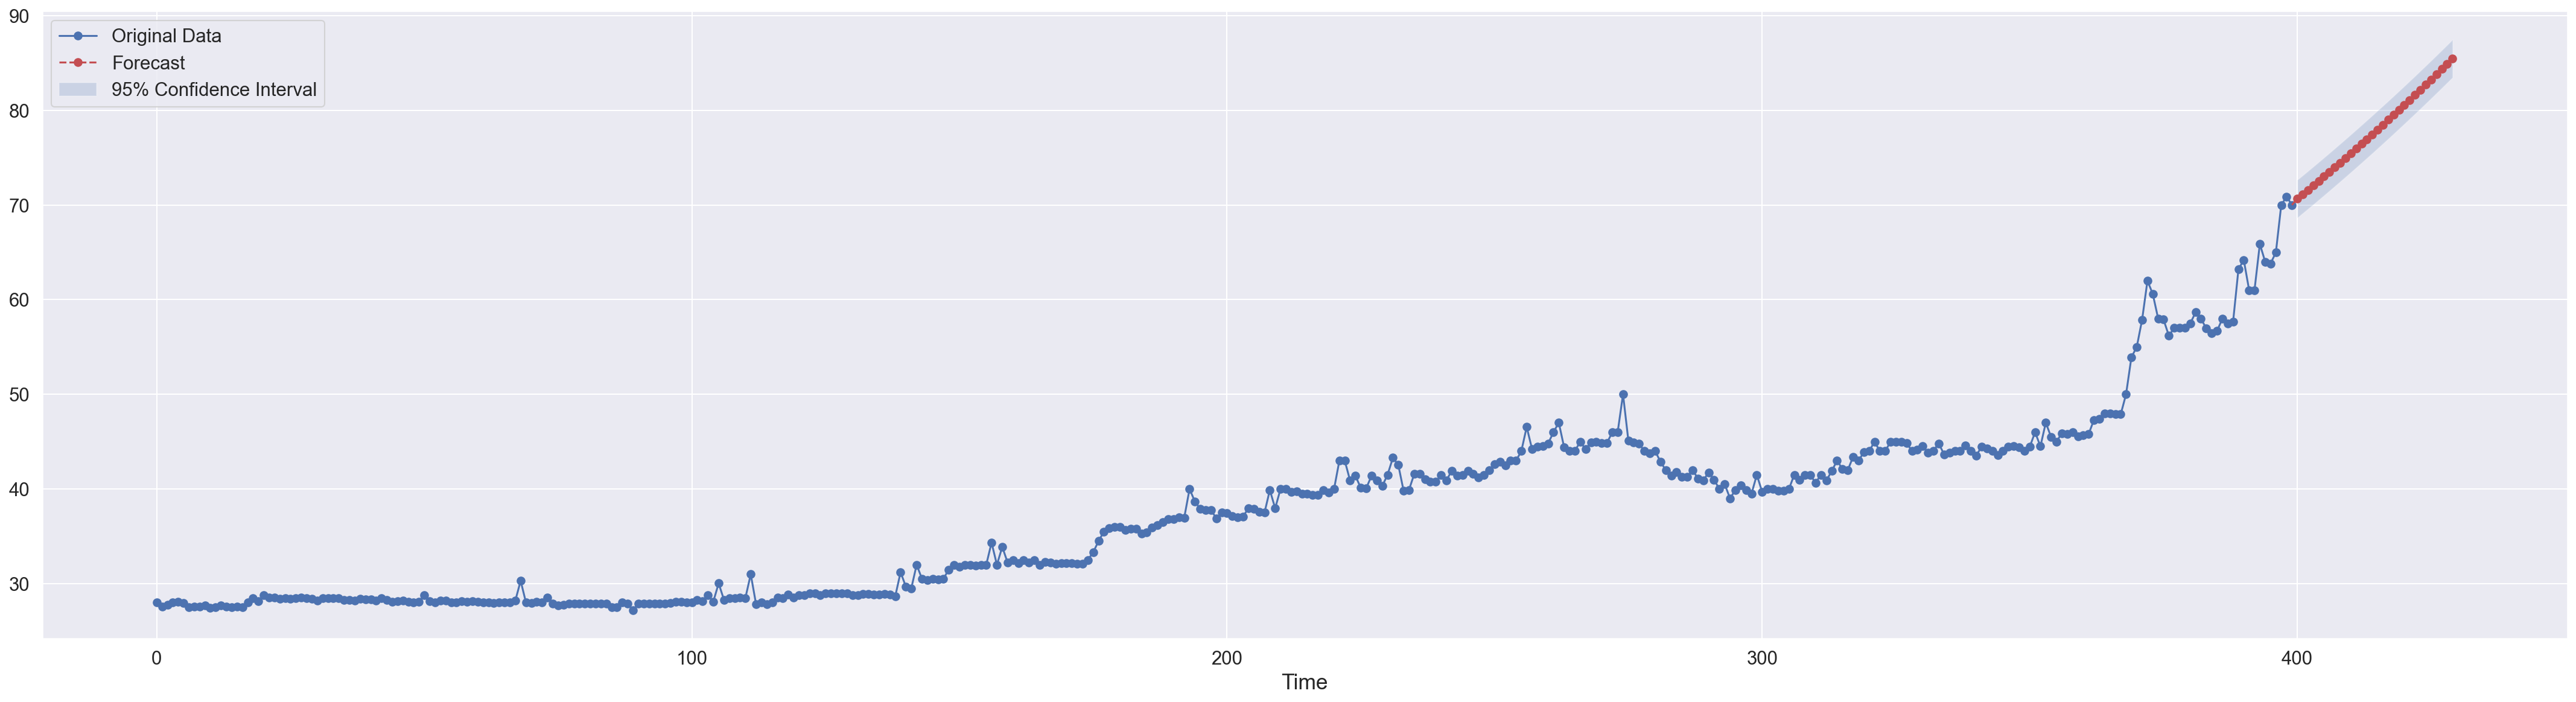

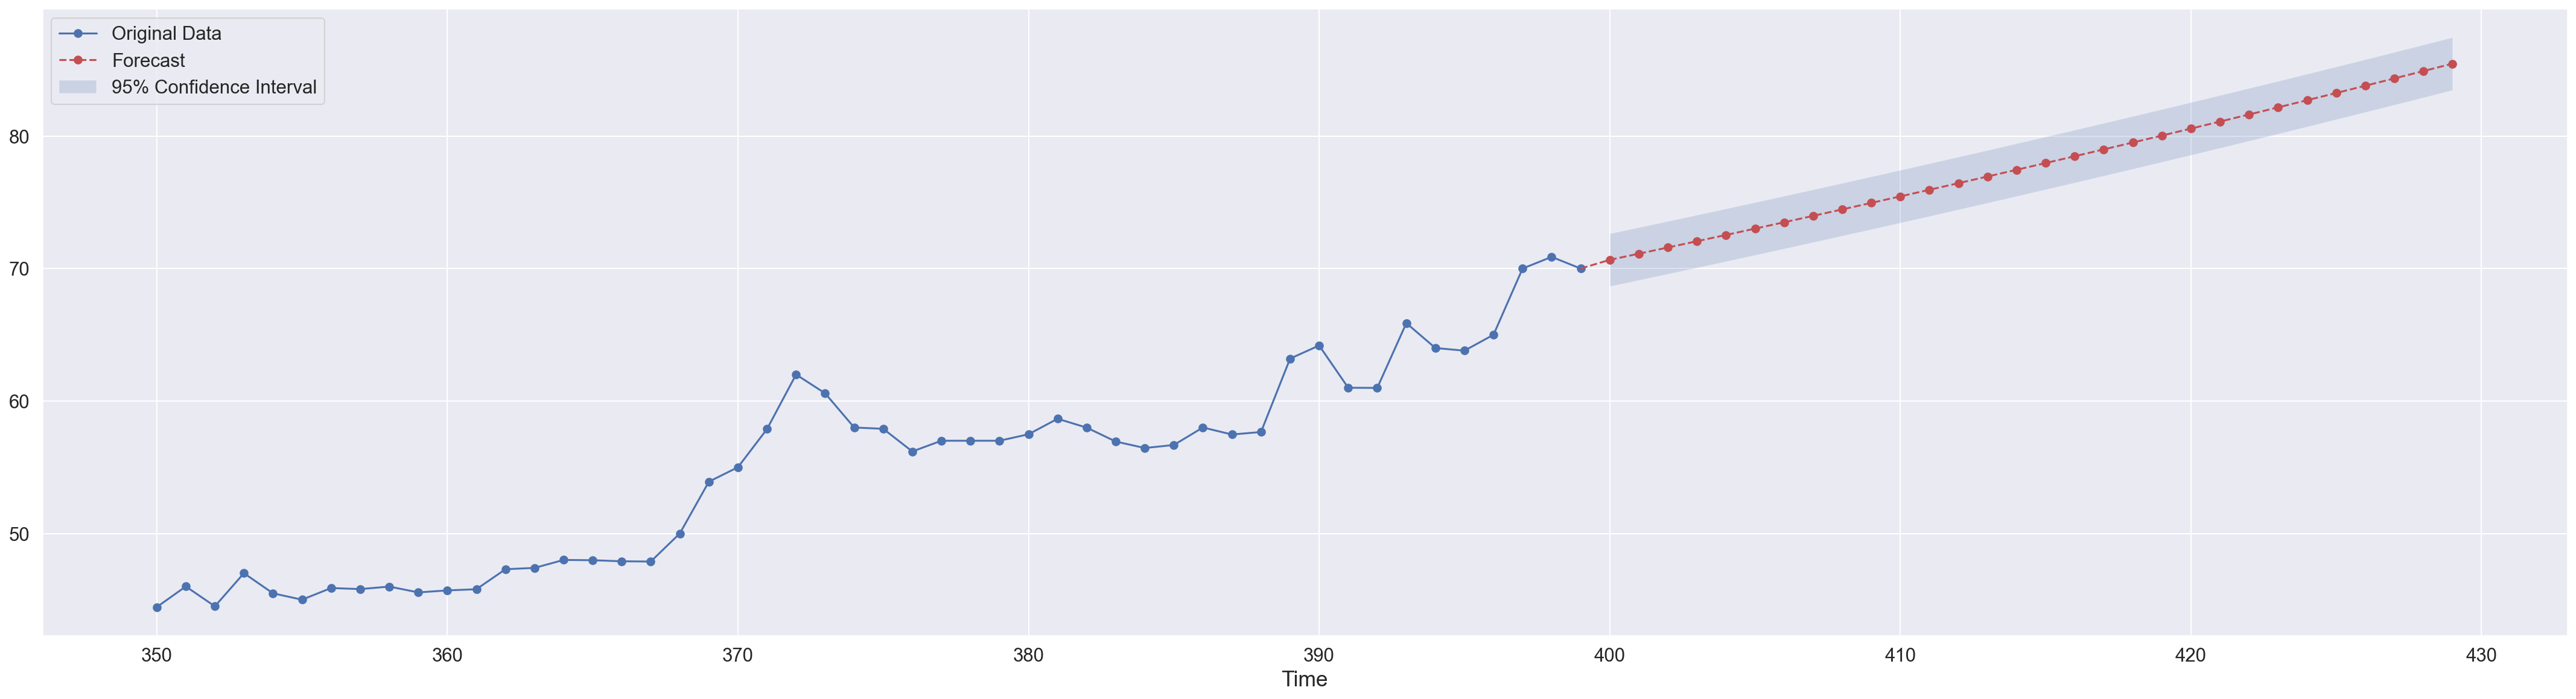

In [77]:
## 5.5 模型的预测
# 预测未来30个数据
last_index = len(data['highest'],) - 1
forecast_index = np.arange(last_index + 1, last_index + 31)
mod = ExponentialSmoothing(data['highest'], trend="add", seasonal=None, damped_trend=False)
res = mod.fit()
arima_forecast = res.predict(start=last_index + 1, end=last_index + 30)
arima_mean_forecast = arima_forecast

# 还原数据
mean_forecast = np.exp(arima_mean_forecast)
print(f"未来30个数据的均值预测值：{mean_forecast}")

# 计算置信区间
var_original = np.var(h_t)
var = np.exp(var_original)
lower = [1*(value - 2 * var) for value in mean_forecast]
upper = [1*(value + 2 * var) for value in mean_forecast]
print(f"95%置信区间下区间下限：{lower}")
print(f"95%置信区间下区间上限：{upper}")

# 绘图
plt.figure(figsize=(36, 9), dpi=150)
plt.plot(range(len(data['highest'],)), df['highest'], linestyle='-', color='b', marker='o', markerfacecolor='b', label='Original Data')
plt.plot(range(len(data['highest'],), len(data['highest'],) + len(mean_forecast)), mean_forecast, linestyle='--', color='r', marker='o', markerfacecolor='r', label='Forecast')
plt.fill_between(range(len(data['highest'],), len(data['highest'],) + len(mean_forecast)), lower, upper, alpha=0.2, label='95% Confidence Interval')
last_data_index = len(data['highest']) - 1
last_pred_index = len(data['highest'])
plt.plot([last_data_index, last_pred_index], [df['highest'][last_data_index], mean_forecast[last_pred_index]], linestyle='--', color='r')
plt.xlabel('Time', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig(fname='highest预测结果.png')

# 局部
original_data_length = len(data['highest'])
last_50_index = range(original_data_length - 50, original_data_length)
plt.figure(figsize=(36, 9), dpi=150)
plt.plot(last_50_index, [df['highest'][i] for i in last_50_index], linestyle='-', color='b', marker='o', markerfacecolor='b', label='Original Data')
plt.plot(range(original_data_length, original_data_length + len(mean_forecast)), mean_forecast, linestyle='--', color='r', marker='o', markerfacecolor='r', label='Forecast')
plt.fill_between(range(original_data_length, original_data_length + len(mean_forecast)), lower, upper, alpha=0.2, label='95% Confidence Interval')
last_data_index = len(data['highest']) - 1
last_pred_index = len(data['highest'])
plt.plot([last_data_index, last_pred_index], [df['highest'][last_data_index], mean_forecast[last_pred_index]], linestyle='--', color='r')
plt.xlabel('Time', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig(fname='highest预测结果放大图.png')

# 5.6 保存结果
highest_mean_forecast = mean_forecast

##### 保存全部预测数据

In [78]:
## 6 保存全部数据
data_dict = {
    "open_mean_forecast": open_mean_forecast,
    "close_mean_forecast": close_mean_forecast,
    "lowest_mean_forecast": lowest_mean_forecast,
    "highest_mean_forecast": highest_mean_forecast
}

new_df = pd.DataFrame(data_dict)

### 2.5 K线预测结果<a id="2.5"></a>

In [79]:
df_part_1 = df.iloc[-50:]

df_forecast = new_df

df_part_2 = df_forecast.head(23)
df_part_2 = df_part_2.rename(columns={
    'open_mean_forecast': 'open',
    'close_mean_forecast': 'close',
    'lowest_mean_forecast': 'lowest',
    'highest_mean_forecast': 'highest'
})

df_predict = pd.concat([df_part_1, df_part_2], axis=0, ignore_index=True)

start_date = pd.to_datetime('2021-11-17')
new_index = pd.date_range(start=start_date, periods=len(df_predict), freq='D')
df_predict.index = new_index

df_predict

# K线图
kline_data = df_predict[['open', 'close', 'lowest', 'highest']].values.tolist()

c = (
    Kline(init_opts=opts.InitOpts(width="1600px", height="720px"))
   .add_xaxis(df_predict.index.strftime('%Y-%m-%d').tolist())
   .add_yaxis("", kline_data)
   .set_global_opts(
        yaxis_opts=opts.AxisOpts(is_scale=True),
        xaxis_opts=opts.AxisOpts(is_scale=True),
        title_opts=opts.TitleOpts(title=""),
    )
   .render("预测数据K线图.html")
)

## 三、多元线性时间序列模型实现K线预测<a id="3"></a>
### 3.1 相关性检验<a id="3.1"></a>
为了防止出现过强的相关性情况，首先计算差分后的平稳非白噪声数据的的相关性
#### 3.1.1 Pearson相关系数检验<a id="3.1.1"></a>
Pearson相关系数计算公式：
$$r = \frac{\sum^n_{i=1}(x_i-\bar x)(y_i - \bar y)}{\sqrt{\sum^n_{i=1}{(x_i-\bar x)}^2}\sqrt{\sum^n_{i=1}{(y_i-\bar y)}^2}}$$

In [80]:
# Pearson相关系数检验
print("Pearson相关系数:")
data_diff.corr(method='pearson')

Pearson相关系数:


open     close    lowest   highest
open     1.000000 -0.197279  0.017701  0.140468
close   -0.197279  1.000000  0.297063  0.250721
lowest   0.017701  0.297063  1.000000 -0.025407
highest  0.140468  0.250721 -0.025407  1.000000

#### 3.1.2 Spearman相关系数检验<a id="3.1.2"></a>
Spearman相关系数计算公式：
$$ \rho = 1 - \frac{6\sum^n_{i=1}{(r_i - s_i)}^2}{n(n^2-1)} $$

In [81]:
# Spearman相关系数检验
print("Spearman相关系数:")
data_diff.corr(method='spearman')

Spearman相关系数:


open     close    lowest   highest
open     1.000000 -0.215511 -0.057082  0.097372
close   -0.215511  1.000000  0.374094  0.263513
lowest  -0.057082  0.374094  1.000000  0.035525
highest  0.097372  0.263513  0.035525  1.000000

__结果表明__：差分后的数据相关性没有出现较强的相关性，可以进一步建模

### 3.2 模型识别<a id="3.2"></a>
以信息准则AIC为标准选择模型的最佳阶数

In [82]:
import itertools
from statsmodels.tsa.statespace.varmax import VARMAX
## 7.2 模型选择
# 最大阶数
max_p = 3
max_q = 3

# 用于存储不同阶数组合下的AIC值
aic_values = {}

for p, q in itertools.product(range(1, max_p + 1), range(1, max_q + 1)):
    try:
        model = VARMAX(data_diff, order=(p, q))
        results = model.fit(disp=False)
        aic_values[(p, q)] = results.aic
        print(f"阶数组合(p={p}, q={q})的AIC值为: {results.aic}") 
    except:
        continue

# 找到使得AIC值最小的阶数组合
best_order = min(aic_values, key=aic_values.get)
print(f"最佳VARMA模型阶数组合: {best_order}")

阶数组合(p=1, q=1)的AIC值为: -13463.04208194777
阶数组合(p=1, q=2)的AIC值为: -13161.738720428844
阶数组合(p=1, q=3)的AIC值为: -13129.738720428231
最佳VARMA模型阶数组合: (1, 1)


### 3.3 模型拟合<a id="3.2"></a>

In [83]:
best_p, best_q = best_order
model = VARMAX(data_diff, order=(best_p, best_q))
res = model.fit(disp=False)
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     Statespace Model Results                                     
==================================================================================================
Dep. Variable:     ['open', 'close', 'lowest', 'highest']   No. Observations:                  399
Model:                                         VARMA(1,1)   Log Likelihood                6777.521
                                              + intercept   AIC                         -13463.042
Date:                                    Thu, 12 Dec 2024   BIC                         -13279.550
Time:                                            13:26:40   HQIC                        -13390.370
Sample:                                                 0                                         
                                                    - 399                                         
Covariance Type:                                      opg                                         
=====================================================================================================
Ljung-Box (L1) (Q):     78.78, 0.05, 1.35, 0.77   Jarque-Bera (JB):   874634.99, 93.43, 17.40, 275.38
Prob(Q):                 0.00, 0.83, 0.24, 0.38   Prob(JB):                    0.00, 0.00, 0.00, 0.00
Heteroskedasticity (H):  1.00, 3.78, 1.22, 2.28   Skew:                     -12.50, 0.06, -0.19, 0.87
Prob(H) (two-sided):     0.99, 0.00, 0.26, 0.00   Kurtosis:                  231.00, 5.37, 3.95, 6.68
                            Results for equation open                            
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept     -1.781e-05   6.57e-05     -0.271      0.786      -0.000       0.000
L1.open       -4.679e-06      0.000     -0.011      0.991      -0.001       0.001
L1.close          1.0000      0.002    554.038      0.000       0.996       1.004
L1.lowest      1.859e-06   6.45e-05      0.029      0.977      -0.000       0.000
L1.highest     2.379e-06      0.000      0.006      0.995      -0.001       0.001
L1.e(open)        1.0000      0.002    502.830      0.000       0.996       1.004
L1.e(close)     3.93e-06      0.002      0.002      0.999      -0.004       0.004
L1.e(lowest)  -1.861e-06      0.000     -0.005      0.996      -0.001       0.001
L1.e(highest) -2.383e-06      0.001     -0.003      0.998      -0.002       0.002
                            Results for equation close                           
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept         0.0025      0.035      0.073      0.942      -0.065       0.070
L1.open           0.0557      0.104      0.534      0.593      -0.149       0.260
L1.close         -0.2137      0.681     -0.314      0.754      -1.548       1.121
L1.lowest         0.0058      0.049      0.118      0.906      -0.091       0.103
L1.highest        0.0649      0.191      0.340      0.734      -0.309       0.439
L1.e(open)        0.9830      0.001    801.794      0.000       0.981       0.985
L1.e(close)      -0.0246      0.686     -0.036      0.971      -1.369       1.320
L1.e(lowest)     -0.0103      0.059     -0.175      0.861      -0.125       0.105
L1.e(highest)     0.0412      0.192      0.214      0.830      -0.335       0.418
                           Results for equation lowest                           
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

__结果表明__  
1、自相关性：对于open变量，Q统计量的值为78.78，对应的p值为 0.00，拒绝原假设，说明open变量的残差存在自相关性；而对于close、lowest和highest变量，其p值分别为0.83、0.24和0.38，均大于0.05，不能拒绝原假设，即这三个变量的残差在一阶滞后下不存在显著的自相关性。  
2、异方差性：对于open变量，p值为0.99，不能拒绝原假设，即open变量的残差不存在异方差性；而close和highest变量的p值为0.00，拒绝原假设，说明这两个变量的残差存在异方差性；lowest变量的p值为0.26，不能拒绝原假设，即该变量残差不存在异方差性。  
__最终模型__ 为：$VARMA(1,1)$
\begin{align*}
\begin{pmatrix}
y_{1t} \\
y_{2t} \\
y_{3t} \\
y_{4t}
\end{pmatrix}&=\begin{pmatrix}
c_1 \\
c_2 \\
c_3 \\
c_4
\end{pmatrix}+\begin{pmatrix}
a_{11}^{(1)} & a_{12}^{(1)} & a_{13}^{(1)} & a_{14}^{(1)} \\
a_{21}^{(1)} & a_{22}^{(1)} & a_{23}^{(1)} & a_{24}^{(1)} \\
a_{31}^{(1)} & a_{32}^{(1)} & a_{33}^{(1)} & a_{34}^{(1)} \\
a_{41}^{(1)} & a_{42}^{(1)} & a_{43}^{(1)} & a_{44}^{(1)}
\end{pmatrix}\begin{pmatrix}
y_{1,t - 1} \\
y_{2,t - 1} \\
y_{3,t - 1} \\
y_{4,t - 1}
\end{pmatrix}+\begin{pmatrix}
b_{11}^{(1)} & b_{12}^{(1)} & b_{13}^{(1)} & b_{14}^{(1)} \\
b_{21}^{(1)} & b_{22}^{(1)} & b_{23}^{(1)} & b_{24}^{(1)} \\
b_{31}^{(1)} & b_{32}^{(1)} & b_{33}^{(1)} & b_{34}^{(1)} \\
b_{41}^{(1)} & b_{42}^{(1)} & b_{43}^{(1)} & b_{44}^{(1)}
\end{pmatrix}\begin{pmatrix}
e_{1,t - 1} \\
e_{2,t - 1} \\
e_{3,t - 1} \\
e_{4,t - 1}
\end{pmatrix}+\begin{pmatrix}
e_{1t} \\
e_{2t} \\
e_{3t} \\
e_{4t}
\end{pmatrix}\\
\end{align*}
具体形式是  
\begin{align*}
\begin{pmatrix}
y_{1t} \\
y_{2t} \\
y_{3t} \\
y_{4t}
\end{pmatrix}&=\begin{pmatrix}
-1.781e-05 \\
0.0025 \\
0.0018 \\
0.0020
\end{pmatrix}+\begin{pmatrix}
-4.679e-06 & 1.0000 & 1.859e-06 & 2.379e-06 \\
0.0557 & -0.2137 & 0.0058 & 0.0649 \\
0.0018 & 0.3357 & -0.4627 & 0.1324 \\
0.1118 & 0.3476 & 0.0056 & -0.3585
\end{pmatrix}\begin{pmatrix}
y_{1,t - 1} \\
y_{2,t - 1} \\
y_{3,t - 1} \\
y_{4,t - 1}
\end{pmatrix}+\begin{pmatrix}
1.0000 & 3.93e-06 & -1.861e-06 & -2.383e-06 \\
0.9830 & -0.0246 & -0.0103 & 0.0412 \\
6.0014 & 0.0982 & -0.1597 & 0.0043 \\
4.8963 & 0.0535 & 0.0195 & -0.0953
\end{pmatrix}\begin{pmatrix}
e_{1,t - 1} \\
e_{2,t - 1} \\
e_{3,t - 1} \\
e_{4,t - 1}
\end{pmatrix}+\begin{pmatrix}
e_{1t} \\
e_{2t} \\
e_{3t} \\
e_{4t}
\end{pmatrix}\\
\end{align*}

### 3.4 模型预测<a id="3.4"></a>
#### 3.4.1 数据还原<a id="3.4.1"></a>
均值与置信区间的差分还原与对数还原

In [84]:
last_index = len(data) - 1
forecast = res.predict(start=last_index + 1, end=last_index + 30)

# 还原数据
# 差分还原-对数还原
open = np.array(forecast['open'])
close = np.array(forecast['close'])
lowest = np.array(forecast['lowest'])
highest = np.array(forecast['highest'])

initial_open = np.log(68.61)
initial_close = np.log(69.15)
initial_lowest = np.log(65.00)
initial_highest = np.log(70.00)

open = np.insert(open, 0, initial_open)[:-1]
close = np.insert(close, 0, initial_close)[:-1]
lowest = np.insert(lowest, 0, initial_lowest)[:-1]
highest = np.insert(highest, 0, initial_highest)[:-1]

open_mean = np.exp(np.cumsum(open))
close_mean = np.exp(np.cumsum(close))
lowest_mean = np.exp(np.cumsum(lowest))
highest_mean = np.exp(np.cumsum(highest))

data_dict = {
    'open': open_mean,
    'close': close_mean,
    'lowest': lowest_mean,
    'highest': highest_mean
}

mean = pd.DataFrame(data_dict)
new_index = range(400, 400 + len(mean))
mean.index = new_index

open_residuals = np.exp(np.cumsum(res.resid['open']))
close_residuals = np.exp(np.cumsum(res.resid['close']))
lowest_residuals = np.exp(np.cumsum(res.resid['lowest']))
highest_residuals = np.exp(np.cumsum(res.resid['highest']))

open_lower = open_mean - 1111.96 * np.std(open_residuals)
open_upper = open_mean + 1111.96 * np.std(open_residuals)
close_lower = close_mean - 11.96 * np.std(close_residuals)
close_upper = close_mean + 11.96 * np.std(close_residuals)
lowest_lower = lowest_mean - 11.96 * np.std(lowest_residuals)
lowest_upper = lowest_mean + 11.96 * np.std(lowest_residuals)
highest_lower = highest_mean - 11.96 * np.std(highest_residuals)
highest_upper = highest_mean + 11.96 * np.std(highest_residuals)

print('均值预测结果：')
mean

均值预测结果：


open      close     lowest    highest
400  68.610000  69.150000  65.000000  70.000000
401  68.618493  69.426468  64.466009  69.868985
402  68.891606  69.530790  64.899448  70.154208
403  68.993895  69.720188  64.914898  70.265880
404  69.180597  69.868333  65.108872  70.448115
405  69.326360  70.036145  65.226450  70.601552
406  69.491632  70.195511  65.377281  70.767441
407  69.648517  70.359205  65.514214  70.928649
408  69.809691  70.521520  65.657579  71.092350
409  69.969492  70.684984  65.798602  71.255534
410  70.130426  70.848489  65.941076  71.419470
411  70.291395  71.012519  66.083362  71.583624
412  70.452879  71.176865  66.226170  71.748222
413  70.614671  71.341618  66.369193  71.913170
414  70.776862  71.506742  66.512566  72.078510
415  70.939414  71.672252  66.656231  72.244225
416  71.102344  71.838144  66.800214  72.410323
417  71.265646  72.004420  66.944504  72.576801
418  71.429324  72.171081  67.089108  72.743663
419  71.593378  72.338128  67.234023  72.910909
420  71.757808  72.505561  67.379252  73.078539
421  71.922616  72.673382  67.524794  73.246554
422  72.087803  72.841591  67.670651  73.414956
423  72.253369  73.010190  67.816823  73.583745
424  72.419316  73.179179  67.963310  73.752922
425  72.585643  73.348559  68.110114  73.922487
426  72.752353  73.518331  68.257235  74.092443
427  72.919445  73.688496  68.404674  74.262790
428  73.086921  73.859055  68.552431  74.433528
429  73.254782  74.030009  68.700507  74.604658

#### 3.4.2 开盘价预测结果<a id="3.4.2"></a>

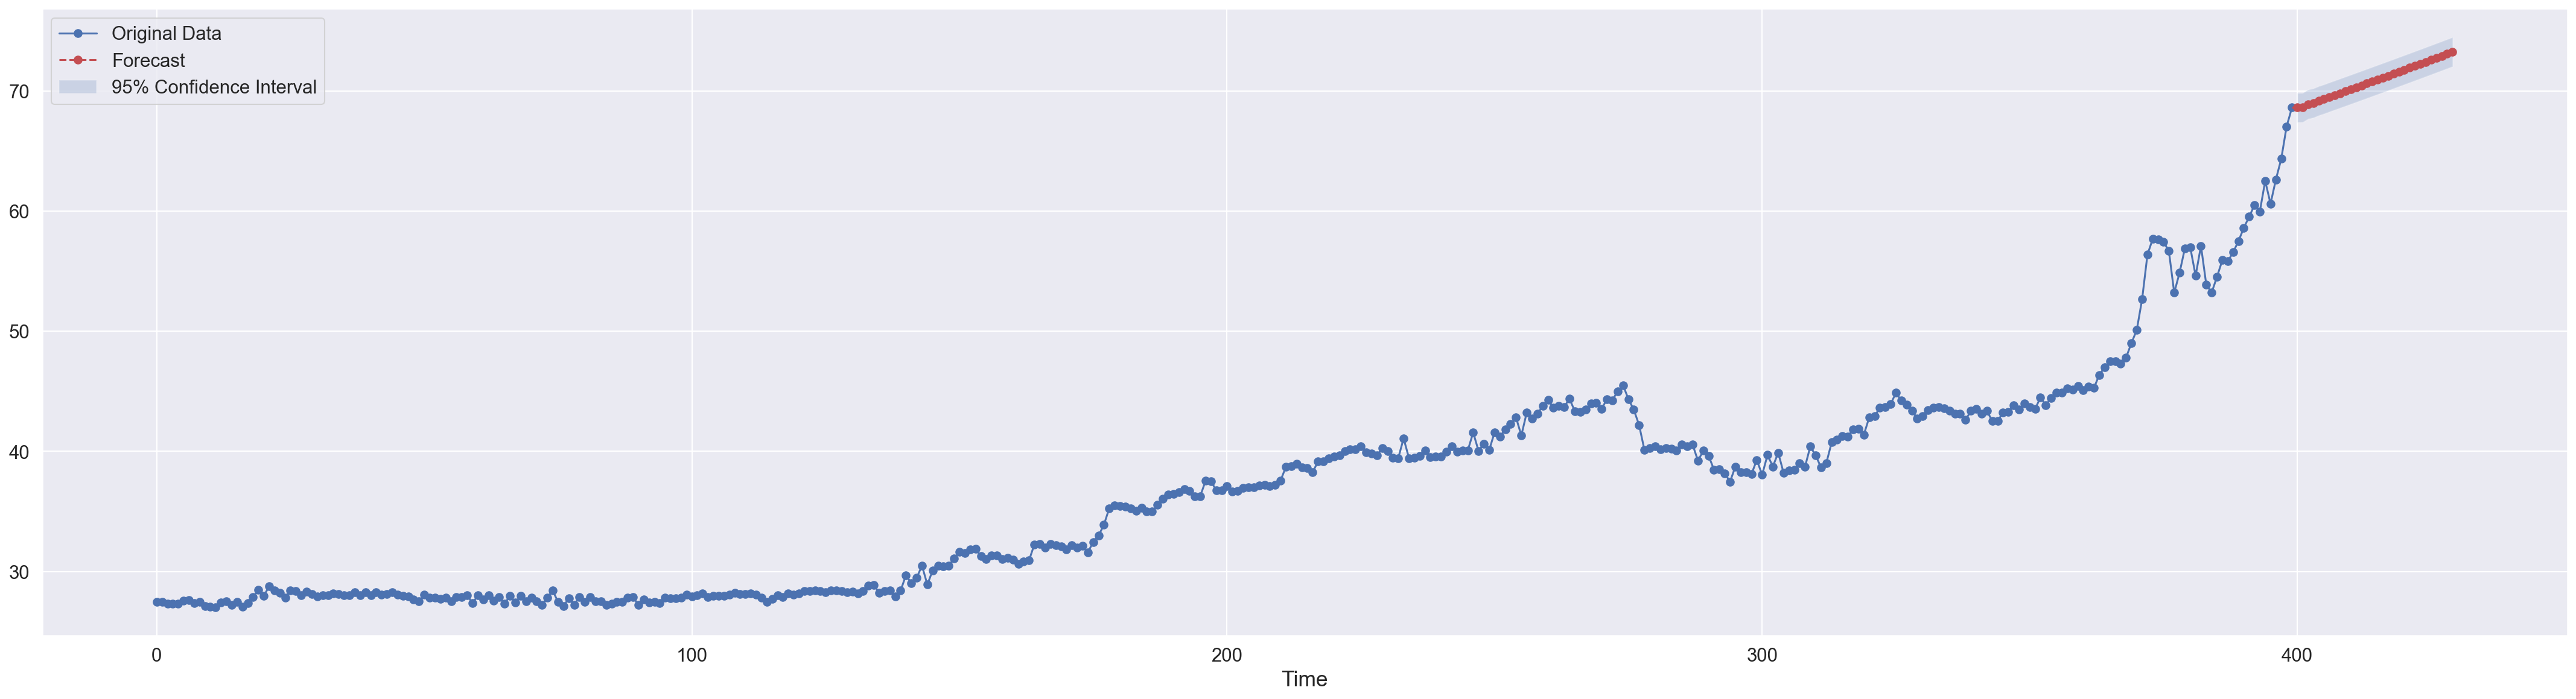

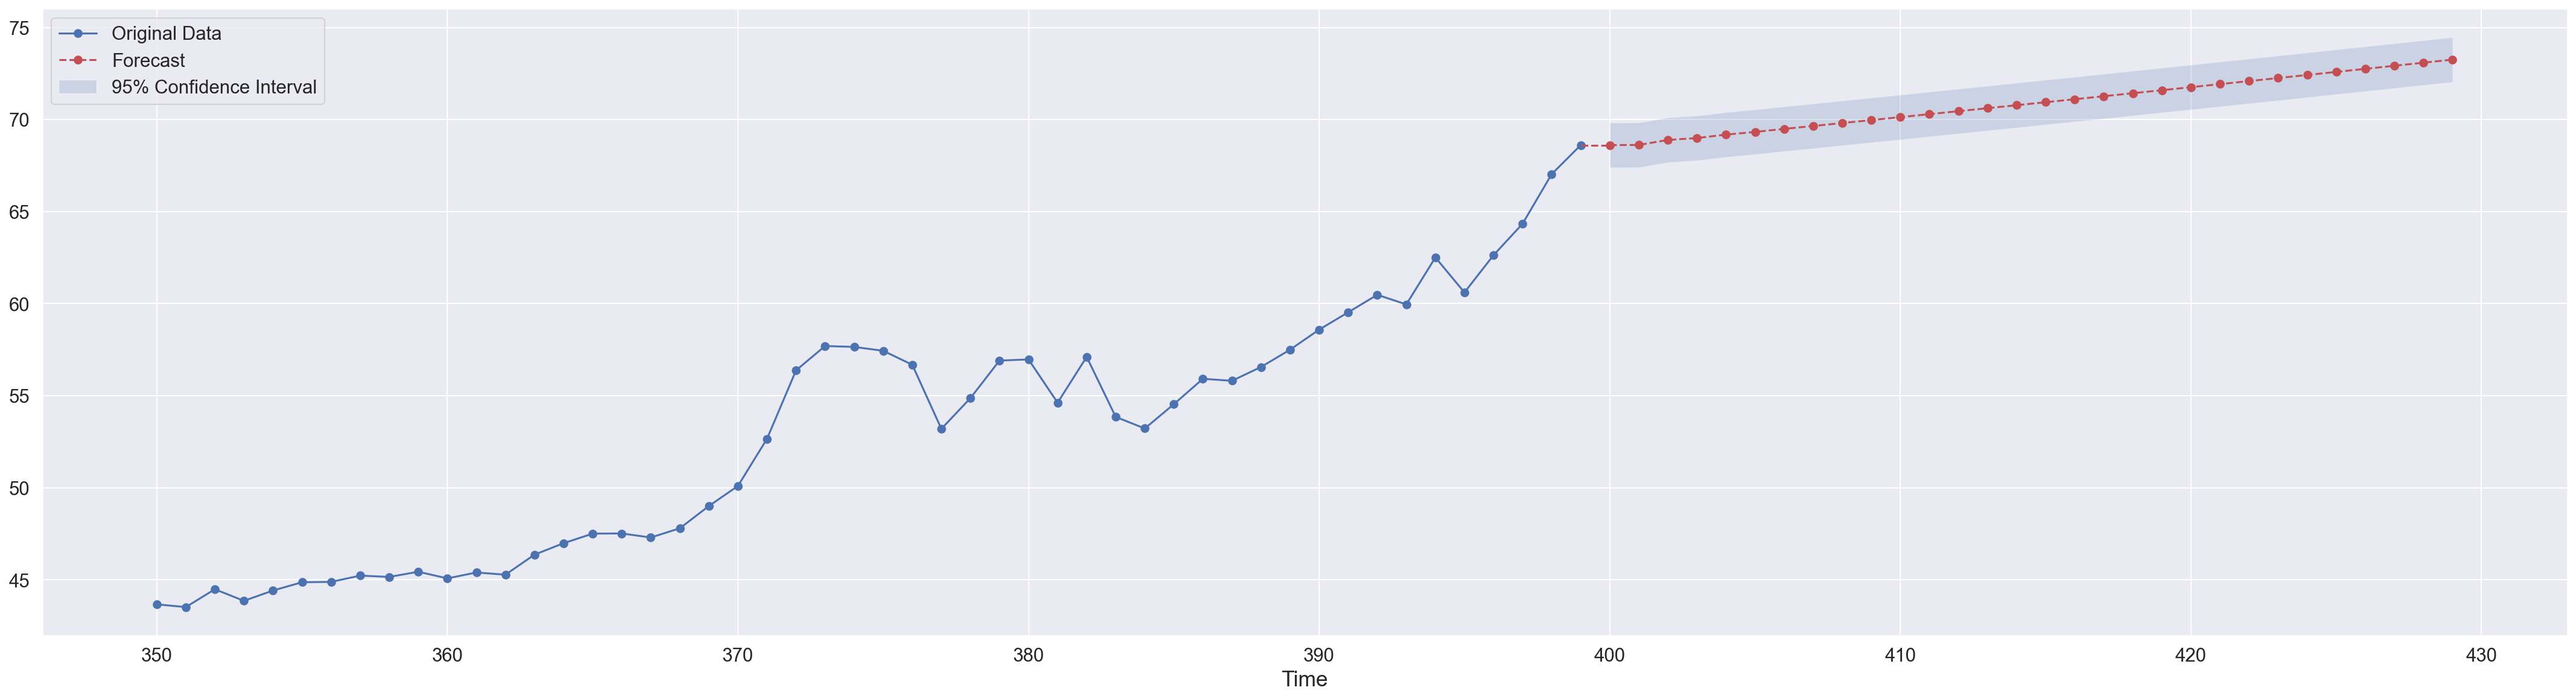

In [85]:
## open
# 绘图
plt.figure(figsize=(36, 9), dpi=150)
plt.plot(range(len(df['open'],)), df['open'], linestyle='-', color='b', marker='o', markerfacecolor='b', label='Original Data')
plt.plot(range(len(df['open'],), len(df['open'],) + len(mean['open'])), mean['open'], linestyle='--', color='r', marker='o', markerfacecolor='r', label='Forecast')
plt.fill_between(range(len(data['open'],), len(data['open'],) + len(mean['open'])), open_lower, open_upper, alpha=0.2, label='95% Confidence Interval')
last_data_index = len(data['open']) - 1
last_pred_index = len(data['open'])
plt.plot([last_data_index, last_pred_index], [df['open'][last_data_index], mean['open'][last_pred_index]], linestyle='--', color='r')
plt.xlabel('Time', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig(fname='多组open预测结果.png')

# 局部
original_data_length = len(data['open'])
last_50_index = range(original_data_length - 50, original_data_length)
plt.figure(figsize=(36, 9), dpi=150)
plt.plot(last_50_index, [df['open'][i] for i in last_50_index], linestyle='-', color='b', marker='o', markerfacecolor='b', label='Original Data')
plt.plot(range(original_data_length, original_data_length + len(mean['open'])), mean['open'], linestyle='--', color='r', marker='o', markerfacecolor='r', label='Forecast')
plt.fill_between(range(original_data_length, original_data_length + len(mean['open'])), open_lower, open_upper, alpha=0.2, label='95% Confidence Interval')
last_data_index = len(data['open']) - 1
last_pred_index = len(data['open'])
plt.plot([last_data_index, last_pred_index], [df['open'][last_data_index], mean['open'][last_pred_index]], linestyle='--', color='r')
plt.xlabel('Time', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig(fname='多组open预测结果放大图.png')

#### 3.4.3 收盘价预测结果<a id="3.4.3"></a>

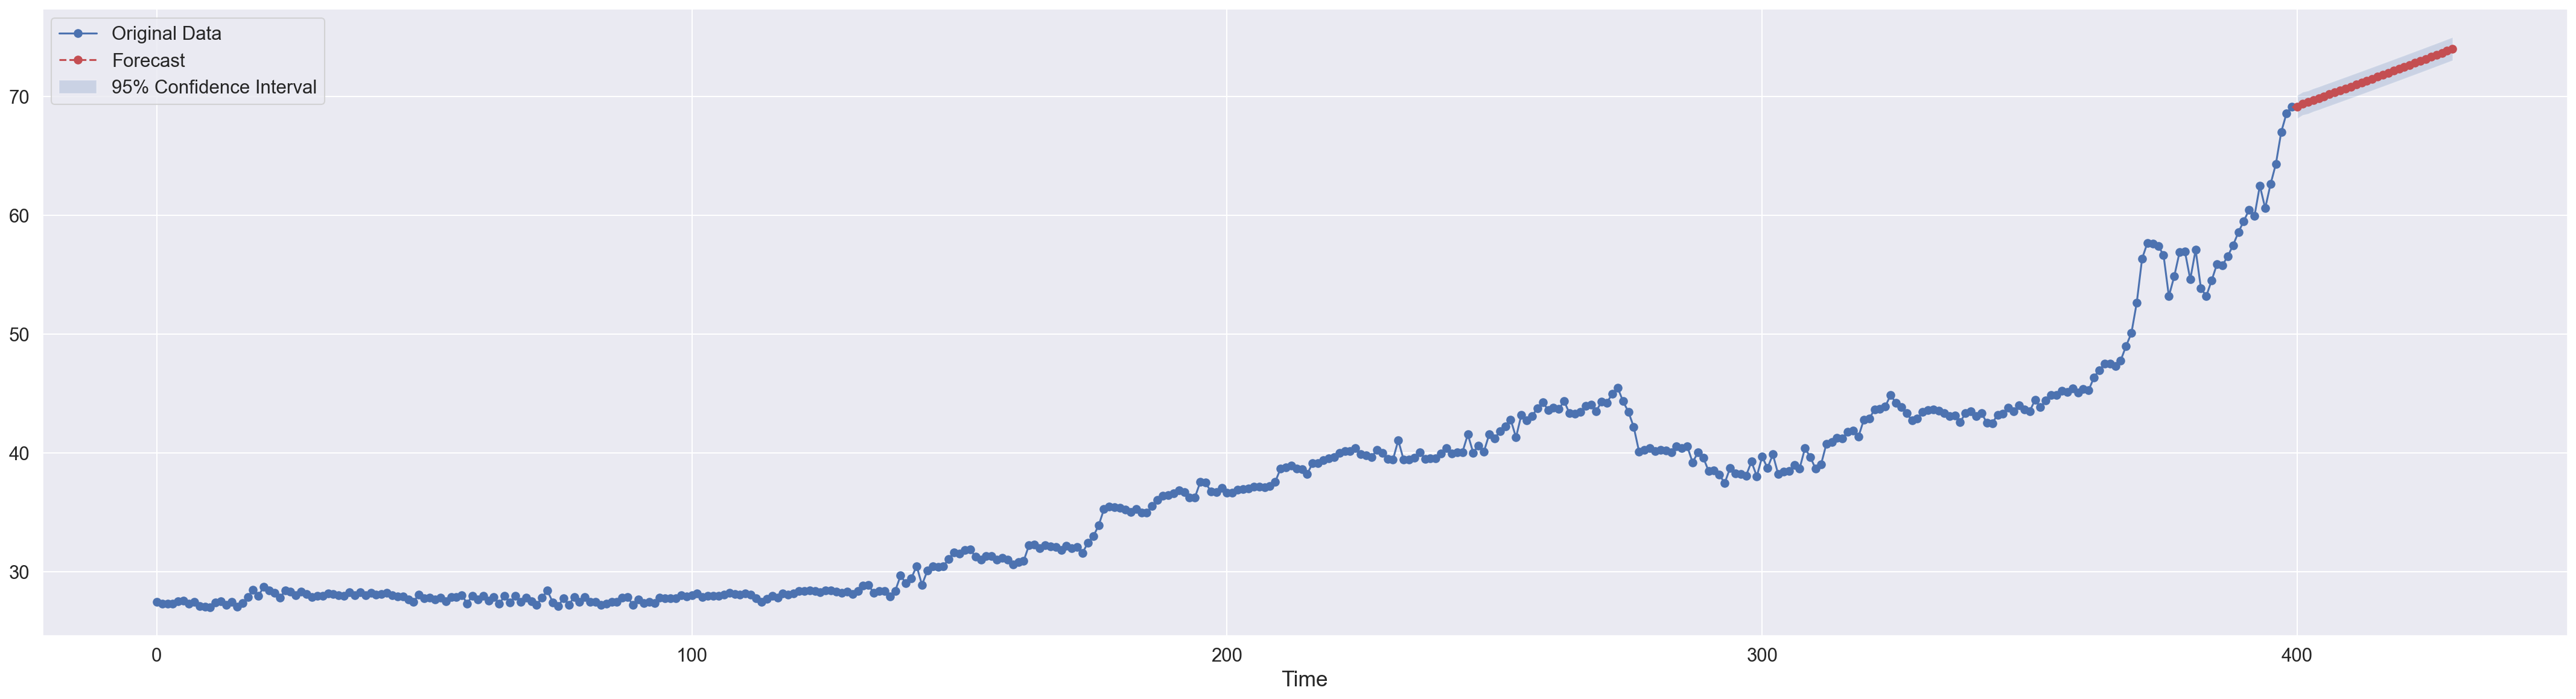

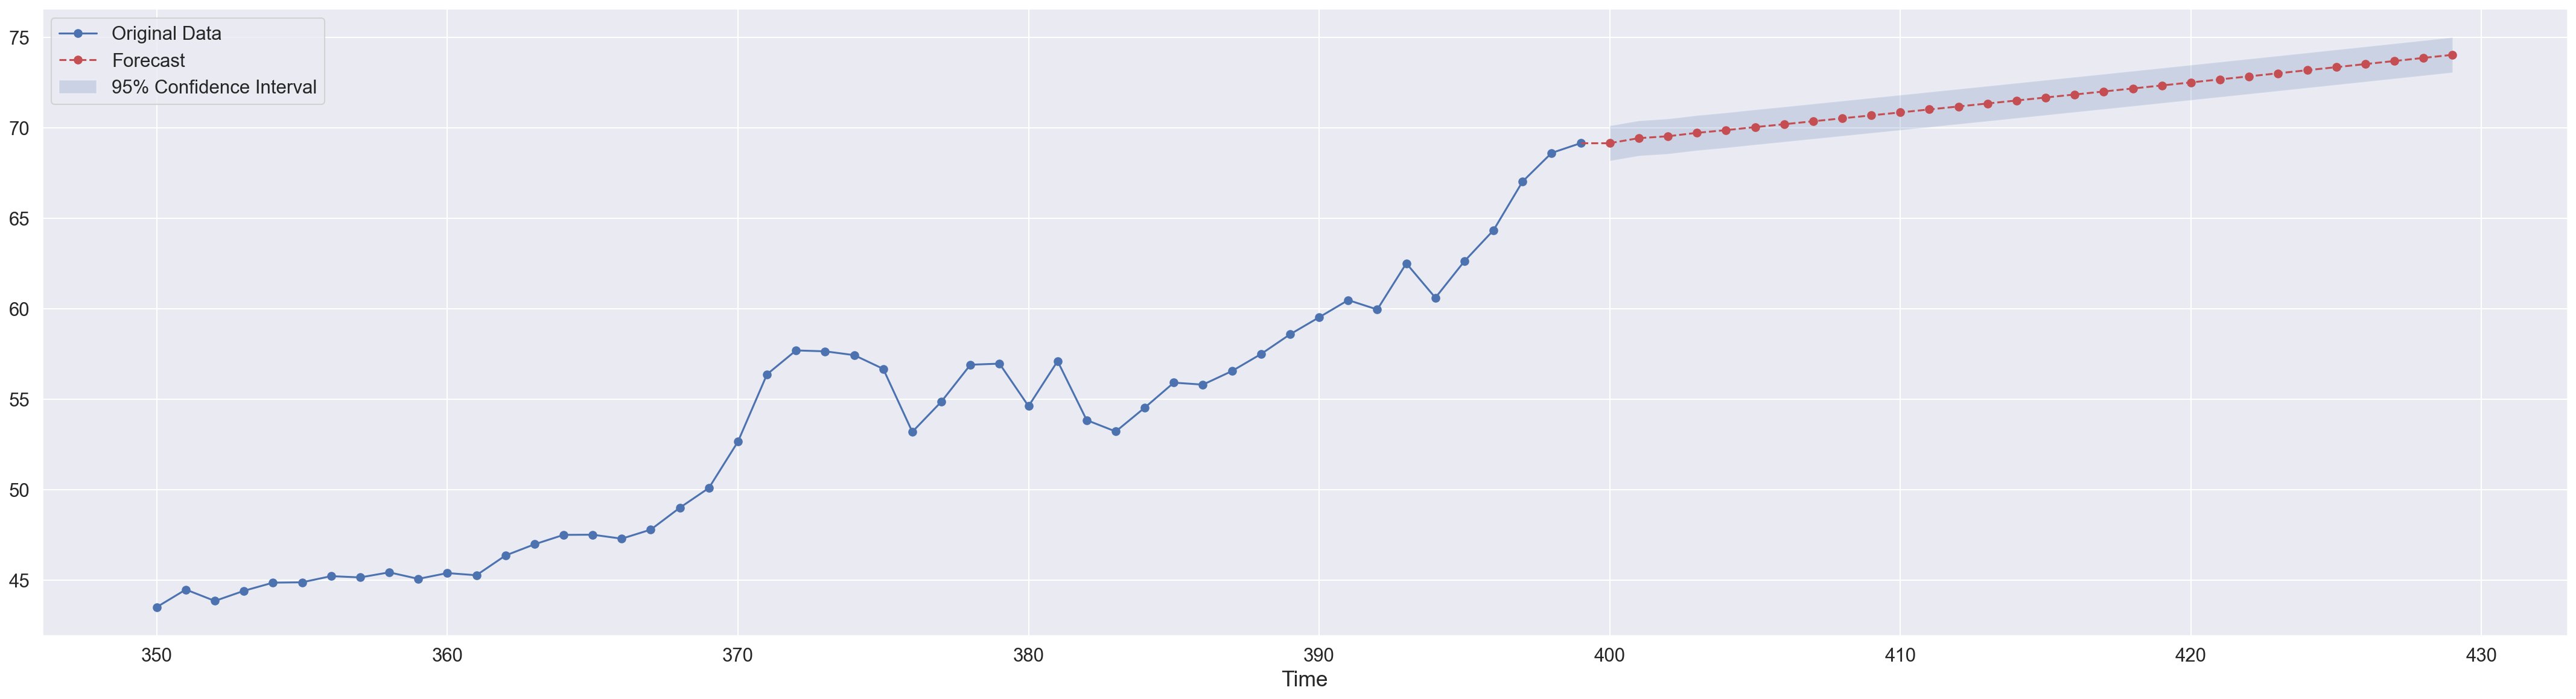

In [86]:
## close
# 绘图
plt.figure(figsize=(36, 9), dpi=150)
plt.plot(range(len(df['close'],)), df['close'], linestyle='-', color='b', marker='o', markerfacecolor='b', label='Original Data')
plt.plot(range(len(df['close'],), len(df['close'],) + len(mean['close'])), mean['close'], linestyle='--', color='r', marker='o', markerfacecolor='r', label='Forecast')
plt.fill_between(range(len(data['close'],), len(data['close'],) + len(mean['close'])), close_lower, close_upper, alpha=0.2, label='95% Confidence Interval')
last_data_index = len(data['close']) - 1
last_pred_index = len(data['close'])
plt.plot([last_data_index, last_pred_index], [df['close'][last_data_index], mean['close'][last_pred_index]], linestyle='--', color='r')
plt.xlabel('Time', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig(fname='多组close预测结果.png')

# 局部
original_data_length = len(data['close'])
last_50_index = range(original_data_length - 50, original_data_length)
plt.figure(figsize=(36, 9), dpi=150)
plt.plot(last_50_index, [df['close'][i] for i in last_50_index], linestyle='-', color='b', marker='o', markerfacecolor='b', label='Original Data')
plt.plot(range(original_data_length, original_data_length + len(mean['close'])), mean['close'], linestyle='--', color='r', marker='o', markerfacecolor='r', label='Forecast')
plt.fill_between(range(original_data_length, original_data_length + len(mean['close'])), close_lower, close_upper, alpha=0.2, label='95% Confidence Interval')
last_data_index = len(data['close']) - 1
last_pred_index = len(data['close'])
plt.plot([last_data_index, last_pred_index], [df['close'][last_data_index], mean['close'][last_pred_index]], linestyle='--', color='r')
plt.xlabel('Time', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig(fname='多组close预测结果放大图.png')

#### 3.4.4 最低价预测结果<a id="3.4.4"></a>

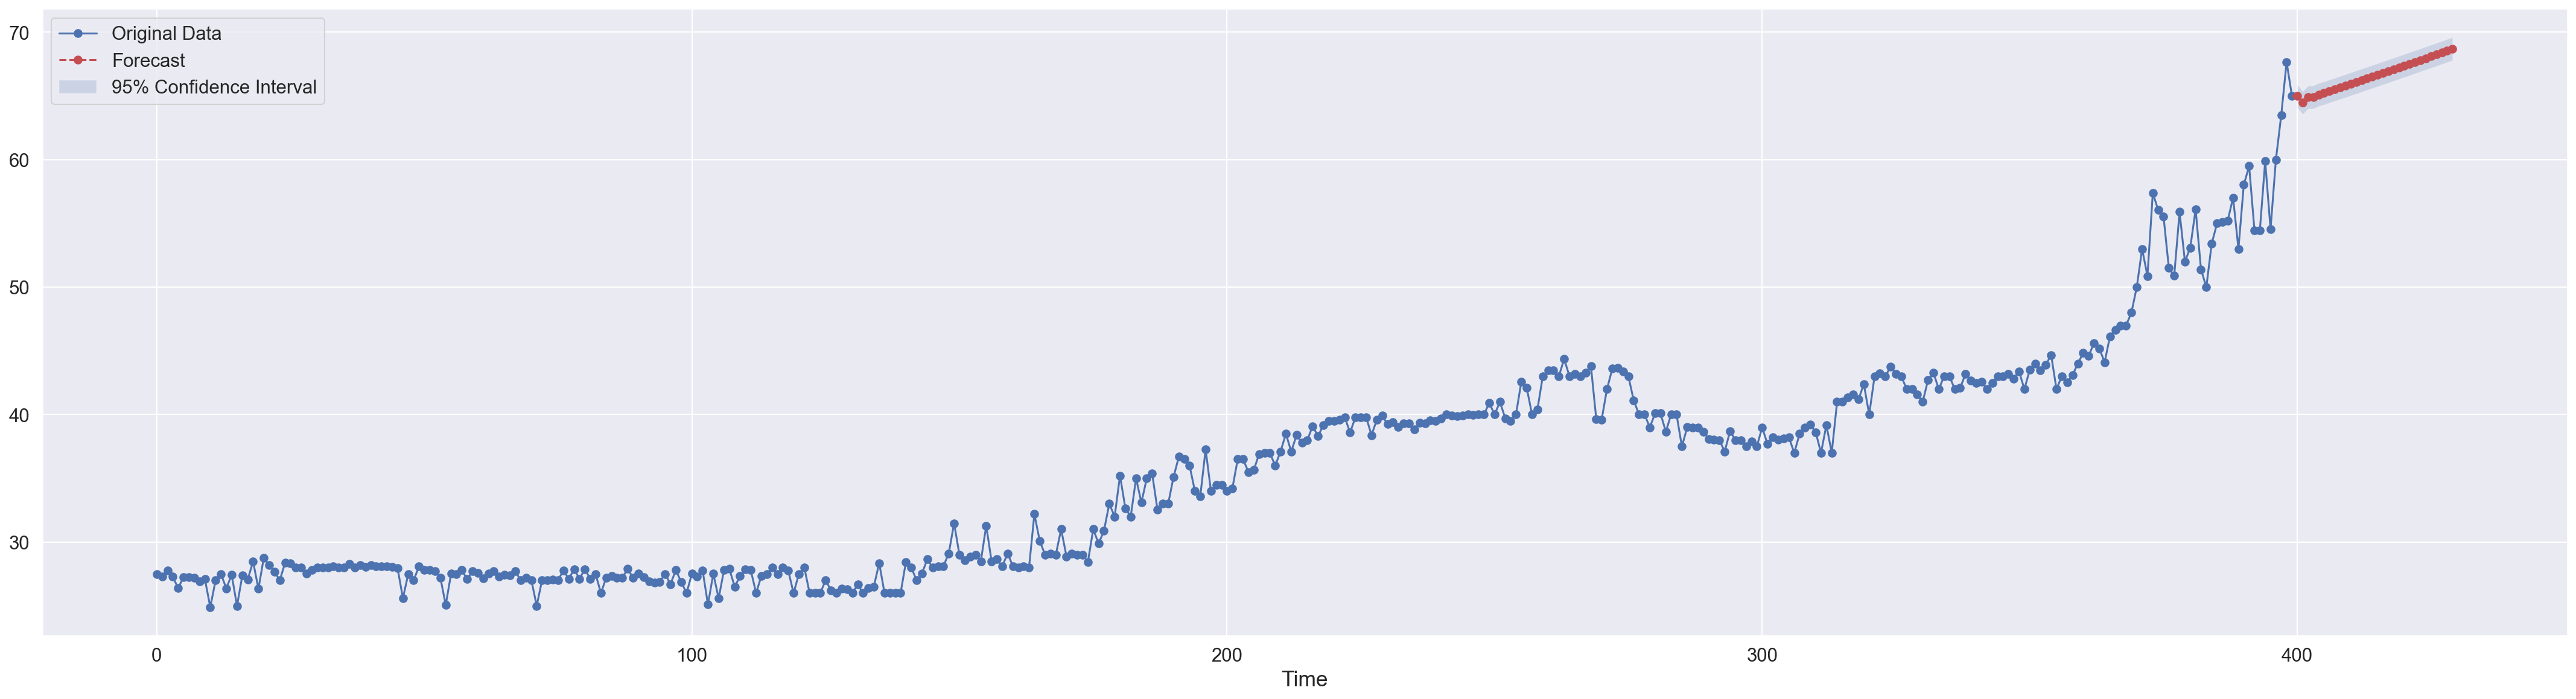

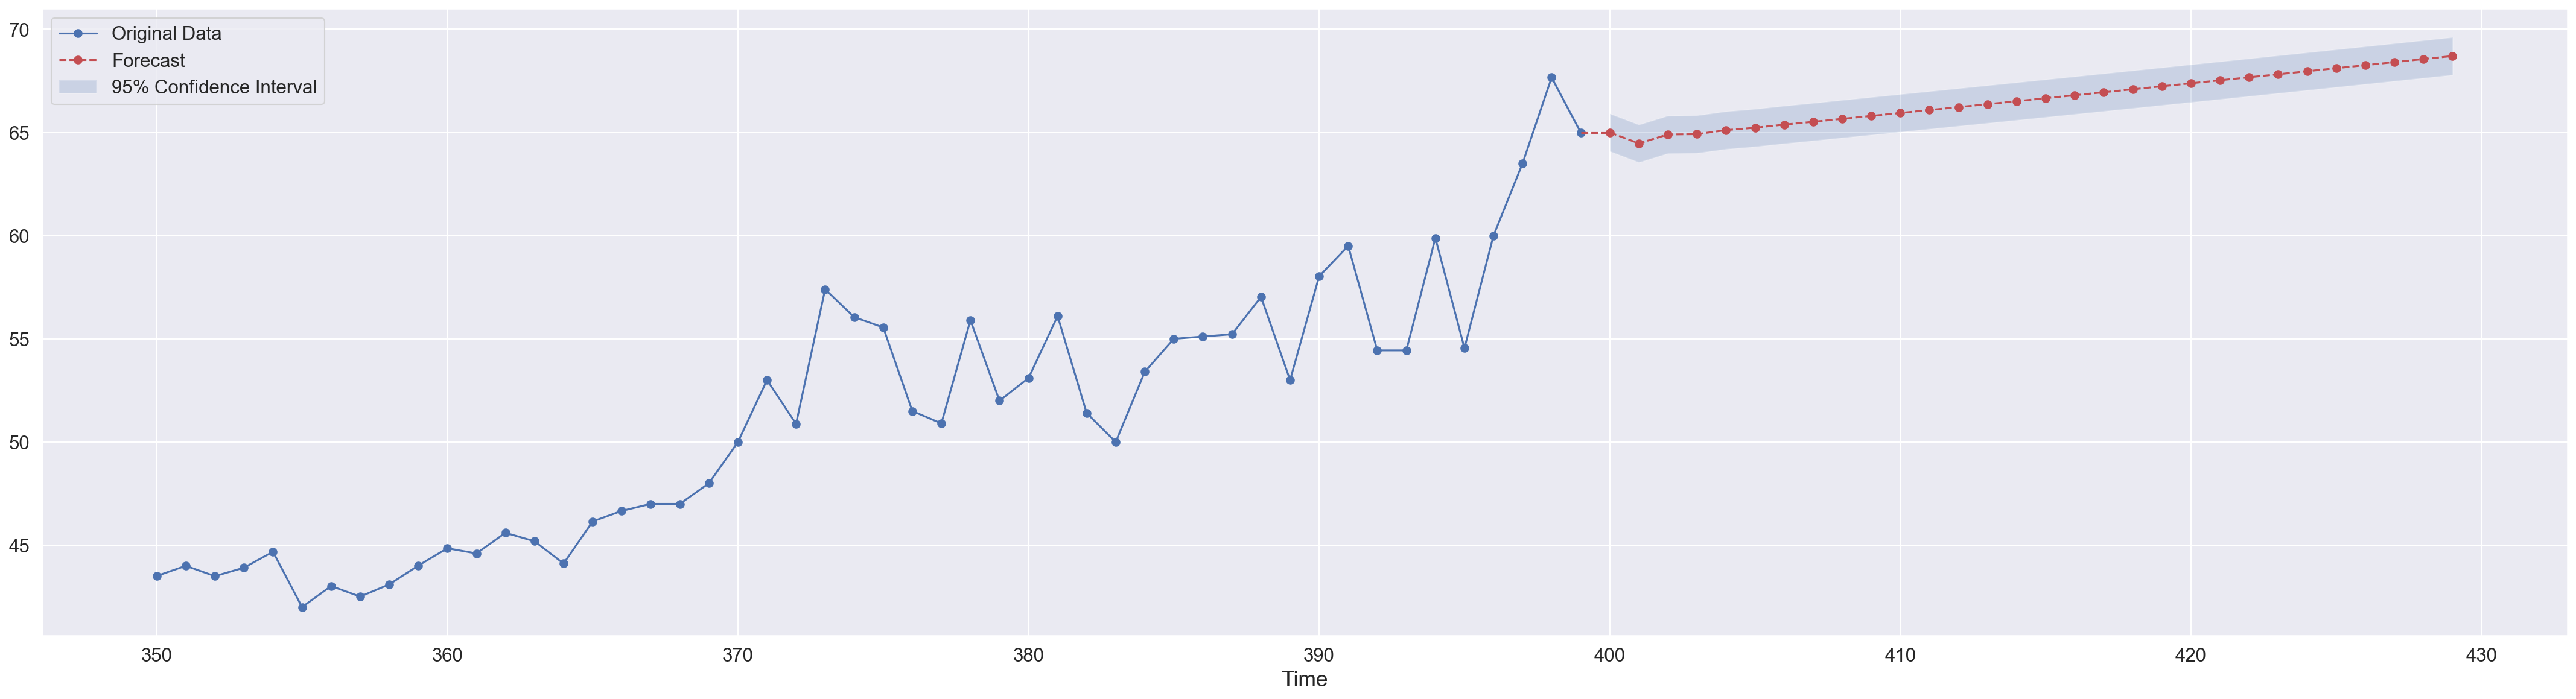

In [87]:
## lowest
# 绘图
plt.figure(figsize=(36, 9), dpi=150)
plt.plot(range(len(df['lowest'],)), df['lowest'], linestyle='-', color='b', marker='o', markerfacecolor='b', label='Original Data')
plt.plot(range(len(df['lowest'],), len(df['lowest'],) + len(mean['lowest'])), mean['lowest'], linestyle='--', color='r', marker='o', markerfacecolor='r', label='Forecast')
plt.fill_between(range(len(data['lowest'],), len(data['lowest'],) + len(mean['lowest'])), lowest_lower, lowest_upper, alpha=0.2, label='95% Confidence Interval')
last_data_index = len(data['lowest']) - 1
last_pred_index = len(data['lowest'])
plt.plot([last_data_index, last_pred_index], [df['lowest'][last_data_index], mean['lowest'][last_pred_index]], linestyle='--', color='r')
plt.xlabel('Time', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig(fname='多组lowest预测结果.png')

# 局部
original_data_length = len(data['lowest'])
last_50_index = range(original_data_length - 50, original_data_length)
plt.figure(figsize=(36, 9), dpi=150)
plt.plot(last_50_index, [df['lowest'][i] for i in last_50_index], linestyle='-', color='b', marker='o', markerfacecolor='b', label='Original Data')
plt.plot(range(original_data_length, original_data_length + len(mean['lowest'])), mean['lowest'], linestyle='--', color='r', marker='o', markerfacecolor='r', label='Forecast')
plt.fill_between(range(original_data_length, original_data_length + len(mean['lowest'])), lowest_lower, lowest_upper, alpha=0.2, label='95% Confidence Interval')
last_data_index = len(data['lowest']) - 1
last_pred_index = len(data['lowest'])
plt.plot([last_data_index, last_pred_index], [df['lowest'][last_data_index], mean['lowest'][last_pred_index]], linestyle='--', color='r')
plt.xlabel('Time', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig(fname='多组lowest预测结果放大图.png')

#### 3.4.5 最高价预测结果<a id="3.4.5"></a>

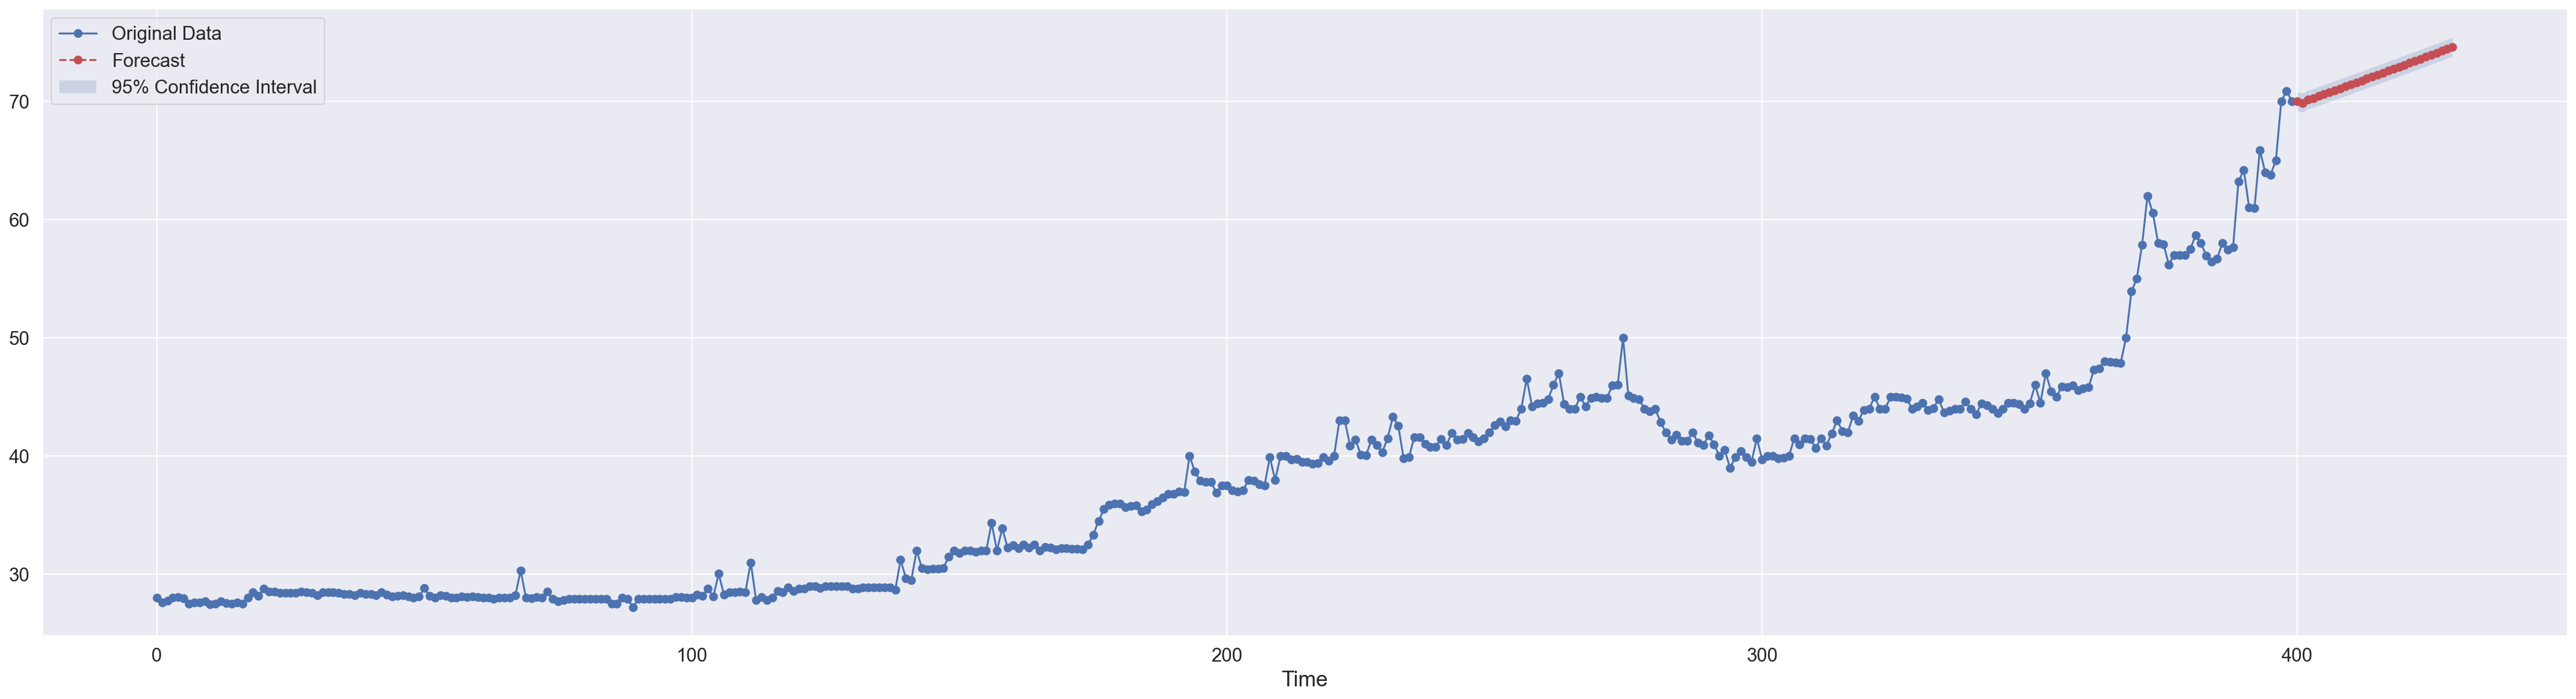

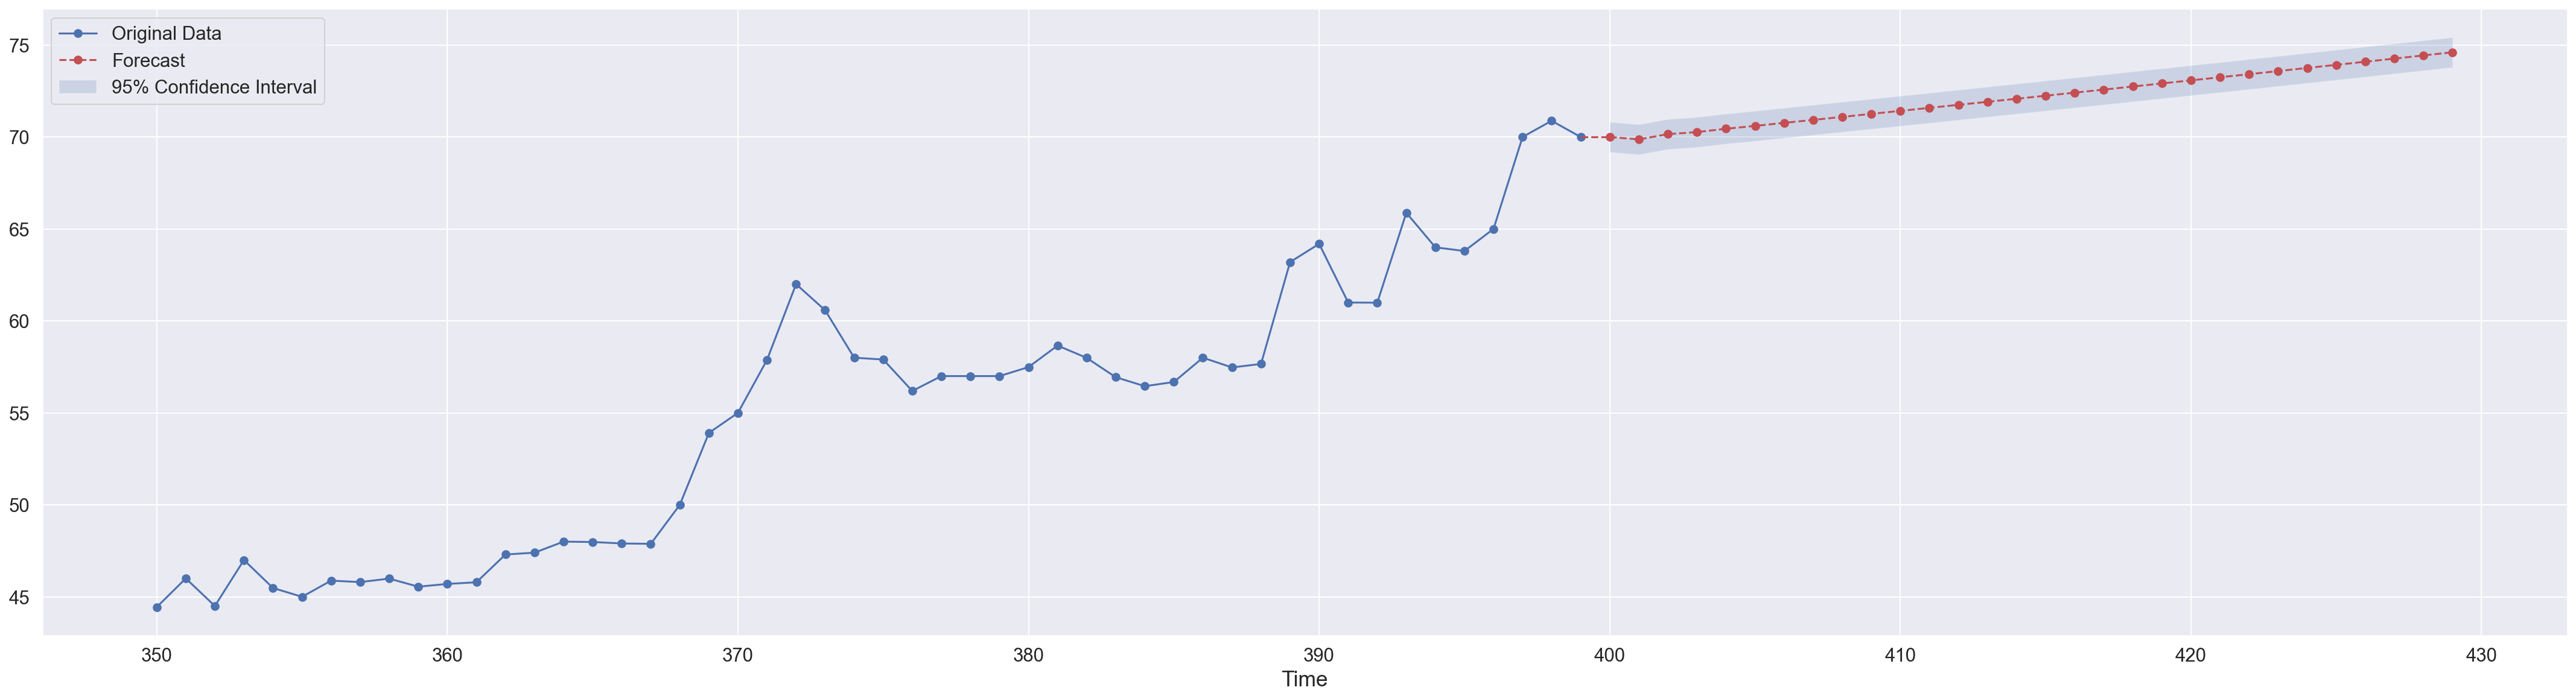

In [88]:
## highest
# 绘图
plt.figure(figsize=(36, 9), dpi=150)
plt.plot(range(len(df['highest'],)), df['highest'], linestyle='-', color='b', marker='o', markerfacecolor='b', label='Original Data')
plt.plot(range(len(df['highest'],), len(df['highest'],) + len(mean['highest'])), mean['highest'], linestyle='--', color='r', marker='o', markerfacecolor='r', label='Forecast')
plt.fill_between(range(len(data['highest'],), len(data['highest'],) + len(mean['highest'])), highest_lower, highest_upper, alpha=0.2, label='95% Confidence Interval')
last_data_index = len(data['highest']) - 1
last_pred_index = len(data['highest'])
plt.plot([last_data_index, last_pred_index], [df['highest'][last_data_index], mean['highest'][last_pred_index]], linestyle='--', color='r')
plt.xlabel('Time', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig(fname='多组highest预测结果.png')

# 局部
original_data_length = len(data['highest'])
last_50_index = range(original_data_length - 50, original_data_length)
plt.figure(figsize=(36, 9), dpi=150)
plt.plot(last_50_index, [df['highest'][i] for i in last_50_index], linestyle='-', color='b', marker='o', markerfacecolor='b', label='Original Data')
plt.plot(range(original_data_length, original_data_length + len(mean['highest'])), mean['highest'], linestyle='--', color='r', marker='o', markerfacecolor='r', label='Forecast')
plt.fill_between(range(original_data_length, original_data_length + len(mean['highest'])), highest_lower, highest_upper, alpha=0.2, label='95% Confidence Interval')
last_data_index = len(data['highest']) - 1
last_pred_index = len(data['highest'])
plt.plot([last_data_index, last_pred_index], [df['highest'][last_data_index], mean['highest'][last_pred_index]], linestyle='--', color='r')
plt.xlabel('Time', fontsize=17)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.savefig(fname='多组highest预测结果放大图.png')

##### 保存数据

In [89]:
## 8 保存全部数据
# 创建字典，键为列名，值为对应的变量数据
data_dict = {
    "open_mean_forecast": mean['open'],
    "close_mean_forecast": mean['close'],
    "lowest_mean_forecast": mean['lowest'],
    "highest_mean_forecast": mean['highest']
}

# 使用字典创建DataFrame
new_df = pd.DataFrame(data_dict)

new_df.to_csv('多组预测.csv', index=False)

#### 3.4.6 K线预测结果<a id="3.4.6"></a>

In [90]:
df_part_1 = df.iloc[-50:]

df_forecast = new_df

df_part_2 = df_forecast.head(23)
df_part_2 = df_part_2.rename(columns={
    'open_mean_forecast': 'open',
    'close_mean_forecast': 'close',
    'lowest_mean_forecast': 'lowest',
    'highest_mean_forecast': 'highest'
})

df_predict = pd.concat([df_part_1, df_part_2], axis=0, ignore_index=True)

start_date = pd.to_datetime('2021-11-17')
new_index = pd.date_range(start=start_date, periods=len(df_predict), freq='D')
df_predict.index = new_index

df_predict

# K线图
kline_data = df_predict[['open', 'close', 'lowest', 'highest']].values.tolist()

c = (
    Kline(init_opts=opts.InitOpts(width="1600px", height="720px"))
   .add_xaxis(df_predict.index.strftime('%Y-%m-%d').tolist())
   .add_yaxis("", kline_data)
   .set_global_opts(
        yaxis_opts=opts.AxisOpts(is_scale=True),
        xaxis_opts=opts.AxisOpts(is_scale=True),
        title_opts=opts.TitleOpts(title=""),
    )
   .render("VARMA预测数据K线图.html")
)

## 四、多元非线性时间序列模型实现K线预测<a id="4"></a>
### 4.1 线性序列扩展至非线性序列<a id="4.1"></a>
由于前两部分都拘泥于线性时间序列，导致可选择的数据范围比较小，现进一步扩大数据范围至非线性时间序列
#### 4.1.1 数据导入<a id="4.1.1"></a>
导入2021-11-17之前的数据，将线性数据扩展至非线性数据

In [91]:
## 1.1 数据导入
energy_carbon_gz_df = ak.energy_carbon_gz()
df = energy_carbon_gz_df[[ '开盘价', '收盘价', '最低价', '最高价']].rename(columns={
    '开盘价': 'open',
    '收盘价': 'close',
    '最低价': 'lowest',
    '最高价': 'highest'
})

df = df.iloc[:1700]
df = df.reset_index(drop=True).dropna()
df

open  close  lowest  highest
0     60.00  60.17   60.00    61.00
1     60.17  60.00   60.00    60.00
2     60.00  60.00   60.00    60.00
3     60.00  63.00   63.00    63.00
4     63.00  65.00   65.00    65.00
...     ...    ...     ...      ...
1695  60.61  62.63   54.55    63.80
1696  62.63  64.34   60.00    65.00
1697  64.34  67.03   63.50    70.00
1698  67.03  68.61   67.66    70.88
1699  68.61  69.15   65.00    70.00

[1682 rows x 4 columns]

#### 4.1.2 Box-Cox变换<a id="4.1.2"></a>
变换法则同线性序列一致，使用对数变换

In [92]:
## 1.2 BOX-COX变换
data = np.log(df)

print('前五行数据：')
data.head()

前五行数据：


open     close    lowest   highest
0  4.094345  4.097174  4.094345  4.110874
1  4.097174  4.094345  4.094345  4.094345
2  4.094345  4.094345  4.094345  4.094345
3  4.094345  4.143135  4.143135  4.143135
4  4.143135  4.174387  4.174387  4.174387

#### 4.1.3 异常值检测与处理<a id="4.1.3"></a>
##### 箱线图
通过观察箱线图，如果数据在1.5倍四分位差外，则认为是异常值  
$$IQR = Q_3-Q_1$$
其中，$IQR$为四分位差，$Q_3$为上四分位数，$Q_1$为下四分位  
$Data > Q_1-1.5IQR$或者$Data < Q_3+1.5IQR$均认为该数据点为异常值

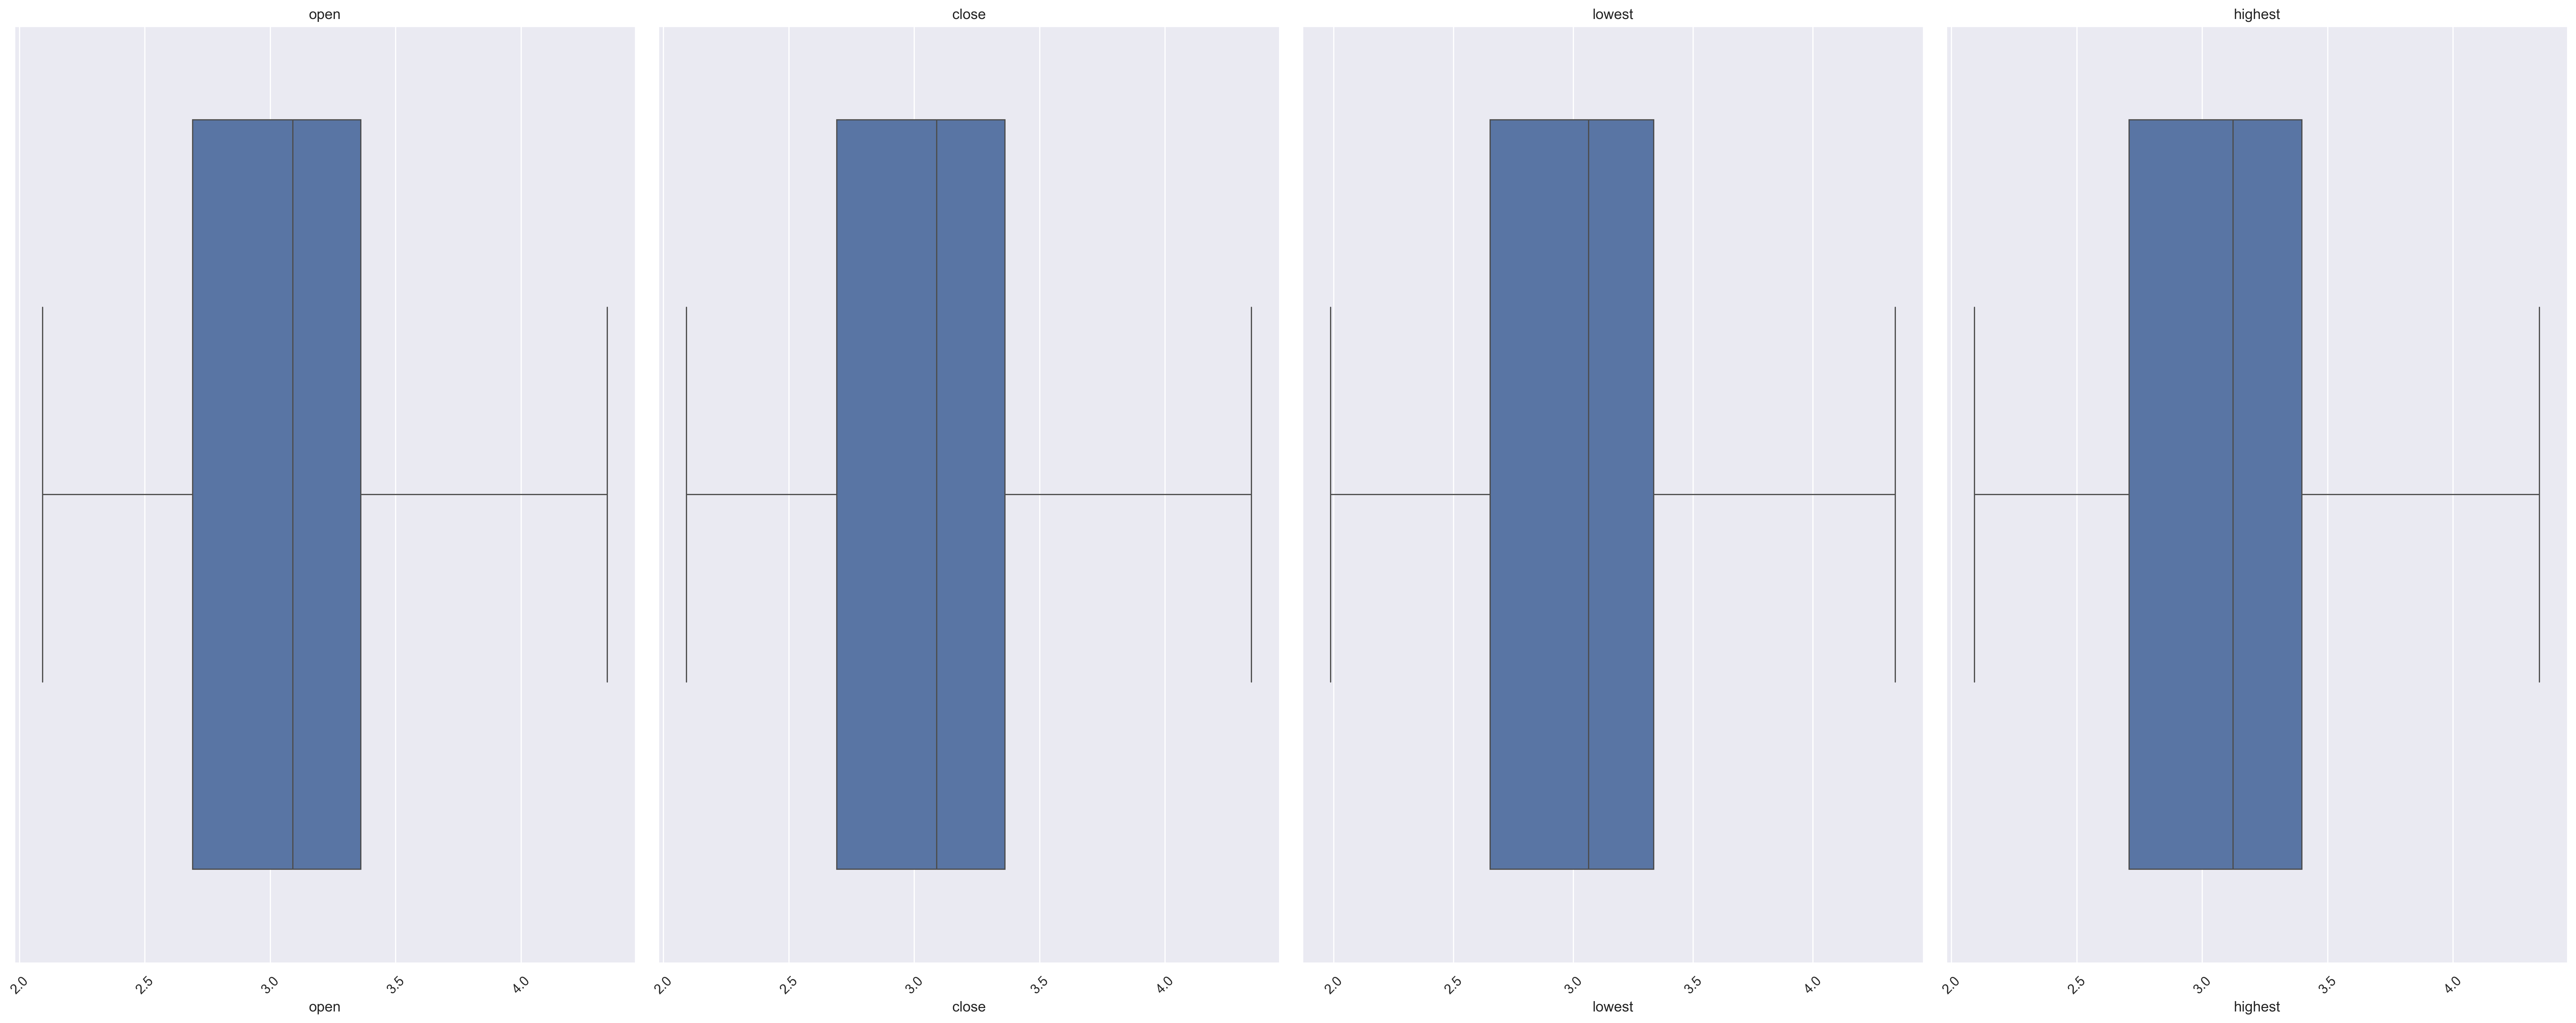

In [93]:
# 箱线图
sns.set_theme(font_scale=1)
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(30, 12), dpi = 300)
axes = axes.flatten()

# 循环绘制每个子图
for i, column in enumerate(data.columns):
    g_previous_box = sns.boxplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(column)

    locator = axes[i].get_xticks()
    axes[i].xaxis.set_major_locator(plt.FixedLocator(locator))
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

plt.tight_layout()
plt.savefig(fname="非线性箱线图.png")

##### 3$\sigma$法则
通过计算均值$\mu$和标准差$\sigma$来判断有无异常值  
$ Data > \mu + 3\sigma$或者$ Data < \mu - 3\sigma$均认为该数据点为异常值

In [94]:
# 3sigma法则
for column in data.columns:
    mean_value = data[column].mean()
    std_value = data[column].std()
    lower_bound = mean_value - 3 * std_value
    upper_bound = mean_value + 3 * std_value
    outlier_count = data[(data[column] < lower_bound) | (data[column] > upper_bound)].shape[0]
    print(f"{column}列3sigma外离群值个数为: {outlier_count}")
    # 3sigma法则处理异常值，将3sigma外的数据替换为nan
    data.loc[(data[column] < lower_bound) | (data[column] > upper_bound), column] = np.nan
    outlier_count = data[(data[column] < lower_bound) | (data[column] > upper_bound)].shape[0]
    print(f"处理后{column}列3sigma外离群值个数为: {outlier_count}")

open列3sigma外离群值个数为: 0
处理后open列3sigma外离群值个数为: 0
close列3sigma外离群值个数为: 0
处理后close列3sigma外离群值个数为: 0
lowest列3sigma外离群值个数为: 0
处理后lowest列3sigma外离群值个数为: 0
highest列3sigma外离群值个数为: 0
处理后highest列3sigma外离群值个数为: 0


__结果表明__：不论是IQR检验还是3$\sigma$法则，数据中都不存在异常值

#### 4.1.4 缺失值检测与处理<a id="4.1.4"></a>

In [95]:
## 缺失值检测与处理
print('缺失值情况及比例：')
total_rows = data.shape[0]
missing_value_sums = data.isnull().sum()
missing_value_proportions = (missing_value_sums / total_rows) * 100

for column, missing_count in missing_value_sums.items():
    proportion = missing_value_proportions[column]
    print(f"{column}: 缺失值数量为 {missing_count}，缺失值比例为 {proportion:.2f}%")

缺失值情况及比例：
open: 缺失值数量为 0，缺失值比例为 0.00%
close: 缺失值数量为 0，缺失值比例为 0.00%
lowest: 缺失值数量为 0，缺失值比例为 0.00%
highest: 缺失值数量为 0，缺失值比例为 0.00%


#### 4.1.5 多维归一化<a id="4.1.5"></a>
归一化公式为：
$$
x^{normalized}_{ji} = \frac{x_{ji}-x_{min}^i}{x_{max}^i-x_{min}^i}
$$

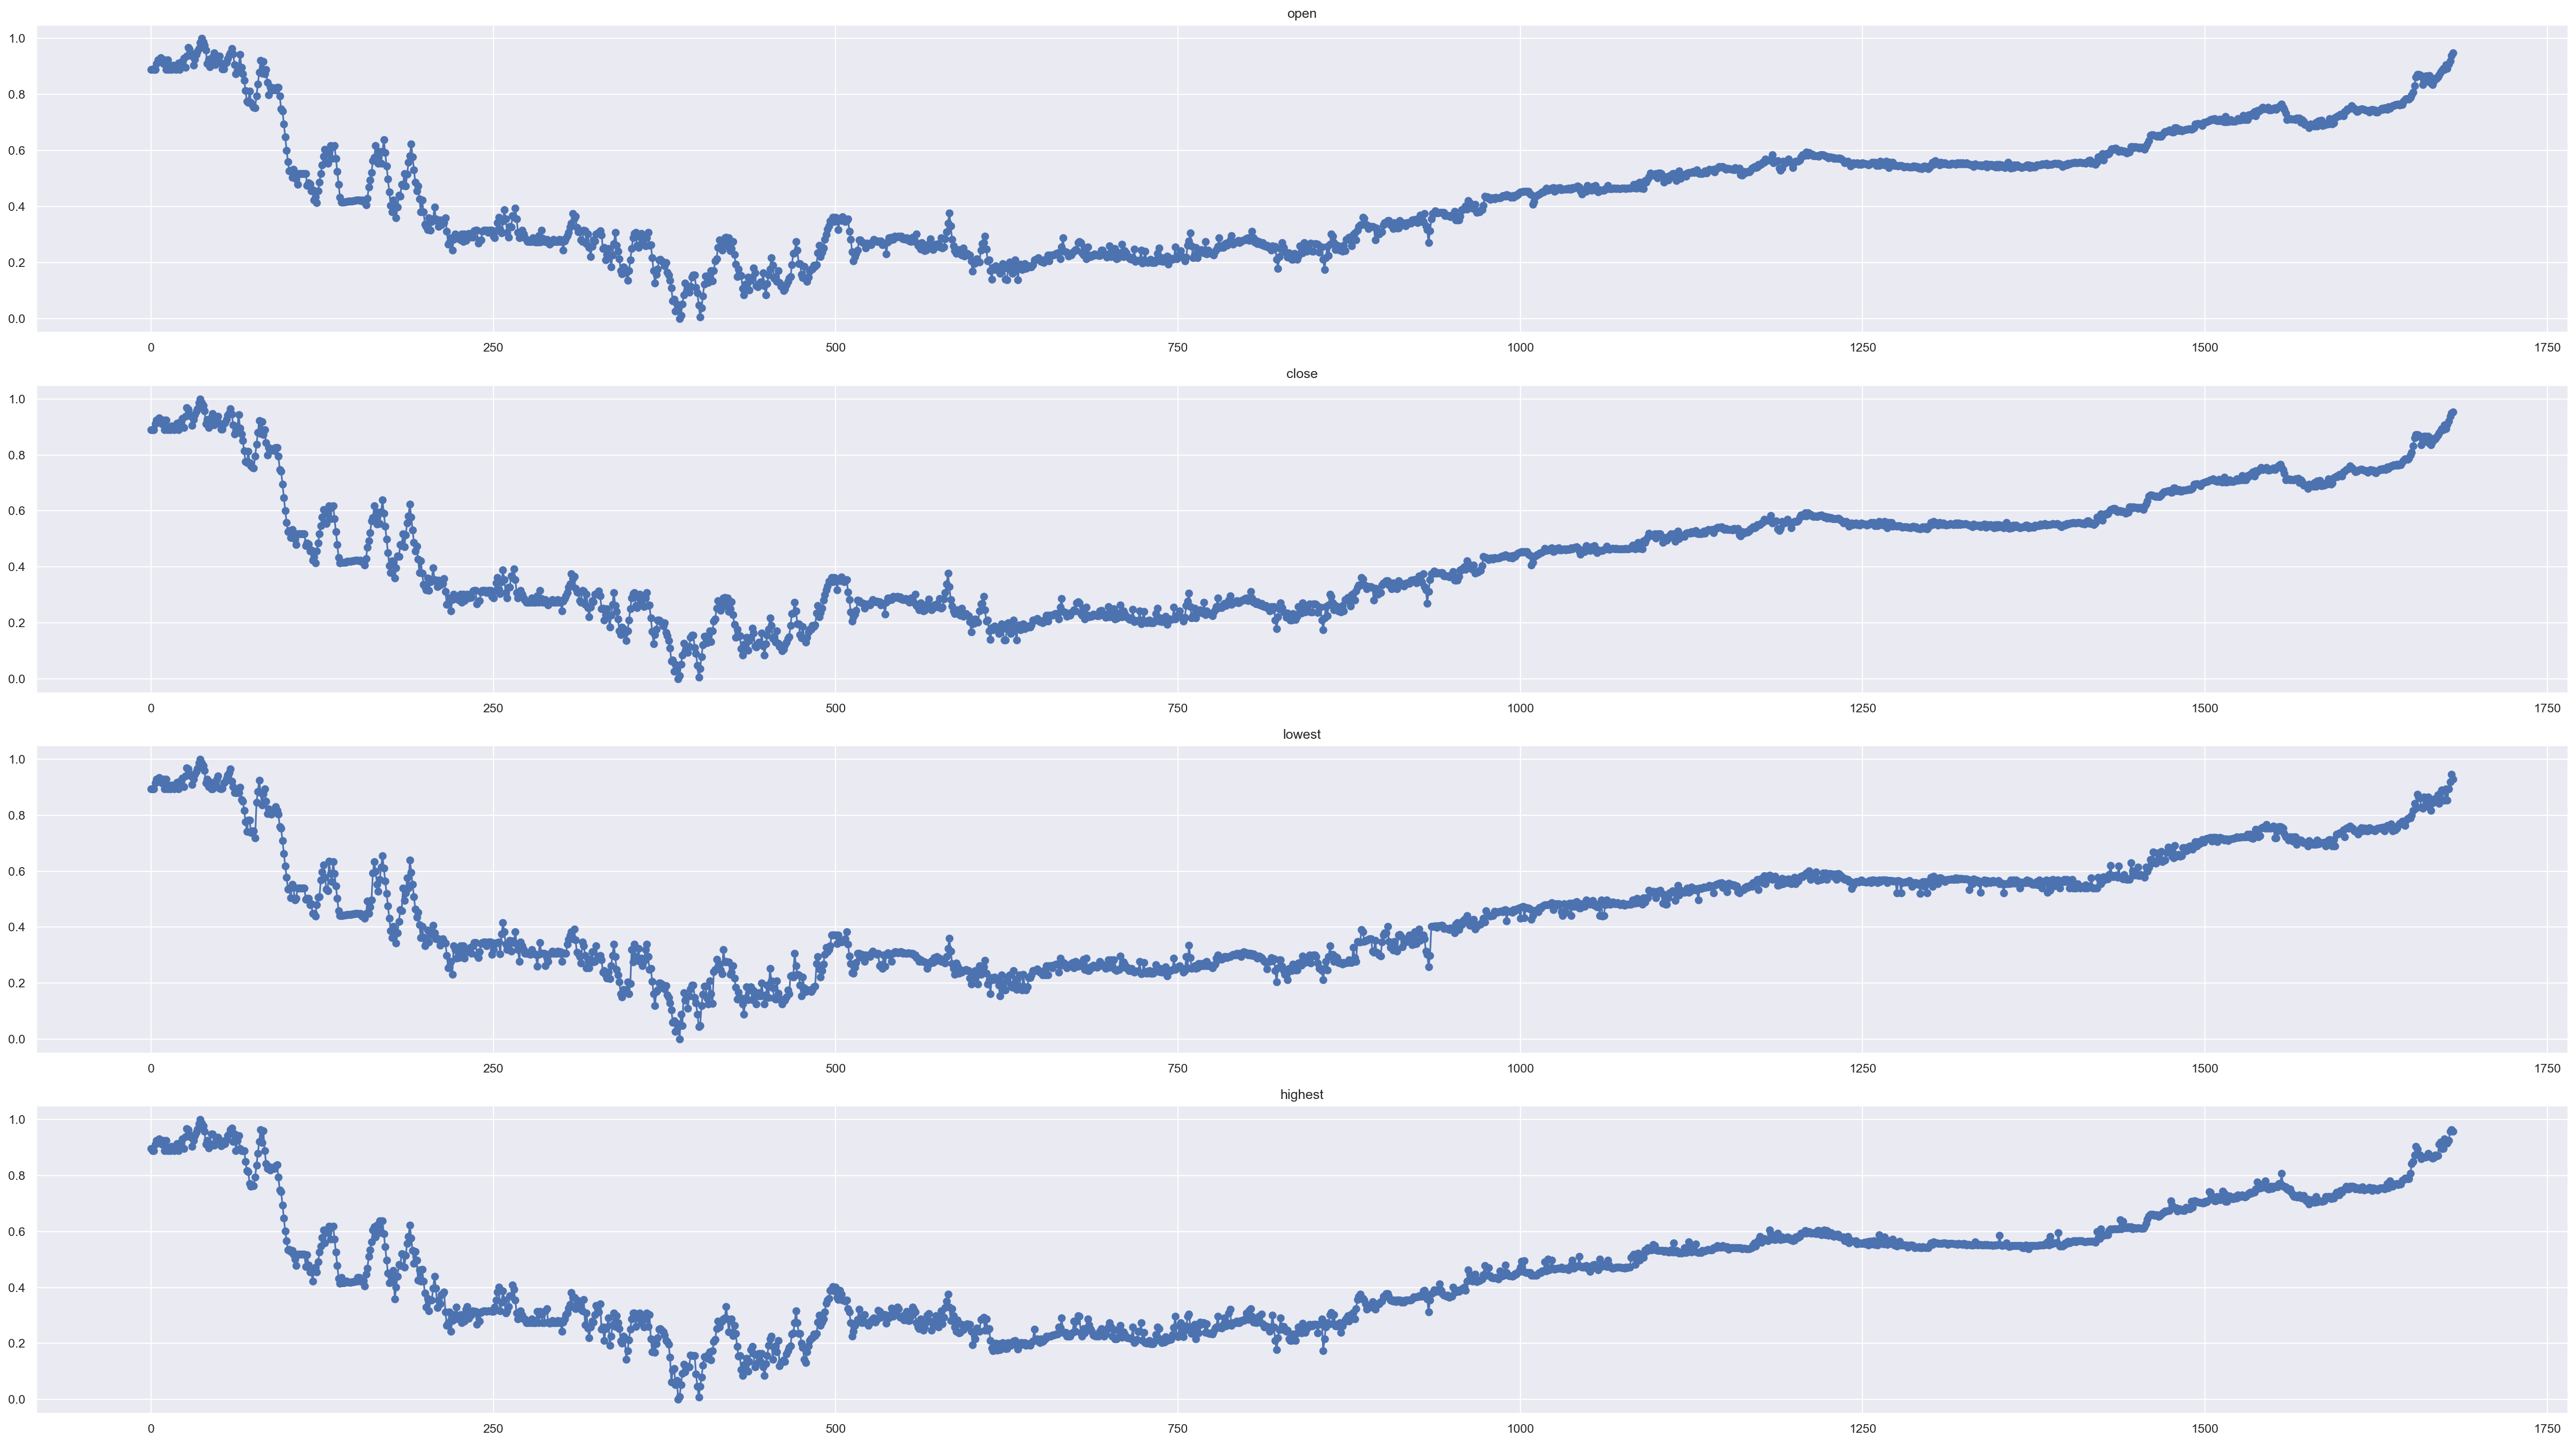

In [96]:
## 多维归一化
def NormalizeMult(data):
    normalize = np.arange(2 * data.shape[1], dtype='float64')
    normalize = normalize.reshape(data.shape[1], 2)
    for i in range(0, data.shape[1]):
        list = data[:, i]
        listlow, listhigh = np.percentile(list, [0, 100])
        normalize[i, 0] = listlow
        normalize[i, 1] = listhigh
        delta = listhigh - listlow
        if delta != 0:
            for j in range(0, data.shape[0]):
                data[j, i] = (data[j, i] - listlow) / delta
    return data, normalize

data_np = np.array(data)
data_normalized, normalize = NormalizeMult(data_np)
data_normalized = pd.DataFrame(data_normalized, columns=data.columns)
normalize = pd.DataFrame(normalize)

# 可视化
plt.figure(figsize=(32, 18), dpi=150)
for i, column in enumerate(data_normalized.columns):
    plt.subplot(4, 1, i + 1)
    plt.plot(data_normalized[column], linestyle='-', color='b', marker='o', markerfacecolor='b')
    plt.title(column)
plt.tight_layout()
plt.savefig(fname='变换后的数据概览.png')

data_normalized.to_csv("normalized_data.csv", index=False)
normalize.to_csv("normalize.csv", index=False)

__剩余请见第二部分__